In [ ]:
# 코로나 잠복기 5.1일
# 환자 99% 2주 이내 증상

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import os

In [3]:
# 자료 불러오기
csv_ls=os.listdir('datasets/')
df_dict=dict()
for file in csv_ls:
    df_dict[file.split('.')[0]]=pd.read_csv('datasets/{}'.format(file))

In [4]:
# 전체 확진자 추세
# 지역별 추세
timeprovince_df=df_dict['TimeProvince'].groupby(['date','province'])['confirmed'].sum().unstack()
# 1일 단위 차분 (누적합 -> 일별 확진자 수)
timeprovince_df=timeprovince_df.diff(periods=1)[1:]
time_confirmed=df_dict['TimeProvince'].groupby('date')['confirmed'].sum().diff(periods=1)[1:]
# 1일 단위 지역 확진자 비율
for col in timeprovince_df.columns:
    timeprovince_df[col]=(timeprovince_df[col]/time_confirmed).fillna(0)*100

No handles with labels found to put in legend.


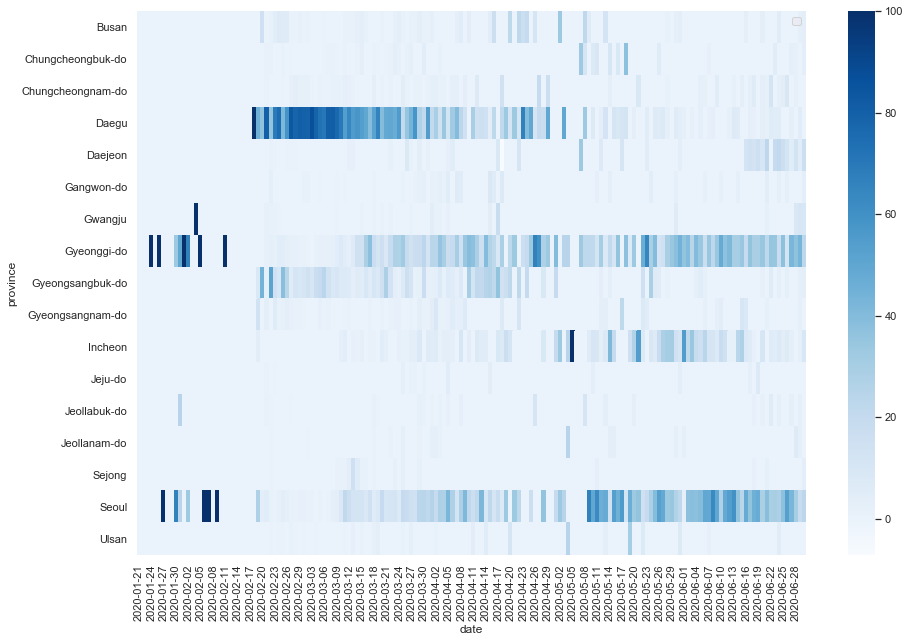

In [5]:
plt.figure(figsize=(15,10))
sns.heatmap(timeprovince_df.T,cmap='Blues')
plt.legend()

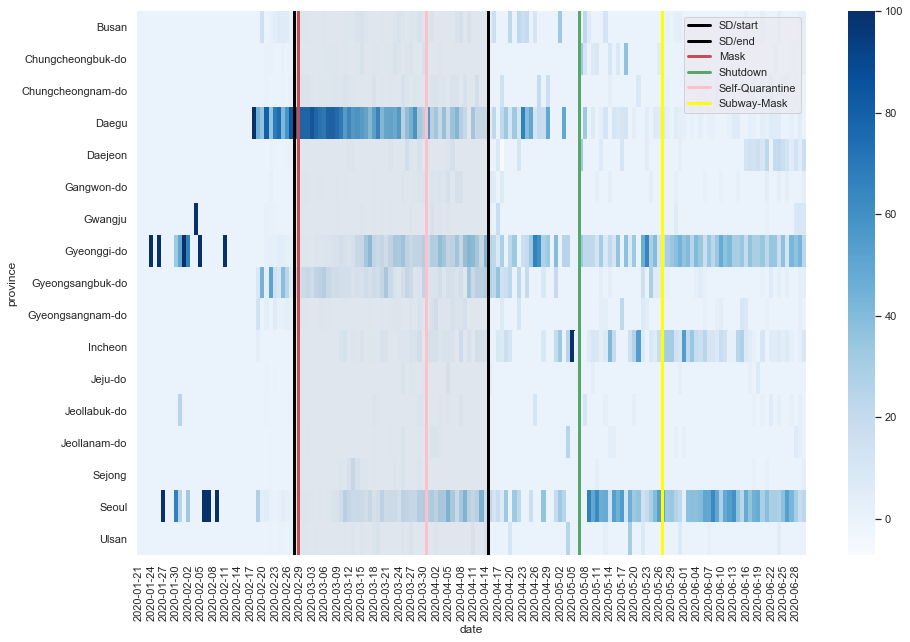

In [6]:
plt.figure(figsize=(15,10))
sns.heatmap(timeprovince_df.T,cmap='Blues')
plt.fill_betweenx(np.linspace(-10,110,100),38,85,alpha=0.1,color='gray')
plt.axvline(38,color='black',label='SD/start',linewidth=3)
plt.axvline(85,color='black',label='SD/end',linewidth=3)
plt.axvline(39,color='r',label='Mask',linewidth=3)
plt.axvline(107,color='g',label='Shutdown',linewidth=3)
plt.axvline(70,color='pink',label='Self-Quarantine',linewidth=3)
plt.axvline(127,color='yellow',label='Subway-Mask',linewidth=3)
plt.legend()

In [7]:
# 연령대별 추세
timeage_df=df_dict['TimeAge'].groupby(['date','age'])['confirmed'].sum().unstack()
timeage_df=timeage_df.diff(periods=1)
time_confirmed=df_dict['TimeAge'].groupby('date')['confirmed'].sum().diff(periods=1)[1:]
for col in timeage_df.columns:
    timeage_df[col]=(timeage_df[col]/time_confirmed).fillna(0)*100

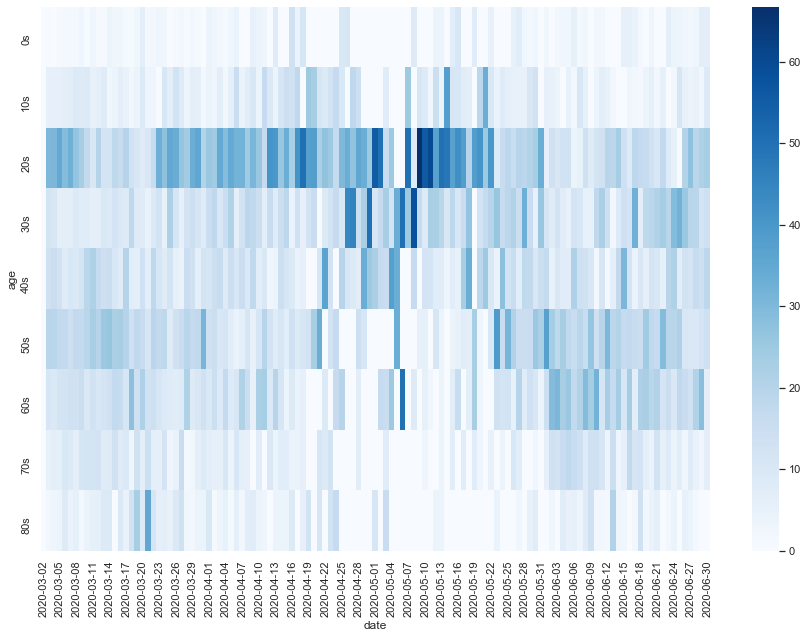

In [8]:
plt.figure(figsize=(15,10))
sns.heatmap(timeage_df.T,cmap='Blues')

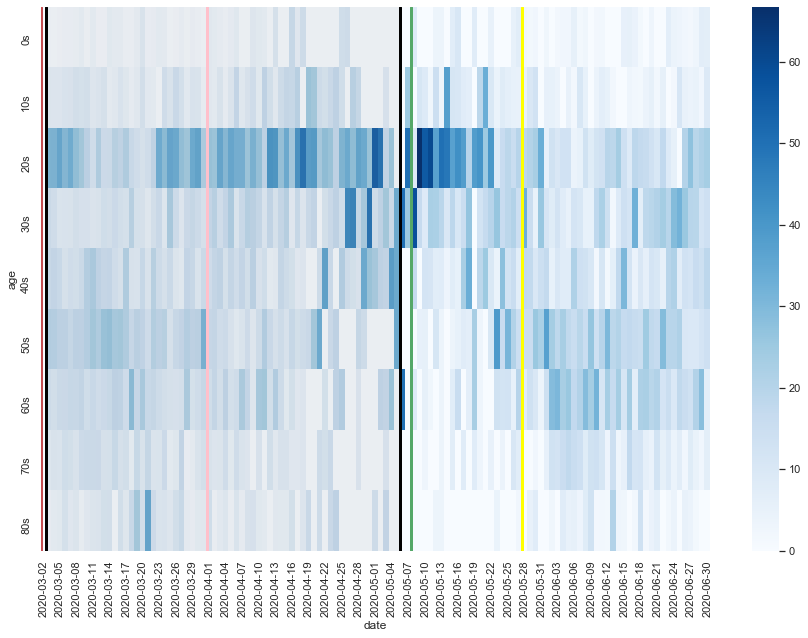

In [9]:
plt.figure(figsize=(15,10))
sns.heatmap(timeage_df.T,cmap='Blues')
plt.fill_betweenx(np.linspace(-10,110,100),1,65,alpha=0.1,color='gray')
plt.axvline(1,color='black',label='SD/start',linewidth=3)
plt.axvline(65,color='black',label='SD/end',linewidth=3)
plt.axvline(0,color='r',label='Mask',linewidth=3)
plt.axvline(67,color='g',label='Shutdown',linewidth=3)
plt.axvline(30,color='pink',label='Self-Quarantine',linewidth=3)
plt.axvline(87,color='yellow',label='Subway-Mask',linewidth=3)

In [10]:
# 성별 추세
timegender_df=df_dict['TimeGender'].groupby(['date','sex'])['confirmed'].sum().unstack()
timegender_df=timegender_df.diff(periods=1)[1:]
timegender_df.index=pd.to_datetime(timegender_df.index)
time_confirmed=df_dict['TimeGender'].groupby('date')['confirmed'].sum().diff(periods=1)[1:]
for col in timegender_df.columns:
    timegender_df[col]=(timegender_df[col]/time_confirmed).fillna(0)*100

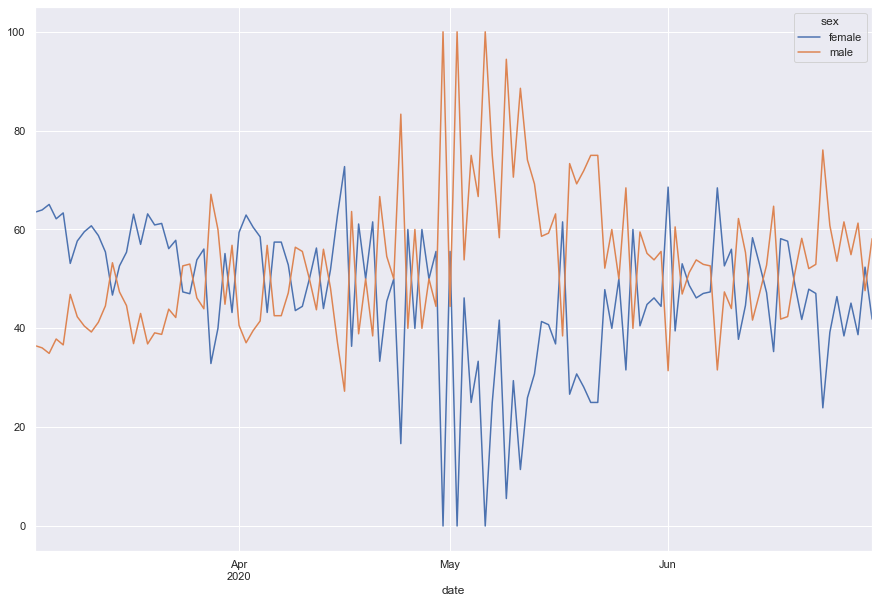

In [11]:
timegender_df.plot(figsize=(15,10))

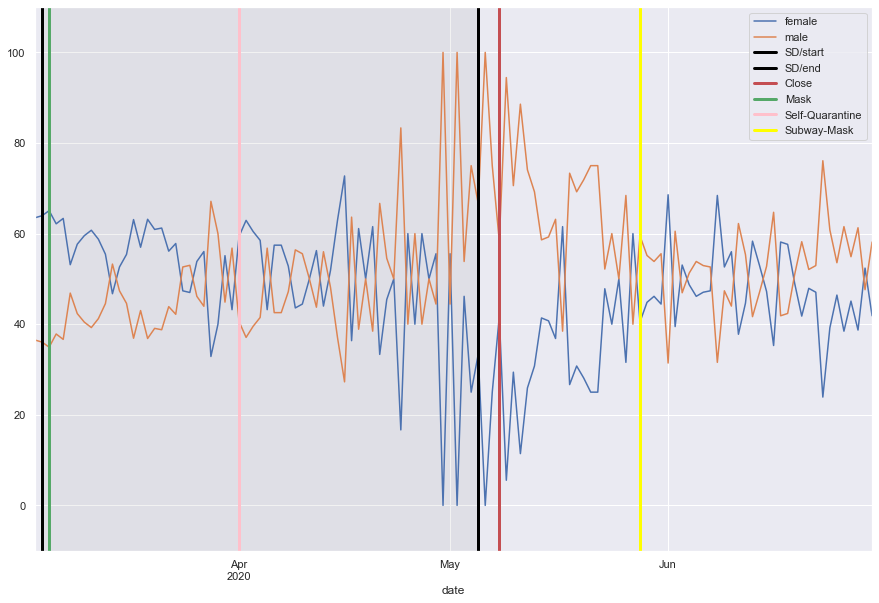

In [12]:
timegender_df.plot(figsize=(15,10))
plt.fill_betweenx(np.linspace(-10,110,100),'2020-03-04','2020-05-05',alpha=0.1,color='gray')
plt.axvline('2020-03-04',color='black',label='SD/start',linewidth=3)
plt.axvline('2020-05-05',color='black',label='SD/end',linewidth=3)
plt.axvline('2020-05-08',color='r',label='Close',linewidth=3)
plt.axvline('2020-03-05',color='g',label='Mask',linewidth=3)
plt.axvline('2020-04-01',color='pink',label='Self-Quarantine',linewidth=3)
plt.axvline('2020-05-28',color='yellow',label='Subway-Mask',linewidth=3)
plt.ylim(-10,110)
plt.legend()

In [13]:
# 지역별 추세선
timeprovince_df.index=pd.to_datetime(timeprovince_df.index)
timeprovince_df['mean']=timeprovince_df.mean(axis=1)
timeprovince_df['date']=timeprovince_df.index
timeprovince_df['days']=np.arange(len(timeprovince_df))
timeprovince_df.index=np.arange(len(timeprovince_df))

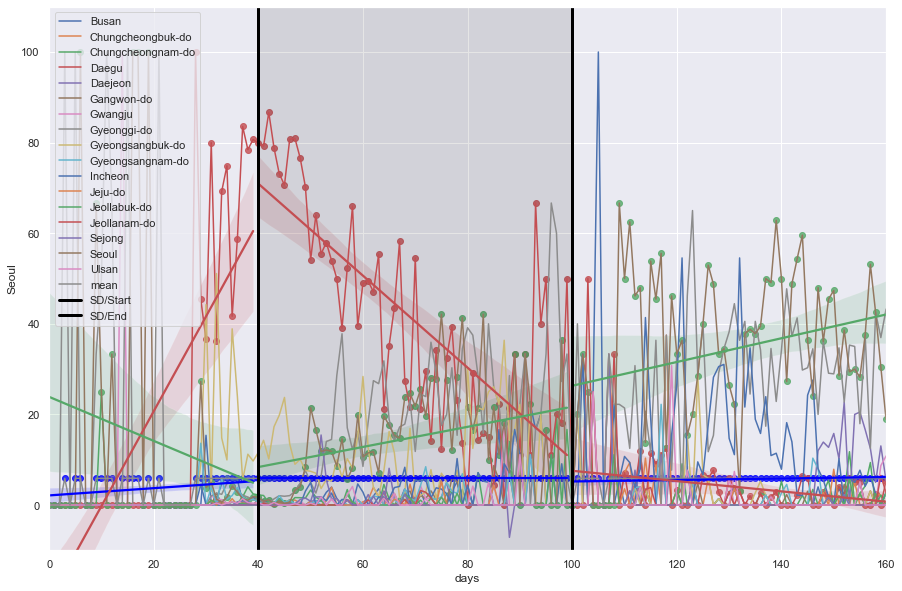

In [14]:
fig,ax=plt.subplots(figsize=(15,10))
timeprovince_df.drop(['days','date'],axis=1).plot(ax=ax)
sns.regplot(x='days',y='mean',data=timeprovince_df.iloc[:40,:],ax=ax,color='blue')
sns.regplot(x='days',y='Daegu',data=timeprovince_df.iloc[:40,:],ax=ax,color='r')
sns.regplot(x='days',y='Seoul',data=timeprovince_df.iloc[:40,:],ax=ax,color='g')
sns.regplot(x='days',y='mean',data=timeprovince_df.iloc[40:100,:],ax=ax,color='blue')
sns.regplot(x='days',y='Daegu',data=timeprovince_df.iloc[40:100,:],ax=ax,color='r')
sns.regplot(x='days',y='Seoul',data=timeprovince_df.iloc[40:100,:],ax=ax,color='g')
sns.regplot(x='days',y='mean',data=timeprovince_df.iloc[100:,:],ax=ax,color='blue')
sns.regplot(x='days',y='Daegu',data=timeprovince_df.iloc[100:,:],ax=ax,color='r')
sns.regplot(x='days',y='Seoul',data=timeprovince_df.iloc[100:,:],ax=ax,color='g')
plt.fill_betweenx(np.linspace(-10,110,100),40,100,alpha=0.1,color='black')
plt.axvline(40,color='black',label='SD/Start',linewidth=3)
plt.axvline(100,color='black',label='SD/End',linewidth=3)
plt.xlim(0,160)
plt.ylim(-10,110)
plt.legend()

In [15]:
# 연령별 추세선
timeage_df.index=pd.to_datetime(timeage_df.index)
timeage_df['mean']=timeage_df.mean(axis=1)
timeage_df['date']=timeage_df.index
timeage_df['days']=np.arange(len(timeage_df))
timeage_df.index=np.arange(len(timeage_df))

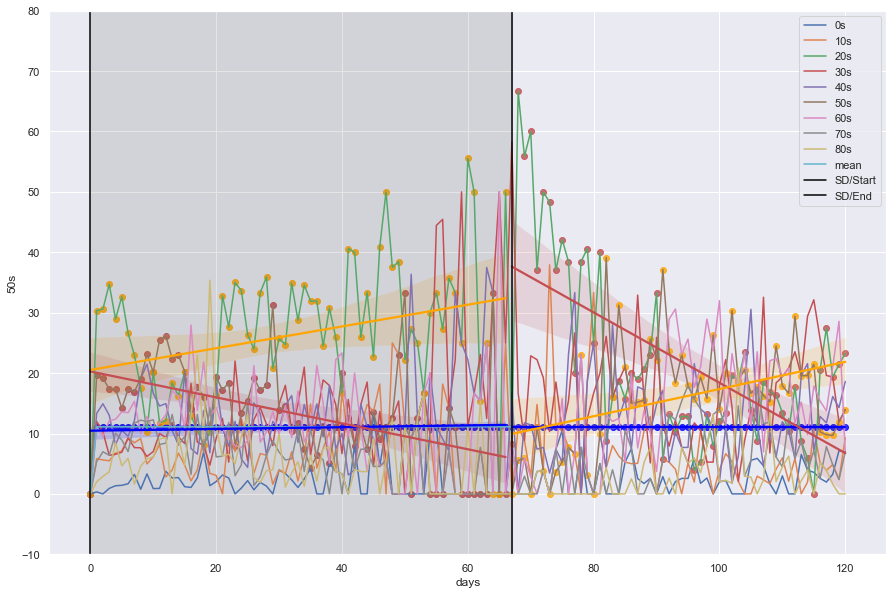

In [16]:
fig,ax=plt.subplots(figsize=(15,10))
timeage_df.drop(['days','date'],axis=1).plot(ax=ax)
sns.regplot(x='days',y='mean',data=timeage_df.iloc[:67,:],ax=ax,color='blue')
sns.regplot(x='days',y='50s',data=timeage_df.iloc[:67,:],ax=ax,color='r')
sns.regplot(x='days',y='20s',data=timeage_df.iloc[:67,:],ax=ax,color='orange')
sns.regplot(x='days',y='mean',data=timeage_df.iloc[67:,:],ax=ax,color='blue')
sns.regplot(x='days',y='20s',data=timeage_df.iloc[67:,:],ax=ax,color='r')
sns.regplot(x='days',y='50s',data=timeage_df.iloc[67:,:],ax=ax,color='orange')
plt.fill_betweenx(np.linspace(-10,110,100),0,67,alpha=0.1,color='black')
plt.axvline(0,color='black',label='SD/Start')
plt.axvline(67,color='black',label='SD/End')
plt.ylim(-10,80)
plt.legend()

In [17]:
timegender_df.index=pd.to_datetime(timegender_df.index)
timegender_df['mean']=timegender_df.mean(axis=1)
timegender_df['date']=timegender_df.index
timegender_df['days']=np.arange(len(timegender_df))
timegender_df.index=np.arange(len(timegender_df))

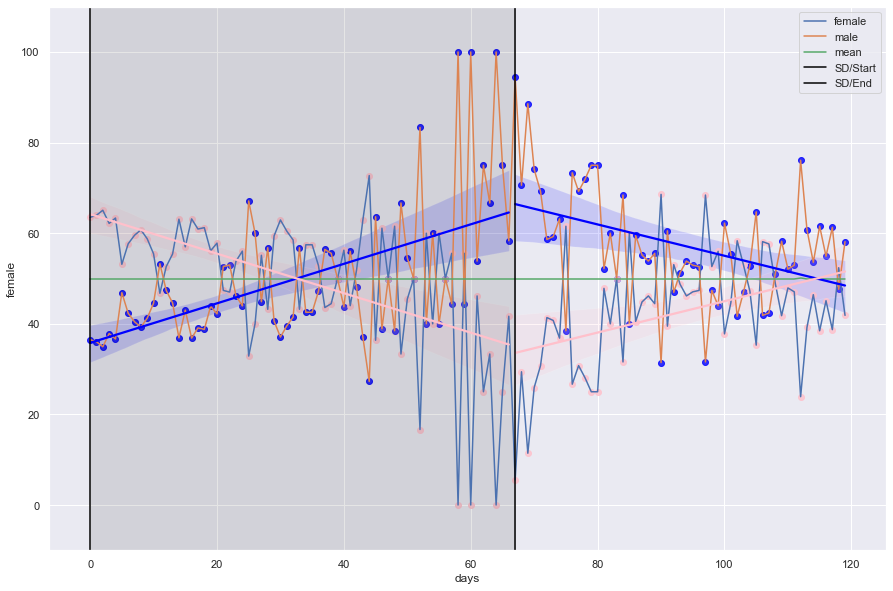

In [18]:
fig,ax=plt.subplots(figsize=(15,10))
timegender_df.drop(['days','date'],axis=1).plot(ax=ax)
sns.regplot(x='days',y='male',data=timegender_df.iloc[:67,:],ax=ax,color='blue')
sns.regplot(x='days',y='female',data=timegender_df.iloc[:67,:],ax=ax,color='pink')
sns.regplot(x='days',y='male',data=timegender_df.iloc[67:,:],ax=ax,color='blue')
sns.regplot(x='days',y='female',data=timegender_df.iloc[67:,:],ax=ax,color='pink')
plt.fill_betweenx(np.linspace(-10,110,100),0,67,alpha=0.1,color='black')
plt.axvline(0,color='black',label='SD/Start')
plt.axvline(67,color='black',label='SD/End')
plt.ylim(-10,110)
plt.legend()

In [27]:
# 접촉자 수 데이터
df_dict['PatientInfo']['contact_number']=df_dict['PatientInfo']['contact_number'].replace('-',0)
df_dict['PatientInfo']['contact_number']=df_dict['PatientInfo']['contact_number'].astype(np.float64)
contact_num=df_dict['PatientInfo'].groupby(['confirmed_date','infection_case'])['contact_number'].sum()
contact_num=contact_num.unstack()
contact_num.index=pd.to_datetime(contact_num.index)
contact_num=contact_num.fillna(0)
contact_num['sum']=contact_num.sum(axis=1)

In [28]:
# 이상치 제거
contact_num['sum'][contact_num['sum']==contact_num['sum'].max()]
contact_num['sum']['2020-03-31']=0

In [29]:
# 시각화를 위한 전처리
contact_num['date']=contact_num.index
contact_num.index=np.arange(len(contact_num))
contact_num['days']=np.arange(len(contact_num))
contact_num.index=np.arange(19,len(contact_num)+19)
contact_num['days']=contact_num['days']+19
contact_num['overseas inflow rate']=contact_num['overseas inflow']/contact_num['overseas inflow'].max()*100
contact_num['sum']=contact_num['sum']/contact_num['sum'].max()*100

In [30]:
search_df=df_dict['SearchTrend']
search_df=search_df.iloc[1461:]
search_df.reset_index(inplace=True)
search_df.drop('index',axis=1,inplace=True)
search_df['days']=search_df.index

C:\Users\tjoeun\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\tjoeun\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


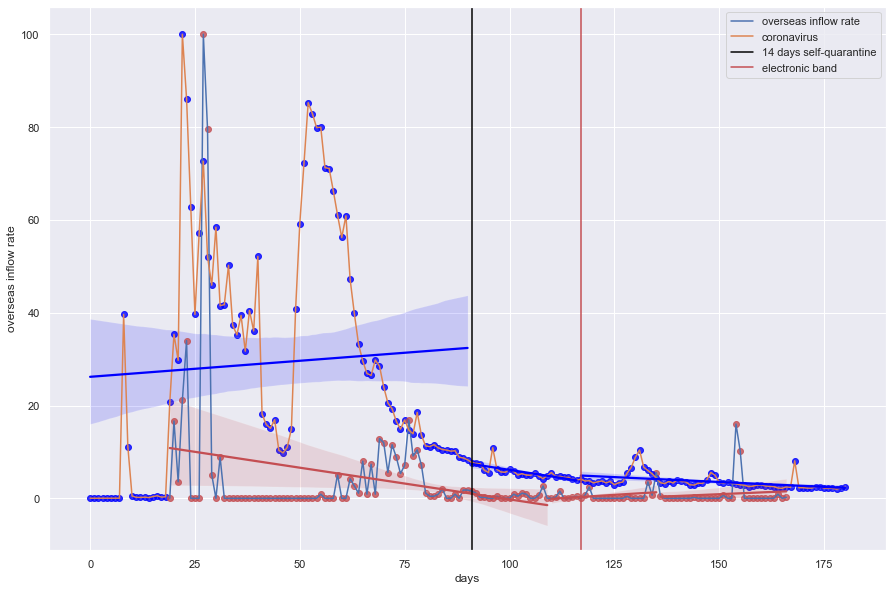

In [31]:
# 검색추이와 해외유입 확진자 접촉자 수
fig,ax=plt.subplots(figsize=(15,10))
contact_num['overseas inflow rate'].plot(figsize=(15,10),ax=ax)
search_df['coronavirus'].plot(figsize=(15,10),ax=ax)
sns.regplot(x='days',y='coronavirus',data=search_df.iloc[:91,:],color='blue')
sns.regplot(x='days',y='overseas inflow rate',data=contact_num.iloc[:91,:],color='r')
sns.regplot(x='days',y='coronavirus',data=search_df.iloc[91:117,:],color='blue')
sns.regplot(x='days',y='overseas inflow rate',data=contact_num.iloc[91:117,:],color='r')
sns.regplot(x='days',y='coronavirus',data=search_df.iloc[117:,:],color='blue')
sns.regplot(x='days',y='overseas inflow rate',data=contact_num.iloc[117:,:],color='r')
plt.axvline(91,color='black',label='14 days self-quarantine')
plt.axvline(117,color='r',label='electronic band')
plt.legend()

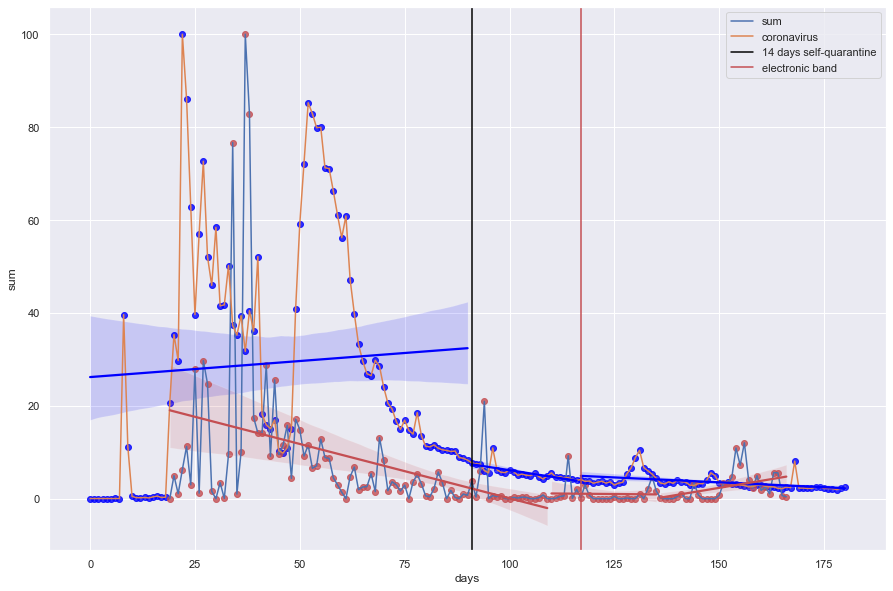

In [32]:
# 검색추이와 확진자 전체 접촉자 수
fig,ax=plt.subplots(figsize=(15,10))
contact_num['sum'].plot(figsize=(15,10),ax=ax)
search_df['coronavirus'].plot(figsize=(15,10),ax=ax)
sns.regplot(x='days',y='coronavirus',data=search_df.iloc[:91,:],color='blue')
sns.regplot(x='days',y='sum',data=contact_num.iloc[:91,:],color='r')
sns.regplot(x='days',y='coronavirus',data=search_df.iloc[91:117,:],color='blue')
sns.regplot(x='days',y='sum',data=contact_num.iloc[91:117,:],color='r')
sns.regplot(x='days',y='coronavirus',data=search_df.iloc[117:,:],color='blue')
sns.regplot(x='days',y='sum',data=contact_num.iloc[117:,:],color='r')
plt.axvline(91,color='black',label='14 days self-quarantine')
plt.axvline(117,color='r',label='electronic band')
plt.legend()

In [ ]:
# 회귀 분석 시도

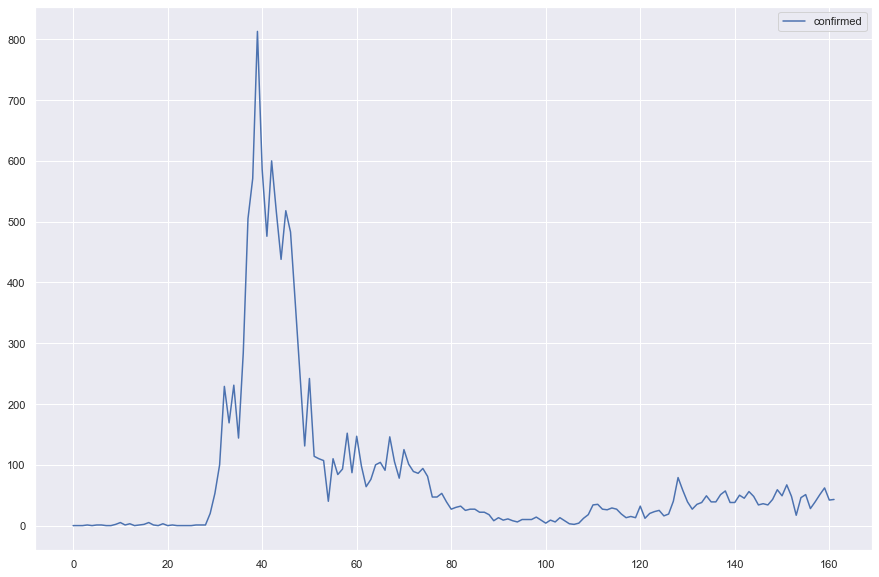

In [85]:
# 시간별 확진자 수
ex_df=df_dict['Time']
ex_df=ex_df.groupby(['date'])['confirmed'].sum()
ex_df=ex_df.diff(periods=1)[1:]
ex_df=pd.DataFrame(ex_df)
ex_df['date']=ex_df.index
ex_df.index=np.arange(len(ex_df))
ex_df['days']=ex_df.index
ex_df.drop('days',axis=1).plot(figsize=(15,10))

In [34]:
# 사회적거리두기 시작, 끝
print(ex_df[ex_df['date']=='2020-02-29'].index)
print(ex_df[ex_df['date']=='2020-05-05'].index)
# 마스크
print(ex_df[ex_df['date']=='2020-02-27'].index)
# 대중교통 의무착용
print(ex_df[ex_df['date']=='2020-05-28'].index)
# 폐쇄정책
print(ex_df[ex_df['date']=='2020-05-08'].index)
# 입국자 자가격리
print(ex_df[ex_df['date']=='2020-04-01'].index)

Int64Index([39], dtype='int64')
Int64Index([105], dtype='int64')
Int64Index([37], dtype='int64')
Int64Index([128], dtype='int64')
Int64Index([108], dtype='int64')
Int64Index([71], dtype='int64')


In [86]:
zero_df=pd.DataFrame(np.zeros([len(ex_df),5]))
ex_df=pd.concat([ex_df,zero_df],axis=1)
ex_df.columns=['confirmed','date','days','SD','Mask','TransMask','Shutdown','Quaratine']
ex_df['SD'][39:106]=1
ex_df['Mask'][37:]=1
ex_df['TransMask'][128:]=1
ex_df['Shutdown'][108:]=1
ex_df['Quaratine'][71:]=1

C:\Users\tjoeun\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\tjoeun\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\tjoeun\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\tjoeun\anaconda3\lib\site-packages\ipykern

In [88]:
ex_df.drop('days',axis=1,inplace=True)

In [4]:
X_data=pd.read_csv('c:/hyuk/datasets/KR_COVID_19/X_data.csv',index_col=0)

In [6]:
X_data['SD'][5:]=X_data['SD'][:-5]

C:\Users\tjoeun\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
X_data['SD'][:-5]=X_data['SD'][5:]

C:\Users\tjoeun\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
X_data

date   SD  Mask  TransMask  Quaratine     Busan  Chungcheongbuk-do  \
0    2020-01-21  0.0   0.0        0.0        0.0  0.000000           0.000000   
1    2020-01-22  0.0   0.0        0.0        0.0  0.000000           0.000000   
2    2020-01-23  0.0   0.0        0.0        0.0  0.000000           0.000000   
3    2020-01-24  0.0   0.0        0.0        0.0  0.000000           0.000000   
4    2020-01-25  0.0   0.0        0.0        0.0  0.000000           0.000000   
..          ...  ...   ...        ...        ...       ...                ...   
157  2020-06-26  0.3   1.0        1.0        1.0  0.000105           0.000126   
158  2020-06-27  0.3   1.0        1.0        1.0  0.000105           0.000189   
159  2020-06-28  0.3   1.0        1.0        1.0  0.000094           0.000252   
160  2020-06-29  0.3   1.0        1.0        1.0  0.000105           0.000252   
161  2020-06-30  0.3   1.0        1.0        1.0  0.000126           0.000315   

     Chungcheongnam-do     Daegu   Daejeon  ...  Gyeongsangnam-do   Incheon  \
0             0.000000  0.000000  0.000000  ...           0.00000  0.000034   
1             0.000000  0.000000  0.000000  ...           0.00000  0.000034   
2             0.000000  0.000000  0.000000  ...           0.00000  0.000034   
3             0.000000  0.000000  0.000000  ...           0.00000  0.000034   
4             0.000000  0.000000  0.000000  ...           0.00000  0.000034   
..                 ...       ...       ...  ...               ...       ...   
157           0.000855  0.008625  0.003968  ...           0.00024  0.003593   
158           0.000855  0.008459  0.004104  ...           0.00015  0.002977   
159           0.000903  0.008459  0.004515  ...           0.00015  0.002498   
160           0.000808  0.008542  0.004652  ...           0.00018  0.001848   
161           0.000808  0.008542  0.004994  ...           0.00018  0.001745   

      Jeju-do  Jeollabuk-do  Jeollanam-do    Sejong     Seoul     Ulsan  \
0    0.000000      0.000000      0.000000  0.000000  0.000000  0.000000   
1    0.000000      0.000000      0.000000  0.000000  0.000000  0.000000   
2    0.000000      0.000000      0.000000  0.000000  0.000000  0.000000   
3    0.000000      0.000000      0.000000  0.000000  0.000000  0.000000   
4    0.000000      0.000000      0.000000  0.000000  0.000000  0.000000   
..        ...           ...           ...       ...       ...       ...   
157  0.000451      0.000278      0.000108  0.000581  0.004435  0.000528   
158  0.000451      0.000334      0.000054  0.000581  0.003902  0.000440   
159  0.000451      0.000278      0.000217  0.000581  0.003923  0.000440   
160  0.000451      0.000334      0.000271  0.000581  0.003797  0.000440   
161  0.000451      0.000334      0.000271  0.000871  0.003420  0.000440   

     Shutdown(karaoke)  Shutdown(bar_and_club)  
0                    0                       0  
1                    0                       0  
2                    0                       0  
3                    0                       0  
4                    0                       0  
..                 ...                     ...  
157                  0                       0  
158                  0                       0  
159                  0                       0  
160                  0                       0  
161                  0                       0  

[162 rows x 24 columns]

In [14]:
X_data.drop('Shutdown',axis=1,inplace=True)
X_data['Shutdown(karaoke)']=0
X_data['Shutdown(bar_and_club)']=0
X_data['Shutdown(karaoke)'][121:134]=1
X_data['Shutdown(karaoke)'][128:138]=1

C:\Users\tjoeun\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\tjoeun\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [99]:
X_data=pd.merge(left=ex_df,right=province_rest,on='date',how='inner')

In [101]:
X_data.drop('confirmed',axis=1,inplace=True)

In [180]:
X_data[X_data['date']=='2020-02-29']

date   SD  Mask  TransMask  Shutdown  Quaratine     Busan  \
39  2020-02-29  1.0   1.0        0.0       0.0        0.0  0.000837   

    Chungcheongbuk-do  Chungcheongnam-do     Daegu  ...  Gyeonggi-do  \
39            0.00063           0.002614  0.092593  ...      0.00056   

    Gyeongsangbuk-do  Gyeongsangnam-do   Incheon   Jeju-do  Jeollabuk-do  \
39          0.018501          0.001741  0.000171  0.000301      0.000222   

    Jeollanam-do   Sejong     Seoul     Ulsan  
39      0.000163  0.00029  0.000711  0.001495  

[1 rows x 23 columns]

In [181]:
X_data[X_data['date']=='2020-03-21']

date   SD  Mask  TransMask  Shutdown  Quaratine     Busan  \
60  2020-03-21  1.0   1.0        0.0       0.0        0.0  0.000429   

    Chungcheongbuk-do  Chungcheongnam-do     Daegu  ...  Gyeonggi-do  \
60           0.001639           0.003802  0.185892  ...     0.001832   

    Gyeongsangbuk-do  Gyeongsangnam-do   Incheon   Jeju-do  Jeollabuk-do  \
60          0.032216           0.00141  0.001129  0.000301      0.000167   

    Jeollanam-do    Sejong     Seoul     Ulsan  
60      0.000108  0.011329  0.002615  0.002198  

[1 rows x 23 columns]

In [182]:
X_data[X_data['date']=='2020-03-22']

date   SD  Mask  TransMask  Shutdown  Quaratine     Busan  \
61  2020-03-22  1.0   1.0        0.0       0.0        0.0  0.000408   

    Chungcheongbuk-do  Chungcheongnam-do     Daegu  ...  Gyeonggi-do  \
61           0.001639           0.003849  0.177474  ...      0.00193   

    Gyeongsangbuk-do  Gyeongsangnam-do   Incheon  Jeju-do  Jeollabuk-do  \
61          0.031228           0.00138  0.001095  0.00015      0.000167   

    Jeollanam-do    Sejong    Seoul    Ulsan  
61      0.000163  0.011039  0.00272  0.00211  

[1 rows x 23 columns]

In [183]:
X_data[X_data['date']=='2020-04-19']

date   SD  Mask  TransMask  Shutdown  Quaratine     Busan  \
89  2020-04-19  1.0   1.0        0.0       0.0        1.0  0.000157   

    Chungcheongbuk-do  Chungcheongnam-do     Daegu  ...  Gyeonggi-do  \
89           0.000441           0.000903  0.045156  ...      0.00215   

    Gyeongsangbuk-do  Gyeongsangnam-do   Incheon   Jeju-do  Jeollabuk-do  \
89          0.011473           0.00093  0.001232  0.001052      0.000445   

    Jeollanam-do    Sejong     Seoul     Ulsan  
89       0.00038  0.004938  0.003515  0.000703  

[1 rows x 23 columns]

In [184]:
X_data[X_data['date']=='2020-04-20']

date   SD  Mask  TransMask  Shutdown  Quaratine     Busan  \
90  2020-04-20  1.0   1.0        0.0       0.0        1.0  0.000178   

    Chungcheongbuk-do  Chungcheongnam-do    Daegu  ...  Gyeonggi-do  \
90           0.000441           0.000903  0.04412  ...     0.002036   

    Gyeongsangbuk-do  Gyeongsangnam-do   Incheon   Jeju-do  Jeollabuk-do  \
90          0.011283           0.00087  0.001232  0.001052      0.000445   

    Jeollanam-do    Sejong     Seoul     Ulsan  
90       0.00038  0.004938  0.003347  0.000791  

[1 rows x 23 columns]

In [185]:
X_data[X_data['date']=='2020-05-05']

date   SD  Mask  TransMask  Shutdown  Quaratine    Busan  \
105  2020-05-05  1.0   1.0        0.0       0.0        1.0  0.00022   

     Chungcheongbuk-do  Chungcheongnam-do     Daegu  ...  Gyeonggi-do  \
105           0.000189           0.000713  0.027243  ...     0.001234   

     Gyeongsangbuk-do  Gyeongsangnam-do  Incheon   Jeju-do  Jeollabuk-do  \
105          0.006838           0.00045  0.00089  0.000752      0.000334   

     Jeollanam-do   Sejong     Seoul     Ulsan  
105      0.000217  0.00029  0.001548  0.000528  

[1 rows x 23 columns]

In [186]:
X_data[X_data['date']=='2020-05-06']

date   SD  Mask  TransMask  Shutdown  Quaratine     Busan  \
106  2020-05-06  0.0   1.0        0.0       0.0        1.0  0.000199   

     Chungcheongbuk-do  Chungcheongnam-do     Daegu  ...  Gyeonggi-do  \
106           0.000189           0.000713  0.026497  ...     0.001181   

     Gyeongsangbuk-do  Gyeongsangnam-do   Incheon  Jeju-do  Jeollabuk-do  \
106          0.006686           0.00039  0.000855  0.00015      0.000334   

     Jeollanam-do   Sejong     Seoul     Ulsan  
106      0.000217  0.00029  0.001496  0.000615  

[1 rows x 23 columns]

In [217]:
# shutdown(노래방)
X_data[X_data['date']=='2020-05-21']

date   SD  Mask  TransMask  Shutdown  Quaratine     Busan  \
121  2020-05-21  0.0   1.0        0.0       1.0        1.0  0.000136   

     Chungcheongbuk-do  Chungcheongnam-do     Daegu  ...  Gyeonggi-do  \
121           0.000945            0.00019  0.015508  ...     0.000787   

     Gyeongsangbuk-do  Gyeongsangnam-do   Incheon  Jeju-do  Jeollabuk-do  \
121          0.003647           0.00012  0.001745  0.00015      0.000111   

     Jeollanam-do  Sejong     Seoul     Ulsan  
121      0.000108     0.0  0.001674  0.000615  

[1 rows x 23 columns]

In [218]:
# shutdown(바,클럽)
X_data[X_data['date']=='2020-05-28']

date   SD  Mask  TransMask  Shutdown  Quaratine     Busan  \
128  2020-05-28  0.0   1.0        1.0       1.0        1.0  0.000094   

     Chungcheongbuk-do  Chungcheongnam-do     Daegu  ...  Gyeonggi-do  \
128           0.000882           0.000238  0.012606  ...     0.001128   

     Gyeongsangbuk-do  Gyeongsangnam-do   Incheon  Jeju-do  Jeollabuk-do  \
128          0.003343           0.00012  0.002977  0.00015      0.000111   

     Jeollanam-do  Sejong     Seoul     Ulsan  
128      0.000054     0.0  0.002144  0.000528  

[1 rows x 23 columns]

In [219]:
# shutdown(노래방)
X_data[X_data['date']=='2020-06-03']

date   SD  Mask  TransMask  Shutdown  Quaratine     Busan  \
134  2020-06-03  0.0   1.0        1.0       1.0        1.0  0.000094   

     Chungcheongbuk-do  Chungcheongnam-do    Daegu  ...  Gyeonggi-do  \
134           0.000693            0.00019  0.01074  ...     0.001642   

     Gyeongsangbuk-do  Gyeongsangnam-do   Incheon   Jeju-do  Jeollabuk-do  \
134          0.003077           0.00006  0.005167  0.000301      0.000111   

     Jeollanam-do  Sejong     Seoul     Ulsan  
134      0.000163     0.0  0.002678  0.000615  

[1 rows x 23 columns]

In [220]:
# shutdown(바,클럽)
X_data[X_data['date']=='2020-06-07']

date   SD  Mask  TransMask  Shutdown  Quaratine     Busan  \
138  2020-06-07  0.0   1.0        1.0       1.0        1.0  0.000073   

     Chungcheongbuk-do  Chungcheongnam-do     Daegu  ...  Gyeonggi-do  \
138           0.000756           0.000238  0.010242  ...     0.001938   

     Gyeongsangbuk-do  Gyeongsangnam-do   Incheon   Jeju-do  Jeollabuk-do  \
138          0.003001           0.00006  0.005509  0.000301      0.000111   

     Jeollanam-do  Sejong     Seoul     Ulsan  
138      0.000163     0.0  0.003379  0.000615  

[1 rows x 23 columns]

In [31]:
# 공적 마스크 공급
X_data[X_data['date']=='2020-02-27']

date   SD  Mask  TransMask  Quaratine     Busan  Chungcheongbuk-do  \
37  2020-02-27  0.0   1.0        0.0        0.0  0.000638           0.000504   

    Chungcheongnam-do     Daegu   Daejeon  ...  Gyeongsangnam-do   Incheon  \
37            0.00057  0.046857  0.000616  ...           0.00129  0.000068   

     Jeju-do  Jeollabuk-do  Jeollanam-do   Sejong     Seoul     Ulsan  \
37  0.000301      0.000222      0.000054  0.00029  0.000502  0.000967   

    Shutdown(karaoke)  Shutdown(bar_and_club)  
37                  0                       0  

[1 rows x 24 columns]

In [33]:
# 공적 마스크 공급 종료
X_data[X_data['date']=='2020-07-12']

Empty DataFrame
Columns: [date, SD, Mask, TransMask, Quaratine, Busan, Chungcheongbuk-do, Chungcheongnam-do, Daegu, Daejeon, Gangwon-do, Gwangju, Gyeonggi-do, Gyeongsangbuk-do, Gyeongsangnam-do, Incheon, Jeju-do, Jeollabuk-do, Jeollanam-do, Sejong, Seoul, Ulsan, Shutdown(karaoke), Shutdown(bar_and_club)]
Index: []

[0 rows x 24 columns]

In [29]:
# 마스크 5부제
X_data[X_data['date']=='2020-03-09']

date        SD  Mask  TransMask  Quaratine   Busan  \
48  2020-03-09  1.092308   1.0        0.0        0.0  0.0009   

    Chungcheongbuk-do  Chungcheongnam-do     Daegu   Daejeon  ...  \
48           0.001386             0.0048  0.230136  0.001163  ...   

    Gyeongsangnam-do  Incheon   Jeju-do  Jeollabuk-do  Jeollanam-do    Sejong  \
48          0.002221  0.00024  0.000451      0.000278      0.000163  0.001743   

       Seoul     Ulsan  Shutdown(karaoke)  Shutdown(bar_and_club)  
48  0.001056  0.002022                  0                       0  

[1 rows x 24 columns]

In [30]:
# 마스크 5부제
X_data[X_data['date']=='2020-06-01']

date   SD  Mask  TransMask  Quaratine     Busan  Chungcheongbuk-do  \
132  2020-06-01  0.3   1.0        1.0        1.0  0.000094           0.000693   

     Chungcheongnam-do     Daegu   Daejeon  ...  Gyeongsangnam-do   Incheon  \
132            0.00019  0.011362  0.000274  ...           0.00006  0.004311   

      Jeju-do  Jeollabuk-do  Jeollanam-do  Sejong     Seoul     Ulsan  \
132  0.000301      0.000111      0.000163     0.0  0.002458  0.000615   

     Shutdown(karaoke)  Shutdown(bar_and_club)  
132                  1                       0  

[1 rows x 24 columns]

In [57]:
# 대중교통 마스크 의무착용
X_data[X_data['date']=='2020-05-27']

date   SD  Mask  TransMask  Quaratine     Busan  Chungcheongbuk-do  \
127  2020-05-27  0.3   1.0        0.0        1.0  0.000094           0.000882   

     Chungcheongnam-do     Daegu   Daejeon  ...  Gyeongsangnam-do   Incheon  \
127            0.00019  0.013311  0.000342  ...           0.00012  0.002224   

     Jeju-do  Jeollabuk-do  Jeollanam-do  Sejong     Seoul     Ulsan  \
127  0.00015      0.000111      0.000054     0.0  0.001925  0.000703   

     Shutdown(karaoke)  Shutdown(bar_and_club)  
127                  1                       0  

[1 rows x 24 columns]

In [59]:
X_data['TransMask']=0
X_data['TransMask'][127:]=1

C:\Users\tjoeun\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [65]:
X_data

date   SD  Mask  TransMask  Quaratine     Busan  Chungcheongbuk-do  \
0    2020-01-21  0.0   0.0          0        0.0  0.000000           0.000000   
1    2020-01-22  0.0   0.0          0        0.0  0.000000           0.000000   
2    2020-01-23  0.0   0.0          0        0.0  0.000000           0.000000   
3    2020-01-24  0.0   0.0          0        0.0  0.000000           0.000000   
4    2020-01-25  0.0   0.0          0        0.0  0.000000           0.000000   
..          ...  ...   ...        ...        ...       ...                ...   
157  2020-06-26  0.3   1.0          1        1.0  0.000105           0.000126   
158  2020-06-27  0.3   1.0          1        1.0  0.000105           0.000189   
159  2020-06-28  0.3   1.0          1        1.0  0.000094           0.000252   
160  2020-06-29  0.3   1.0          1        1.0  0.000105           0.000252   
161  2020-06-30  0.3   1.0          1        1.0  0.000126           0.000315   

     Chungcheongnam-do     Daegu   Daejeon  ...  Gyeongsangnam-do   Incheon  \
0             0.000000  0.000000  0.000000  ...           0.00000  0.000034   
1             0.000000  0.000000  0.000000  ...           0.00000  0.000034   
2             0.000000  0.000000  0.000000  ...           0.00000  0.000034   
3             0.000000  0.000000  0.000000  ...           0.00000  0.000034   
4             0.000000  0.000000  0.000000  ...           0.00000  0.000034   
..                 ...       ...       ...  ...               ...       ...   
157           0.000855  0.008625  0.003968  ...           0.00024  0.003593   
158           0.000855  0.008459  0.004104  ...           0.00015  0.002977   
159           0.000903  0.008459  0.004515  ...           0.00015  0.002498   
160           0.000808  0.008542  0.004652  ...           0.00018  0.001848   
161           0.000808  0.008542  0.004994  ...           0.00018  0.001745   

      Jeju-do  Jeollabuk-do  Jeollanam-do    Sejong     Seoul     Ulsan  \
0    0.000000      0.000000      0.000000  0.000000  0.000000  0.000000   
1    0.000000      0.000000      0.000000  0.000000  0.000000  0.000000   
2    0.000000      0.000000      0.000000  0.000000  0.000000  0.000000   
3    0.000000      0.000000      0.000000  0.000000  0.000000  0.000000   
4    0.000000      0.000000      0.000000  0.000000  0.000000  0.000000   
..        ...           ...           ...       ...       ...       ...   
157  0.000451      0.000278      0.000108  0.000581  0.004435  0.000528   
158  0.000451      0.000334      0.000054  0.000581  0.003902  0.000440   
159  0.000451      0.000278      0.000217  0.000581  0.003923  0.000440   
160  0.000451      0.000334      0.000271  0.000581  0.003797  0.000440   
161  0.000451      0.000334      0.000271  0.000871  0.003420  0.000440   

     Shutdown(karaoke)  Shutdown(bar_and_club)  
0                    0                       0  
1                    0                       0  
2                    0                       0  
3                    0                       0  
4                    0                       0  
..                 ...                     ...  
157                  0                       0  
158                  0                       0  
159                  0                       0  
160                  0                       0  
161                  0                       0  

[162 rows x 24 columns]

In [63]:
regions=X_data.columns[5:-2]

In [68]:
X_dict=dict()
for reg in regions:
    X_dict[reg]=X_data[[reg,'SD','TransMask','Quaratine','Shutdown(karaoke)','Shutdown(bar_and_club)']].iloc[5:112,:]

In [ ]:
# 7월 8일~ : 마스크 제한없이 구매가능
# 

In [235]:
sd=np.concatenate(sd_ls)

In [236]:
len(sd)

123

In [237]:
len(X_data['SD'][39:])

123

In [238]:
X_data['SD'][39:]=sd

C:\Users\tjoeun\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [239]:
X_data.to_csv()

date   SD  Mask  TransMask  Shutdown  Quaratine     Busan  \
0    2020-01-21  0.0   0.0        0.0       0.0        0.0  0.000000   
1    2020-01-22  0.0   0.0        0.0       0.0        0.0  0.000000   
2    2020-01-23  0.0   0.0        0.0       0.0        0.0  0.000000   
3    2020-01-24  0.0   0.0        0.0       0.0        0.0  0.000000   
4    2020-01-25  0.0   0.0        0.0       0.0        0.0  0.000000   
..          ...  ...   ...        ...       ...        ...       ...   
157  2020-06-26  0.3   1.0        1.0       1.0        1.0  0.000105   
158  2020-06-27  0.3   1.0        1.0       1.0        1.0  0.000105   
159  2020-06-28  0.3   1.0        1.0       1.0        1.0  0.000094   
160  2020-06-29  0.3   1.0        1.0       1.0        1.0  0.000105   
161  2020-06-30  0.3   1.0        1.0       1.0        1.0  0.000126   

     Chungcheongbuk-do  Chungcheongnam-do     Daegu  ...  Gyeonggi-do  \
0             0.000000           0.000000  0.000000  ...     0.000000   
1             0.000000           0.000000  0.000000  ...     0.000000   
2             0.000000           0.000000  0.000000  ...     0.000000   
3             0.000000           0.000000  0.000000  ...     0.000008   
4             0.000000           0.000000  0.000000  ...     0.000008   
..                 ...                ...       ...  ...          ...   
157           0.000126           0.000855  0.008625  ...     0.002543   
158           0.000189           0.000855  0.008459  ...     0.002339   
159           0.000252           0.000903  0.008459  ...     0.002354   
160           0.000252           0.000808  0.008542  ...     0.002361   
161           0.000315           0.000808  0.008542  ...     0.002089   

     Gyeongsangbuk-do  Gyeongsangnam-do   Incheon   Jeju-do  Jeollabuk-do  \
0            0.000000           0.00000  0.000034  0.000000      0.000000   
1            0.000000           0.00000  0.000034  0.000000      0.000000   
2            0.000000           0.00000  0.000034  0.000000      0.000000   
3            0.000000           0.00000  0.000034  0.000000      0.000000   
4            0.000000           0.00000  0.000034  0.000000      0.000000   
..                ...               ...       ...       ...           ...   
157          0.002279           0.00024  0.003593  0.000451      0.000278   
158          0.002241           0.00015  0.002977  0.000451      0.000334   
159          0.002241           0.00015  0.002498  0.000451      0.000278   
160          0.002279           0.00018  0.001848  0.000451      0.000334   
161          0.002317           0.00018  0.001745  0.000451      0.000334   

     Jeollanam-do    Sejong     Seoul     Ulsan  
0        0.000000  0.000000  0.000000  0.000000  
1        0.000000  0.000000  0.000000  0.000000  
2        0.000000  0.000000  0.000000  0.000000  
3        0.000000  0.000000  0.000000  0.000000  
4        0.000000  0.000000  0.000000  0.000000  
..            ...       ...       ...       ...  
157      0.000108  0.000581  0.004435  0.000528  
158      0.000054  0.000581  0.003902  0.000440  
159      0.000217  0.000581  0.003923  0.000440  
160      0.000271  0.000581  0.003797  0.000440  
161      0.000271  0.000871  0.003420  0.000440  

[162 rows x 23 columns]

In [234]:
sd_ls=[np.linspace(1,1.2,7),np.linspace(1.2,0.5,14),np.linspace(0.5,1.2,7),np.linspace(0.5,1.2,7),np.array([0.5]*7),np.linspace(0.5,1,7),np.linspace(1,0.3,8),np.linspace(0.5,1,7),np.linspace(1,0.3,14),np.array([0.3]*45)]

In [187]:
# sd1 strong 1wk
np.linspace(1,1.2,7)

array([1.        , 1.03333333, 1.06666667, 1.1       , 1.13333333,
       1.16666667, 1.2       ])

In [188]:
# sd1 strong 3wk
np.linspace(1.2,0.5,14)

array([1.2       , 1.14615385, 1.09230769, 1.03846154, 0.98461538,
       0.93076923, 0.87692308, 0.82307692, 0.76923077, 0.71538462,
       0.66153846, 0.60769231, 0.55384615, 0.5       ])

In [189]:
# sd2 strong 1wk
np.linspace(0.5,1.2,7)

array([0.5       , 0.61666667, 0.73333333, 0.85      , 0.96666667,
       1.08333333, 1.2       ])

In [190]:
# sd2 strong 3wk
np.linspace(1.2,0.5,14)

array([1.2       , 1.14615385, 1.09230769, 1.03846154, 0.98461538,
       0.93076923, 0.87692308, 0.82307692, 0.76923077, 0.71538462,
       0.66153846, 0.60769231, 0.55384615, 0.5       ])

In [194]:
# sd2 strong 4wk
np.array([0.5]*7)

array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5])

In [195]:
# sd3 weak 1wk
np.linspace(0.5,1,7)

array([0.5       , 0.58333333, 0.66666667, 0.75      , 0.83333333,
       0.91666667, 1.        ])

In [196]:
# sd3 weak 2wk
np.linspace(1,0.3,8)

array([1. , 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3])

In [197]:
# sd4 weak 1wk
np.linspace(0.5,1,7)

array([0.5       , 0.58333333, 0.66666667, 0.75      , 0.83333333,
       0.91666667, 1.        ])

In [200]:
# sd4 weak 3wk
np.linspace(1,0.3,14)

array([1.        , 0.94615385, 0.89230769, 0.83846154, 0.78461538,
       0.73076923, 0.67692308, 0.62307692, 0.56923077, 0.51538462,
       0.46153846, 0.40769231, 0.35384615, 0.3       ])

In [202]:
# sd4 weak rest
np.array([0.3]*42)

array([0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3,
       0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3,
       0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3,
       0.3, 0.3, 0.3])

In [201]:
len(X_data)

162

In [206]:
policy_df=df_dict['Policy']

In [179]:
df_dict['Policy'][df_dict['Policy']['gov_policy']=='Social Distancing Campaign']

policy_id country    type                  gov_policy     detail  \
28         29   Korea  Social  Social Distancing Campaign     Strong   
29         30   Korea  Social  Social Distancing Campaign     Strong   
30         31   Korea  Social  Social Distancing Campaign       Weak   
31         32   Korea  Social  Social Distancing Campaign  Weak(1st)   

    start_date    end_date  
28  2020-02-29  2020-03-21  
29  2020-03-22  2020-04-19  
30  2020-04-20  2020-05-05  
31  2020-05-06         NaN

In [207]:
policy_df[policy_df['gov_policy']=='Mandatory 14-day Self-Quarantine']

policy_id country         type                        gov_policy  \
17         18   Korea  Immigration  Mandatory 14-day Self-Quarantine   

                    detail  start_date end_date  
17  from all the countries  2020-04-01      NaN

In [209]:
policy_df[policy_df['gov_policy']=='Mandatory Self-Quarantine & Diagonostic Tests']

policy_id country         type  \
18         19   Korea  Immigration   

                                       gov_policy     detail  start_date  \
18  Mandatory Self-Quarantine & Diagonostic Tests  from U.S.  2020-04-13   

   end_date  
18      NaN

In [210]:
policy_df[policy_df['gov_policy']=='Self-Quarantine Safety Protection App']

policy_id country        type                             gov_policy  \
51         52   Korea  Technology  Self-Quarantine Safety Protection App   

   detail  start_date end_date  
51    NaN  2020-03-07      NaN

In [211]:
policy_df[policy_df['gov_policy']=='Extends Tightened Quarantine Measures ']

policy_id country    type                              gov_policy  \
60         61   Korea  Health  Extends Tightened Quarantine Measures    

                                               detail  start_date    end_date  
60  Gov't Extends Tightened Quarantine Measures in...  2020-05-28  2020-06-14

In [213]:
policy_df[policy_df['gov_policy']=='Wearing of masks']

policy_id country            type        gov_policy  \
57         58   Korea  Transformation  Wearing of masks   
58         59   Korea  Transformation  Wearing of masks   

                                               detail  start_date end_date  
57  Mandatory wearing of passenger mask domestic, ...  2020-05-27      NaN  
58  Drivers such as buses and taxis can refuse to ...  2020-05-26      NaN

In [214]:
# 마스크 5부제 6월 1일 종료
policy_df[policy_df['gov_policy']=='Mask Distribution']

policy_id country    type         gov_policy                 detail  \
26         27   Korea  Health  Mask Distribution            Public-Sale   
27         28   Korea  Health  Mask Distribution  5-day Rotation System   

    start_date end_date  
26  2020-02-27      NaN  
27  2020-03-09      NaN

In [215]:
policy_df[policy_df['gov_policy']=='Close karaoke']

policy_id country            type     gov_policy  \
55         56   Korea  Administrative  Close karaoke   

                                               detail  start_date    end_date  
55  Ban on gathering for 2 weeks for all karaoke a...  2020-05-21  2020-06-03

In [216]:
policy_df[policy_df['gov_policy']=='Close bars and clubs']

policy_id country            type            gov_policy  \
53         54   Korea  Administrative  Close bars and clubs   

                                          detail  start_date    end_date  
53  administrative order to close bars and clubs  2020-05-08  2020-06-07

In [204]:
df_dict['Policy']['gov_policy'].unique()

array(['Infectious Disease Alert Level', 'Special Immigration Procedure',
       'Mandatory 14-day Self-Quarantine',
       'Mandatory Self-Quarantine & Diagonostic Tests',
       'Emergency Use Authorization of Diagnostic Kit',
       'Drive-Through Screening Center', 'Mask Distribution',
       'Social Distancing Campaign', 'Thanks to Challenge korea',
       'School Closure', 'School Opening Delay',
       'School Opening with Online Class', 'Open Data ', 'Open API',
       'Self-Diagnosis App', 'Self-Quarantine Safety Protection App',
       'Electronic Wristbands', 'Close bars and clubs',
       'local government Administrative orders', 'Close karaoke',
       'Logistics center', 'Wearing of masks',
       'KI-Pass: Korea Internet - Pass',
       'Extends Tightened Quarantine Measures '], dtype=object)

In [212]:
policy_df

policy_id country            type                              gov_policy  \
0           1   Korea           Alert          Infectious Disease Alert Level   
1           2   Korea           Alert          Infectious Disease Alert Level   
2           3   Korea           Alert          Infectious Disease Alert Level   
3           4   Korea           Alert          Infectious Disease Alert Level   
4           5   Korea     Immigration           Special Immigration Procedure   
..        ...     ...             ...                                     ...   
56         57   Korea  Transformation                        Logistics center   
57         58   Korea  Transformation                        Wearing of masks   
58         59   Korea  Transformation                        Wearing of masks   
59         60   Korea      Technology          KI-Pass: Korea Internet - Pass   
60         61   Korea          Health  Extends Tightened Quarantine Measures    

                                               detail  start_date    end_date  
0                                      Level 1 (Blue)  2020-01-03  2020-01-19  
1                                    Level 2 (Yellow)  2020-01-20  2020-01-27  
2                                    Level 3 (Orange)  2020-01-28  2020-02-22  
3                                       Level 4 (Red)  2020-02-23         NaN  
4                                          from China  2020-02-04         NaN  
..                                                ...         ...         ...  
56  On-site inspection of major logistics faciliti...  2020-05-29  2020-06-11  
57  Mandatory wearing of passenger mask domestic, ...  2020-05-27         NaN  
58  Drivers such as buses and taxis can refuse to ...  2020-05-26         NaN  
59  new quick response (QR) code system this week ...  2020-06-10         NaN  
60  Gov't Extends Tightened Quarantine Measures in...  2020-05-28  2020-06-14  

[61 rows x 7 columns]

In [83]:
zero_df=pd.DataFrame(np.zeros([len(ex_df),5]))
ex_df=pd.concat([ex_df,zero_df],axis=1)
ex_df.columns=['confirmed','date','days','SD','Mask','TransMask','Shutdown','Quaratine']
ex_df['SD'][39:106]=1
ex_df['Mask'][37:]=1
ex_df['TransMask'][128:]=1
ex_df['Shutdown'][108:]=1
ex_df['Quaratine'][71:]=1

ValueError: Length mismatch: Expected axis has 13 elements, new values have 8 elements

In [36]:
from statsmodels.regression.linear_model import OLS
from sklearn.preprocessing import StandardScaler

In [37]:
sc=StandardScaler()

In [38]:
X_data=ex_df.iloc[:,2:].values
y_data=sc.fit_transform(ex_df['confirmed'].values[:,np.newaxis])
ex_df['std_confirmed']=y_data

In [39]:
model1=OLS(y_data,X_data)
res=model1.fit()

In [40]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.500
Model:                            OLS   Adj. R-squared (uncentered):              0.480
Method:                 Least Squares   F-statistic:                              25.96
Date:                Thu, 09 Jul 2020   Prob (F-statistic):                    2.85e-21
Time:                        15:55:58   Log-Likelihood:                         -173.79
No. Observations:                 162   AIC:                                      359.6
Df Residuals:                     156   BIC:                                      378.1
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0210      0.004     -4.841      0.000      -0.030      -0.012
x2            -1.0383      0.371     -2.798      0.006      -1.771      -0.305
x3             3.3612      0.439      7.659      0.000       2.494       4.228
x4             0.7313      0.234      3.119      0.002       0.268       1.194
x5            -0.4200      0.422     -0.996      0.321      -1.253       0.413
x6            -0.8874      0.230     -3.853      0.000      -1.342      -0.433
==============================================================================
Omnibus:                       84.635   Durbin-Watson:                   0.342
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              400.072
Skew:                           1.947   Prob(JB):                     1.34e-87
Kurtosis:                       9.641   Cond. No.                     1.05e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
model2=OLS(y_data,X_data[:,[0,1,2,3,5]])
res=model2.fit()

In [42]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.496
Model:                            OLS   Adj. R-squared (uncentered):              0.480
Method:                 Least Squares   F-statistic:                              30.95
Date:                Thu, 09 Jul 2020   Prob (F-statistic):                    7.84e-22
Time:                        15:56:08   Log-Likelihood:                         -174.30
No. Observations:                 162   AIC:                                      358.6
Df Residuals:                     157   BIC:                                      374.0
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0222      0.004     -5.348      0.000      -0.030      -0.014
x2            -0.7314      0.207     -3.534      0.001      -1.140      -0.323
x3             3.1384      0.378      8.312      0.000       2.393       3.884
x4             0.7032      0.233      3.021      0.003       0.243       1.163
x5            -0.8783      0.230     -3.817      0.000      -1.333      -0.424
==============================================================================
Omnibus:                       82.199   Durbin-Watson:                   0.300
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              366.570
Skew:                           1.907   Prob(JB):                     2.51e-80
Kurtosis:                       9.306   Cond. No.                         696.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
y_pred=res.predict(X_data[:,[0,1,2,3,5]])

No handles with labels found to put in legend.


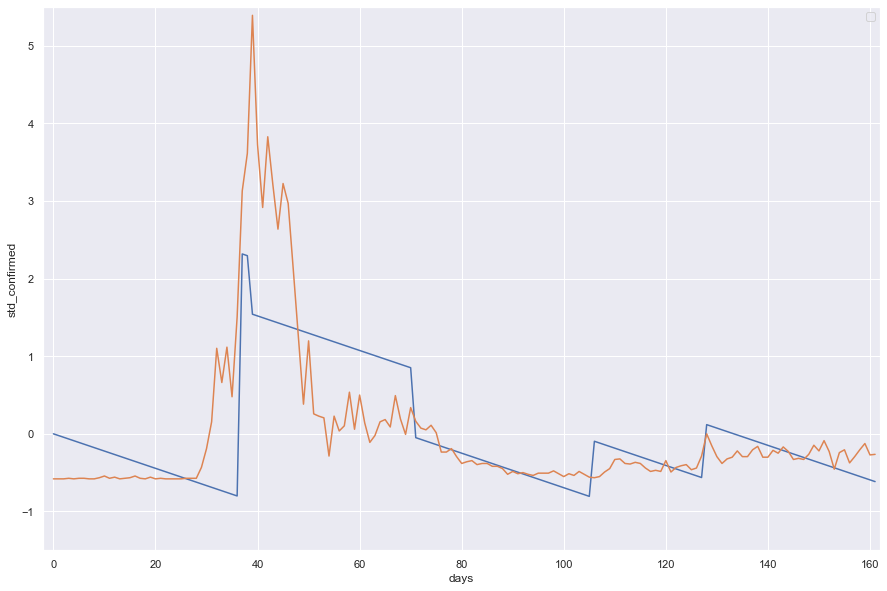

In [44]:
plt.figure(figsize=(15,10))
plt.plot(X_data[:,0],y_pred)
sns.lineplot(x='days',y='std_confirmed',data=ex_df)
plt.xlim(-2,162)
plt.ylim(-1.5,5.5)
plt.legend()

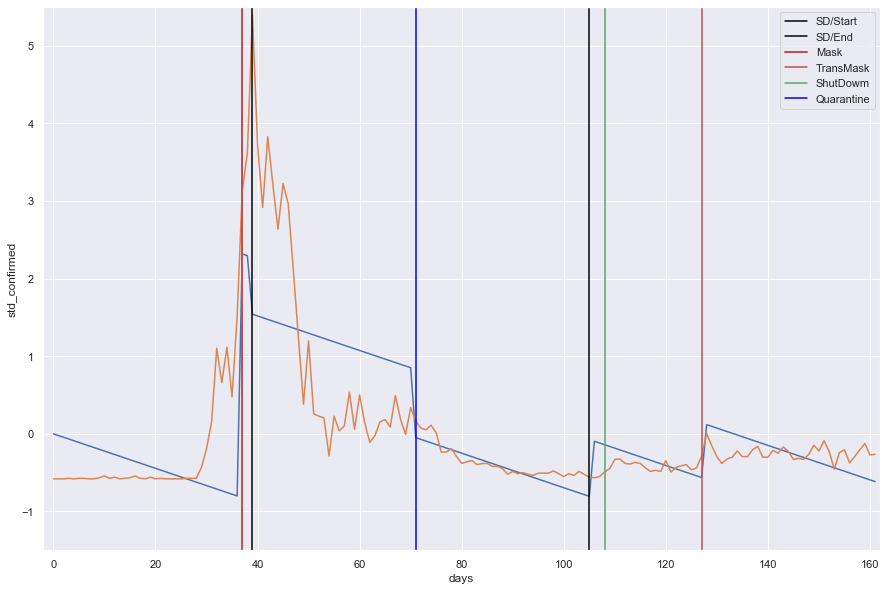

In [45]:
plt.figure(figsize=(15,10))
plt.plot(X_data[:,0],y_pred)
sns.lineplot(x='days',y='std_confirmed',data=ex_df)
plt.axvline(39,color='black',label='SD/Start')
plt.axvline(105,color='black',label='SD/End')
plt.axvline(37,color='r',label='Mask',linewidth=2)
plt.axvline(127,color='r',label='TransMask')
plt.axvline(108,color='g',label='ShutDowm')
plt.axvline(71,color='blue',label='Quarantine')
plt.xlim(-2,162)
plt.ylim(-1.5,5.5)
plt.legend()

In [3]:
csv_ls

['Case.csv',
 'PatientInfo.csv',
 'PatientRoute.csv',
 'Policy.csv',
 'Region.csv',
 'SearchTrend.csv',
 'SeoulFloating.csv',
 'Time.csv',
 'TimeAge.csv',
 'TimeGender.csv',
 'TimeProvince.csv',
 'Weather.csv']

In [30]:
df_dict['Case'][df_dict['Case']['group']==True]['infection_case'].unique()

array(['Itaewon Clubs', 'Richway', 'Guro-gu Call Center',
       'Yangcheon Table Tennis Club', 'Day Care Center',
       'Manmin Central Church', 'SMR Newly Planted Churches Group',
       'Dongan Church', 'Coupang Logistics Center', 'Wangsung Church',
       "Eunpyeong St. Mary's Hospital", 'Seongdong-gu APT',
       'Jongno Community Center', 'Samsung Medical Center',
       'Jung-gu Fashion Company', 'Yeonana News Class',
       'Korea Campus Crusade of Christ', 'Gangnam Yeoksam-dong gathering',
       'Daejeon door-to-door sales',
       'Geumcheon-gu rice milling machine manufacture',
       'Shincheonji Church', 'Guri Collective Infection',
       'KB Life Insurance', 'Yeongdeungpo Learning Institute',
       'Gangnam Dongin Church', 'Biblical Language study meeting',
       'Seocho Family', 'Anyang Gunpo Pastors Group',
       'Samsung Fire & Marine Insurance', 'SJ Investment Call Center',
       'Yongin Brothers', 'Seoul City Hall Station safety worker',
       'Uiwang Logisti

In [115]:
group_case=df_dict['Case'][df_dict['Case']['group']==True]

In [131]:
group_case[group_case['confirmed']>50]

case_id           province             city  group  \
0     1000001              Seoul       Yongsan-gu   True   
1     1000002              Seoul        Gwanak-gu   True   
2     1000003              Seoul          Guro-gu   True   
48    1200001              Daegu           Nam-gu   True   
49    1200002              Daegu     Dalseong-gun   True   
50    1200003              Daegu           Seo-gu   True   
51    1200004              Daegu     Dalseong-gun   True   
63    1400001            Incheon  from other city   True   
70    1500001            Daejeon                -   True   
90    2000001        Gyeonggi-do      Seongnam-si   True   
91    2000002        Gyeonggi-do       Bucheon-si   True   
92    2000003        Gyeonggi-do  from other city   True   
93    2000004        Gyeonggi-do  from other city   True   
127   4100001  Chungcheongnam-do       Cheonan-si   True   
145   6000001   Gyeongsangbuk-do  from other city   True   
146   6000002   Gyeongsangbuk-do     Cheongdo-gun   True   
147   6000003   Gyeongsangbuk-do      Bonghwa-gun   True   
148   6000004   Gyeongsangbuk-do     Gyeongsan-si   True   

                      infection_case  confirmed   latitude   longitude  
0                      Itaewon Clubs        139  37.538621  126.992652  
1                            Richway        119   37.48208  126.901384  
2                Guro-gu Call Center         95  37.508163  126.884387  
48                Shincheonji Church       4511   35.84008    128.5667  
49             Second Mi-Ju Hospital        196  35.857375  128.466651  
50   Hansarang Convalescent Hospital        124  35.885592  128.556649  
51      Daesil Convalescent Hospital        101  35.857393  128.466653  
63                     Itaewon Clubs         53          -           -  
70     Door-to-door sales in Daejeon         55          -           -  
90   River of Grace Community Church         67  37.455687  127.161627  
91          Coupang Logistics Center         67  37.530579  126.775254  
92                     Itaewon Clubs         59          -           -  
93                           Richway         58          -           -  
127          gym facility in Cheonan        103   36.81503    127.1139  
145               Shincheonji Church        566          -           -  
146         Cheongdo Daenam Hospital        119   35.64887    128.7368  
147      Bonghwa Pureun Nursing Home         68   36.92757    128.9099  
148    Gyeongsan Seorin Nursing Home         66  35.782149  128.801498

In [130]:
group_case[group_case['confirmed']>50]['infection_case'].unique()

array(['Itaewon Clubs', 'Richway', 'Guro-gu Call Center',
       'Shincheonji Church', 'Second Mi-Ju Hospital',
       'Hansarang Convalescent Hospital', 'Daesil Convalescent Hospital',
       'Door-to-door sales in Daejeon', 'River of Grace Community Church',
       'Coupang Logistics Center', 'gym facility in Cheonan',
       'Cheongdo Daenam Hospital', 'Bonghwa Pureun Nursing Home',
       'Gyeongsan Seorin Nursing Home'], dtype=object)

In [124]:
df_dict.keys()

dict_keys(['Case', 'PatientInfo', 'PatientRoute', 'Policy', 'Region', 'SearchTrend', 'SeoulFloating', 'Time', 'TimeAge', 'TimeGender', 'TimeProvince', 'Weather', 'X_data'])

In [125]:
df_dict['SeoulFloating']

date  hour  birth_year     sex province           city  fp_num
0        2020-01-01     0          20  female    Seoul      Dobong-gu   19140
1        2020-01-01     0          20    male    Seoul      Dobong-gu   19950
2        2020-01-01     0          20  female    Seoul  Dongdaemun-gu   25450
3        2020-01-01     0          20    male    Seoul  Dongdaemun-gu   27050
4        2020-01-01     0          20  female    Seoul     Dongjag-gu   28880
...             ...   ...         ...     ...      ...            ...     ...
1084795  2020-05-31    21          40  female    Seoul      Dobong-gu   27620
1084796  2020-05-31    21          40  female    Seoul      Songpa-gu   56560
1084797  2020-05-31    21          50  female    Seoul    Gangdong-gu   38960
1084798  2020-05-31    22          60  female    Seoul        Guro-gu   25420
1084799  2020-05-31    23          40    male    Seoul   Eunpyeong-gu   38650

[1084800 rows x 7 columns]

In [106]:
df_dict['Case'][df_dict['Case']['infection_case']=='Itaewon Clubs']

case_id           province             city  group infection_case  \
0     1000001              Seoul       Yongsan-gu   True  Itaewon Clubs   
43    1100006              Busan  from other city   True  Itaewon Clubs   
53    1200006              Daegu  from other city   True  Itaewon Clubs   
63    1400001            Incheon  from other city   True  Itaewon Clubs   
92    2000003        Gyeonggi-do  from other city   True  Itaewon Clubs   
121   4000002  Chungcheongbuk-do  from other city   True  Itaewon Clubs   
135   5000001       Jeollabuk-do  from other city   True  Itaewon Clubs   
165   6100008   Gyeongsangnam-do  from other city   True  Itaewon Clubs   
173   7000004            Jeju-do  from other city   True  Itaewon Clubs   

     confirmed   latitude   longitude  
0          139  37.538621  126.992652  
43           4          -           -  
53           2          -           -  
63          53          -           -  
92          59          -           -  
121          9          -           -  
135          2          -           -  
165          2          -           -  
173          1          -           -

In [107]:
df_dict['Case'][df_dict['Case']['infection_case']=='Guro-gu Call Center']

case_id           province             city  group       infection_case  \
2     1000003              Seoul          Guro-gu   True  Guro-gu Call Center   
65    1400003            Incheon  from other city   True  Guro-gu Call Center   
95    2000006        Gyeonggi-do  from other city   True  Guro-gu Call Center   
122   4000003  Chungcheongbuk-do  from other city   True  Guro-gu Call Center   

     confirmed   latitude   longitude  
2           95  37.508163  126.884387  
65          20          -           -  
95          50          -           -  
122          2          -           -

In [108]:
df_dict['Case'][df_dict['Case']['infection_case']=='Yangcheon Table Tennis Club']

case_id     province             city  group  \
3    1000004        Seoul     Yangcheon-gu   True   
97   2000008  Gyeonggi-do  from other city   True   

                 infection_case  confirmed   latitude   longitude  
3   Yangcheon Table Tennis Club         43  37.546061  126.874209  
97  Yangcheon Table Tennis Club         28          -           -

In [8]:
df_dict['PatientInfo'].head(1)

patient_id   sex  age country province        city   infection_case  \
0  1000000001  male  50s   Korea    Seoul  Gangseo-gu  overseas inflow   

  infected_by contact_number symptom_onset_date confirmed_date released_date  \
0         NaN             75         2020-01-22     2020-01-23    2020-02-05   

  deceased_date     state  
0           NaN  released

In [155]:
patientinfo_df['contact_number'].unique()

array([7.5000000e+01, 3.1000000e+01, 1.7000000e+01, 9.0000000e+00,
       2.0000000e+00, 4.3000000e+01, 0.0000000e+00, 6.8000000e+01,
       6.0000000e+00, 2.3000000e+01, 1.1700000e+02, 2.7000000e+01,
       8.0000000e+00, 4.0000000e+00, 3.0000000e+00, 1.0000000e+00,
       1.0000008e+09, 1.3000000e+01, 1.2000000e+01, 1.0910000e+03,
       1.3100000e+02, 1.6000000e+01, 1.4000000e+01, 4.8500000e+02,
       1.9000000e+01, 2.9600000e+02, 1.5000000e+01, 3.4000000e+01,
       3.7000000e+01, 2.2000000e+01, 7.0000000e+00, 1.0000000e+01,
       2.8000000e+01, 2.1000000e+01, 5.0000000e+00, 2.5000000e+01,
       1.8000000e+01, 1.5900000e+02, 1.1000000e+01, 3.0000000e+01,
       4.1000000e+01, 7.1000000e+01, 3.8000000e+01, 2.4000000e+01,
       1.8500000e+02, 6.9000000e+01, 3.9000000e+01, 1.1600000e+03,
       4.5000000e+02, 6.5000000e+01, 1.5600000e+02, 4.7000000e+01,
       8.6000000e+01, 7.4000000e+01, 4.6000000e+01, 6.4000000e+01,
       6.6000000e+01, 4.0000000e+01, 2.0000000e+01, 4.2000000e

In [ ]:
patientinfo_df=df_dict['PatientInfo']

In [86]:
patientinfo_df[patientinfo_df['contact_number']>6.1000001e+08]

Empty DataFrame
Columns: [patient_id, sex, age, country, province, city, infection_case, infected_by, contact_number, symptom_onset_date, confirmed_date, released_date, deceased_date, state]
Index: []

In [81]:
patientinfo_df.drop([818,5109,5110],inplace=True)

In [82]:
patientinfo_df.fillna(0,inplace=True)

In [83]:
patientinfo_df['contact_number']=patientinfo_df['contact_number'].replace('-',0)

In [84]:
patientinfo_df['contact_number']=patientinfo_df['contact_number'].astype(float)

In [87]:
contact_df=patientinfo_df.groupby(['confirmed_date','province'])['contact_number'].sum()

In [93]:
contact_df.index.name='date'

In [94]:
contact_df

province    Busan  Chungcheongbuk-do  Chungcheongnam-do  Daegu  Daejeon  \
date                                                                      
2020-01-20    0.0                0.0                0.0    0.0      0.0   
2020-01-23    0.0                0.0                0.0    0.0      0.0   
2020-01-26    0.0                0.0                0.0    0.0      0.0   
2020-01-27    0.0                0.0                0.0    0.0      0.0   
2020-01-30    0.0                0.0                0.0    0.0      0.0   
...           ...                ...                ...    ...      ...   
2020-06-26    0.0                0.0                0.0    0.0     16.0   
2020-06-27    0.0                0.0                0.0    0.0     76.0   
2020-06-28    0.0                0.0                0.0    0.0     46.0   
2020-06-29    0.0                0.0                0.0    0.0     10.0   
2020-06-30    0.0                0.0                1.0    0.0      5.0   

province    Gangwon-do  Gwangju  Gyeonggi-do  Gyeongsangbuk-do  \
date                                                             
2020-01-20         0.0      0.0          0.0               0.0   
2020-01-23         0.0      0.0          0.0               0.0   
2020-01-26         0.0      0.0         16.0               0.0   
2020-01-27         0.0      0.0         95.0               0.0   
2020-01-30         0.0      0.0          0.0               0.0   
...                ...      ...          ...               ...   
2020-06-26         0.0      0.0          0.0               0.0   
2020-06-27         0.0      0.0          0.0               0.0   
2020-06-28         0.0      0.0          0.0               0.0   
2020-06-29         0.0      0.0          0.0               0.0   
2020-06-30         0.0      0.0          0.0               0.0   

province    Gyeongsangnam-do  Incheon  Jeju-do  Jeollabuk-do  Jeollanam-do  \
date                                                                         
2020-01-20               0.0      0.0      0.0           0.0           0.0   
2020-01-23               0.0      0.0      0.0           0.0           0.0   
2020-01-26               0.0      0.0      0.0           0.0           0.0   
2020-01-27               0.0      0.0      0.0           0.0           0.0   
2020-01-30               0.0      0.0      0.0         113.0           0.0   
...                      ...      ...      ...           ...           ...   
2020-06-26               0.0      0.0      0.0           0.0           0.0   
2020-06-27               0.0      0.0      0.0           0.0           9.0   
2020-06-28               0.0      0.0      0.0          34.0           4.0   
2020-06-29               0.0      0.0      0.0           0.0           0.0   
2020-06-30               0.0      0.0      0.0           0.0           0.0   

province    Sejong  Seoul  Ulsan  
date                              
2020-01-20     0.0    0.0    0.0  
2020-01-23     0.0   75.0    0.0  
2020-01-26     0.0    0.0    0.0  
2020-01-27     0.0    0.0    0.0  
2020-01-30     0.0   57.0    0.0  
...            ...    ...    ...  
2020-06-26     0.0    0.0    0.0  
2020-06-27     0.0    0.0    0.0  
2020-06-28     0.0    0.0    0.0  
2020-06-29     0.0    0.0    0.0  
2020-06-30     0.0    0.0    0.0  

[148 rows x 17 columns]

In [102]:
X_data=pd.merge(left=X_data,right=contact_df,on='date',how='outer',suffixes=['_rest_rate','_contact_num']).fillna(0).iloc[:-1,:]

In [104]:
X_data.index=X_data['date']
X_data.drop('date',inplace=True,axis=1)

In [105]:
# 112까지 train, 112~ test
X_data

SD  Mask  TransMask  Quaratine  Busan_rest_rate  \
date                                                           
2020-01-21  0.0   0.0        0.0        0.0         0.000000   
2020-01-22  0.0   0.0        0.0        0.0         0.000000   
2020-01-23  0.0   0.0        0.0        0.0         0.000000   
2020-01-24  0.0   0.0        0.0        0.0         0.000000   
2020-01-25  0.0   0.0        0.0        0.0         0.000000   
...         ...   ...        ...        ...              ...   
2020-06-26  0.3   1.0        1.0        1.0         0.000105   
2020-06-27  0.3   1.0        1.0        1.0         0.000105   
2020-06-28  0.3   1.0        1.0        1.0         0.000094   
2020-06-29  0.3   1.0        1.0        1.0         0.000105   
2020-06-30  0.3   1.0        1.0        1.0         0.000126   

            Chungcheongbuk-do_rest_rate  Chungcheongnam-do_rest_rate  \
date                                                                   
2020-01-21                     0.000000                     0.000000   
2020-01-22                     0.000000                     0.000000   
2020-01-23                     0.000000                     0.000000   
2020-01-24                     0.000000                     0.000000   
2020-01-25                     0.000000                     0.000000   
...                                 ...                          ...   
2020-06-26                     0.000126                     0.000855   
2020-06-27                     0.000189                     0.000855   
2020-06-28                     0.000252                     0.000903   
2020-06-29                     0.000252                     0.000808   
2020-06-30                     0.000315                     0.000808   

            Daegu_rest_rate  Daejeon_rest_rate  Gangwon-do_rest_rate  ...  \
date                                                                  ...   
2020-01-21         0.000000           0.000000              0.000000  ...   
2020-01-22         0.000000           0.000000              0.000000  ...   
2020-01-23         0.000000           0.000000              0.000000  ...   
2020-01-24         0.000000           0.000000              0.000000  ...   
2020-01-25         0.000000           0.000000              0.000000  ...   
...                     ...                ...                   ...  ...   
2020-06-26         0.008625           0.003968              0.000787  ...   
2020-06-27         0.008459           0.004104              0.000787  ...   
2020-06-28         0.008459           0.004515              0.000721  ...   
2020-06-29         0.008542           0.004652              0.000656  ...   
2020-06-30         0.008542           0.004994              0.000721  ...   

            Gyeonggi-do_contact_num  Gyeongsangbuk-do_contact_num  \
date                                                                
2020-01-21                      0.0                           0.0   
2020-01-22                      0.0                           0.0   
2020-01-23                      0.0                           0.0   
2020-01-24                      0.0                           0.0   
2020-01-25                      0.0                           0.0   
...                             ...                           ...   
2020-06-26                      0.0                           0.0   
2020-06-27                      0.0                           0.0   
2020-06-28                      0.0                           0.0   
2020-06-29                      0.0                           0.0   
2020-06-30                      0.0                           0.0   

            Gyeongsangnam-do_contact_num  Incheon_contact_num  \
date                                                            
2020-01-21                           0.0                  0.0   
2020-01-22                           0.0                  0.0   
2020-01-23                           0.0                  0.0   
2020-01-24        

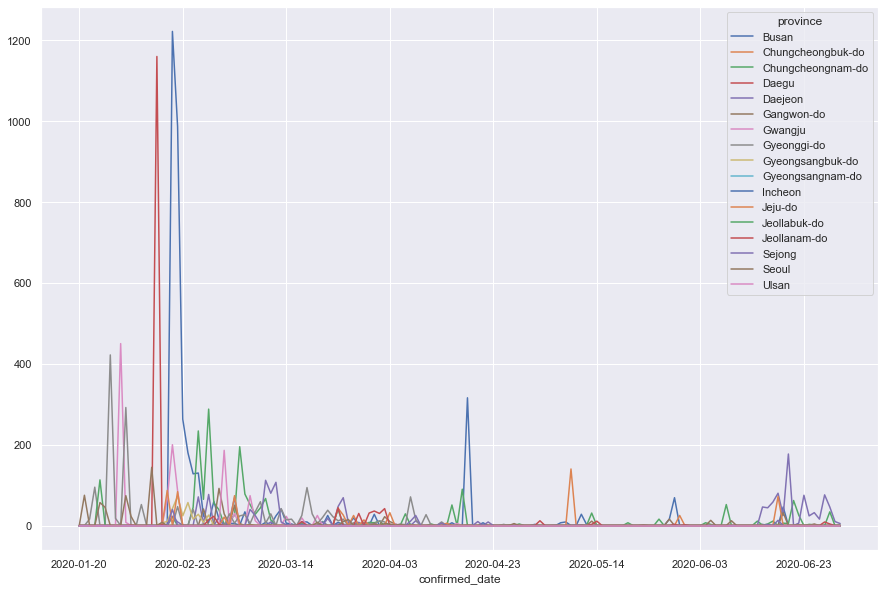

In [171]:
contact_df.plot(figsize=(15,10))

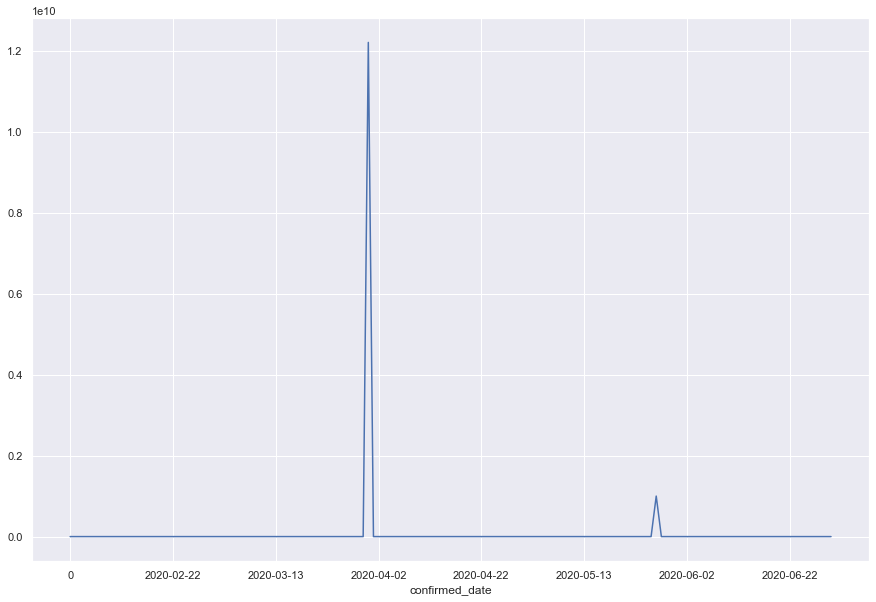

In [141]:
contact_df.plot(figsize=(15,10))

In [142]:
contact_df[contact_df>1e+8]

confirmed_date
2020-03-31    1.220000e+10
2020-05-27    1.000001e+09
Name: contact_number, dtype: float64

In [143]:
contact_df['2020-03-31']=0
contact_df['2020-05-27']=0

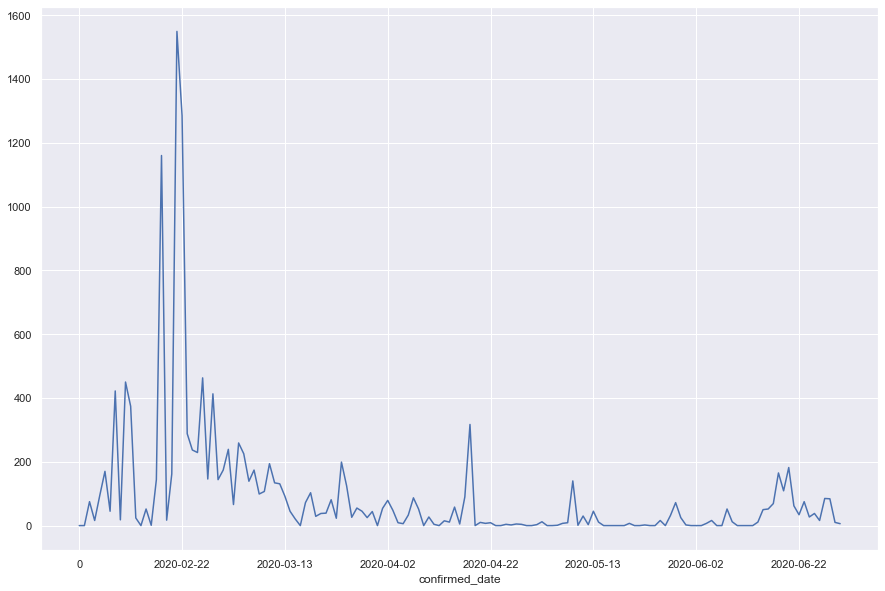

In [145]:
contact_df.plot(figsize=(15,10))

In [148]:
contact_df=contact_df[1:]

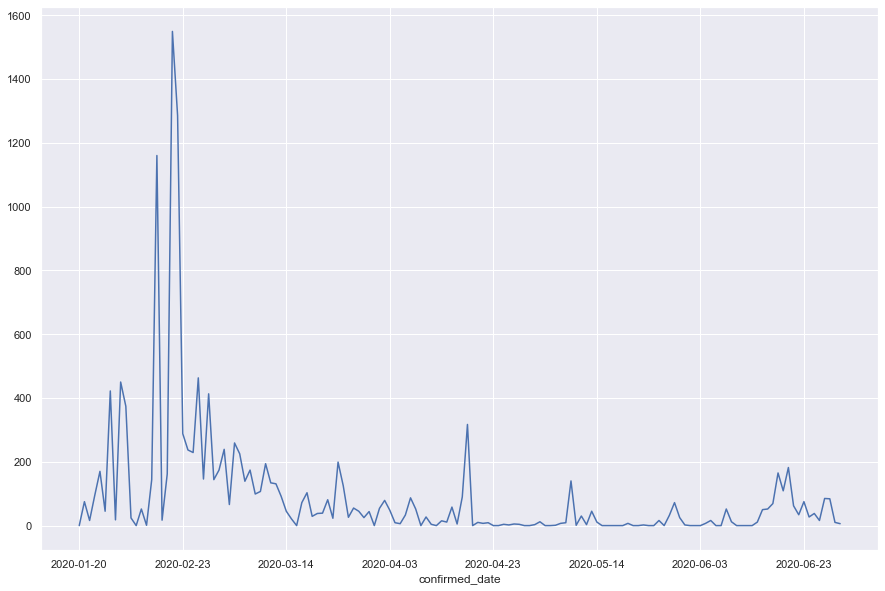

In [150]:
contact_df.plot(figsize=(15,10))

In [127]:
contact_df=contact_df.astype(int)

In [130]:
contact_df.drop(0,inplace=True)

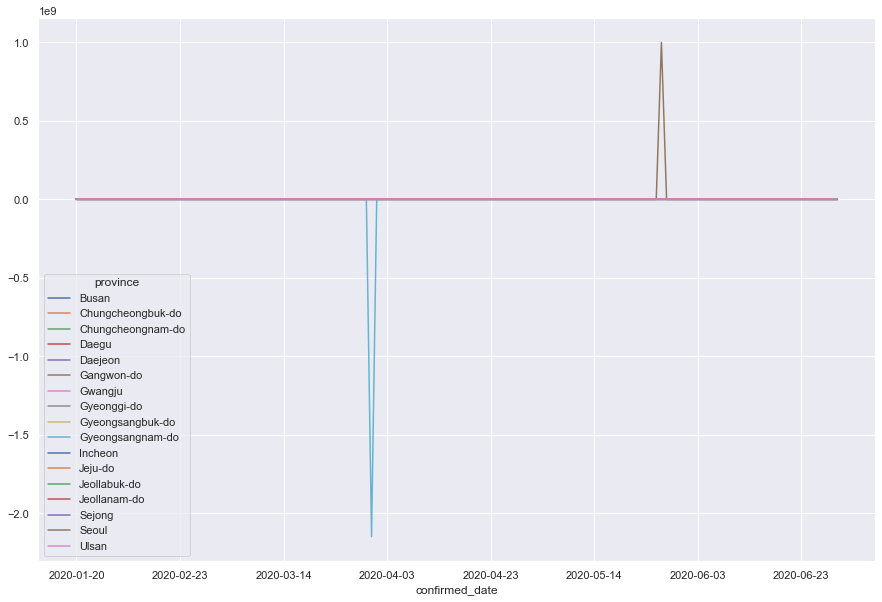

In [132]:
contact_df.plot(figsize=(15,10))

In [134]:
contact_df['Gyeongsangnam-do'].u

array([          0, -2147483648])

In [9]:
df_dict['PatientRoute'].head(1)

patient_id        date     province      city     type  latitude  longitude
0  1000000001  2020-01-22  Gyeonggi-do  Gimpo-si  airport  37.61525   126.7156

In [10]:
df_dict['Policy'].head(1)

policy_id country   type                      gov_policy          detail  \
0          1   Korea  Alert  Infectious Disease Alert Level  Level 1 (Blue)   

   start_date    end_date  
0  2020-01-03  2020-01-19

In [12]:
df_dict['Region'].head(1)

code province   city   latitude   longitude  elementary_school_count  \
0  10000    Seoul  Seoul  37.566953  126.977977                      607   

   kindergarten_count  university_count  academy_ratio  \
0                 830                48           1.44   

   elderly_population_ratio  elderly_alone_ratio  nursing_home_count  
0                     15.38                  5.8               22739

In [13]:
df_dict['SearchTrend'].head(1)

date     cold     flu  pneumonia  coronavirus
0  2016-01-01  0.11663  0.0559    0.15726      0.00736

In [19]:
df_dict['SeoulFloating'].sample(10)

date  hour  birth_year     sex province           city  fp_num
902959  2020-05-13    11          60    male    Seoul     Dongjag-gu   14810
959223  2020-05-15     7          40  female    Seoul    Gwangjin-gu   29770
571017  2020-03-01    16          20  female    Seoul   Seongdong-gu   23090
473942  2020-03-04     3          60  female    Seoul    Gwangjin-gu   17770
874618  2020-05-10     7          20  female    Seoul  Dongdaemun-gu   28550
809125  2020-04-27    17          60  female    Seoul     Gangnam-gu   33010
351693  2020-02-18     1          70    male    Seoul      Songpa-gu   17000
100416  2020-01-14    16          70  female    Seoul   Geumcheon-gu   11920
222240  2020-01-31     4          70  female    Seoul   Seongdong-gu   14930
817665  2020-04-24    17          30    male    Seoul   Yangcheon-gu   23640

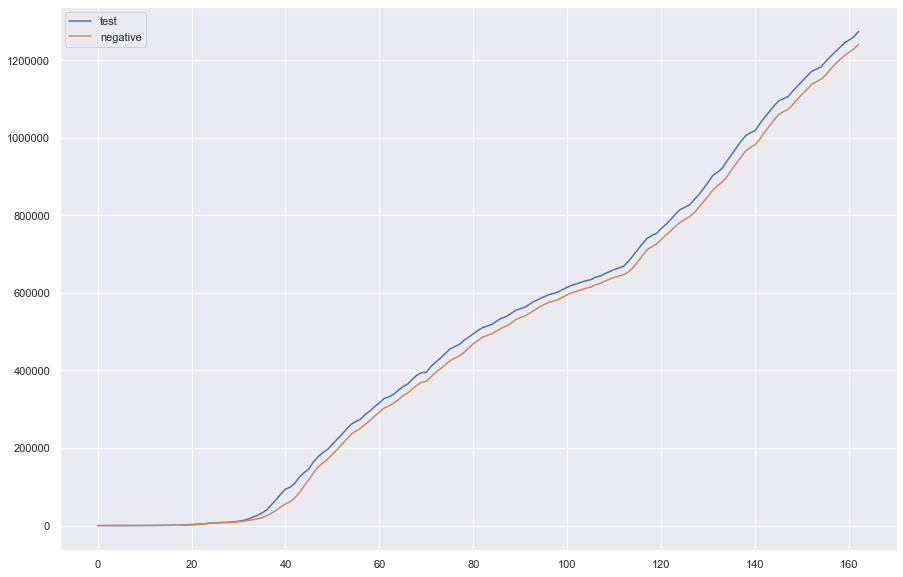

In [26]:
df_dict['Time'][['test','negative']].plot(figsize=(15,10))

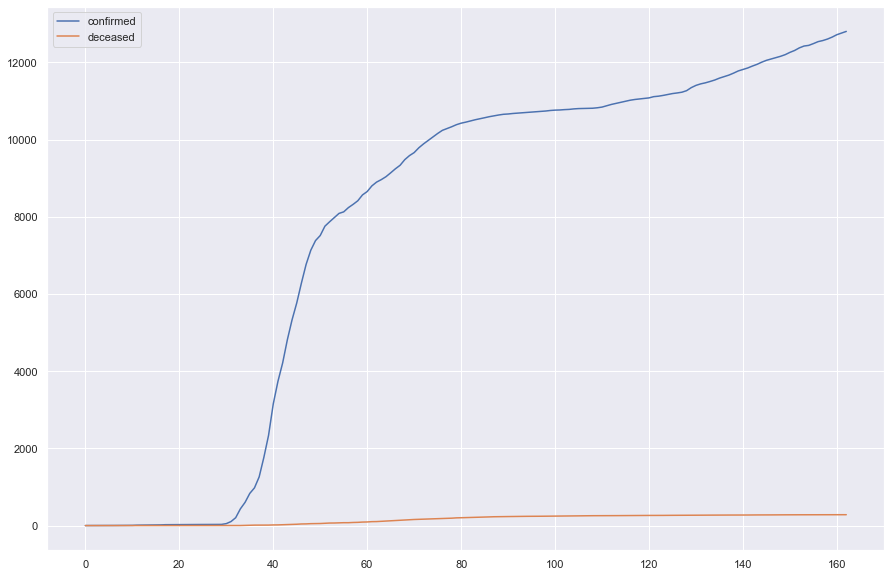

In [25]:
df_dict['Time'][['confirmed','deceased']].plot(figsize=(15,10))

In [31]:
time_df=df_dict['Time']

In [47]:
df_dict['Time']['confirmed']-df_dict['Time']['released']

0         1
1         1
2         1
3         1
4         2
       ... 
158    1430
159    1336
160    1351
161    1328
162    1263
Length: 163, dtype: int64

In [39]:
time_df.drop('time',inplace=True,axis=1)

In [40]:
time_df

date     test  negative  confirmed  released  deceased  rest
0    2020-01-20        1         0          1         0         0     1
1    2020-01-21        1         0          1         0         0     1
2    2020-01-22        4         3          1         0         0     1
3    2020-01-23       22        21          1         0         0     1
4    2020-01-24       27        25          2         0         0     2
..          ...      ...       ...        ...       ...       ...   ...
158  2020-06-26  1232315   1200885      12602     11172       282  1430
159  2020-06-27  1243780   1211261      12653     11317       282  1336
160  2020-06-28  1251695   1219975      12715     11364       282  1351
161  2020-06-29  1259954   1228698      12757     11429       282  1328
162  2020-06-30  1273766   1240157      12800     11537       282  1263

[163 rows x 7 columns]

In [43]:
date=time_df['date']

In [33]:
time_df['rest']=time_df['confirmed']-time_df['released']

In [44]:
time_df=time_df.drop('date',axis=1).diff(periods=1)[1:]

In [45]:
time_df['date']=date[1:]

In [48]:
time_df['rest']=df_dict['Time']['confirmed']-df_dict['Time']['released']

In [50]:
time_df

test  negative  confirmed  released  deceased  rest        date
1        0.0       0.0        0.0       0.0       0.0     1  2020-01-21
2        3.0       3.0        0.0       0.0       0.0     1  2020-01-22
3       18.0      18.0        0.0       0.0       0.0     1  2020-01-23
4        5.0       4.0        1.0       0.0       0.0     2  2020-01-24
5        0.0       0.0        0.0       0.0       0.0     2  2020-01-25
..       ...       ...        ...       ...       ...   ...         ...
158  11837.0   11870.0       39.0     198.0       0.0  1430  2020-06-26
159  11465.0   10376.0       51.0     145.0       0.0  1336  2020-06-27
160   7915.0    8714.0       62.0      47.0       0.0  1351  2020-06-28
161   8259.0    8723.0       42.0      65.0       0.0  1328  2020-06-29
162  13812.0   11459.0       43.0     108.0       0.0  1263  2020-06-30

[162 rows x 7 columns]

In [54]:
time_df['confirm_rate']=time_df['confirmed']/time_df['test']*100

In [57]:
time_df.fillna(0,inplace=True)

In [58]:
time_df

test  negative  confirmed  released  deceased  rest        date  \
1        0.0       0.0        0.0       0.0       0.0     1  2020-01-21   
2        3.0       3.0        0.0       0.0       0.0     1  2020-01-22   
3       18.0      18.0        0.0       0.0       0.0     1  2020-01-23   
4        5.0       4.0        1.0       0.0       0.0     2  2020-01-24   
5        0.0       0.0        0.0       0.0       0.0     2  2020-01-25   
..       ...       ...        ...       ...       ...   ...         ...   
158  11837.0   11870.0       39.0     198.0       0.0  1430  2020-06-26   
159  11465.0   10376.0       51.0     145.0       0.0  1336  2020-06-27   
160   7915.0    8714.0       62.0      47.0       0.0  1351  2020-06-28   
161   8259.0    8723.0       42.0      65.0       0.0  1328  2020-06-29   
162  13812.0   11459.0       43.0     108.0       0.0  1263  2020-06-30   

     confirm_rate  
1        0.000000  
2        0.000000  
3        0.000000  
4       20.000000  
5        0.000000  
..            ...  
158      0.329475  
159      0.444832  
160      0.783323  
161      0.508536  
162      0.311323  

[162 rows x 8 columns]

In [69]:
province_df=df_dict['TimeProvince']

In [60]:
province_df

date  time          province  confirmed  released  deceased
0     2020-01-20    16             Seoul          0         0         0
1     2020-01-20    16             Busan          0         0         0
2     2020-01-20    16             Daegu          0         0         0
3     2020-01-20    16           Incheon          1         0         0
4     2020-01-20    16           Gwangju          0         0         0
...          ...   ...               ...        ...       ...       ...
2766  2020-06-30     0      Jeollabuk-do         27        21         0
2767  2020-06-30     0      Jeollanam-do         24        19         0
2768  2020-06-30     0  Gyeongsangbuk-do       1389      1328        54
2769  2020-06-30     0  Gyeongsangnam-do        134       128         0
2770  2020-06-30     0           Jeju-do         19        16         0

[2771 rows x 6 columns]

In [70]:
province_confirmed=province_df.groupby(['date','province'])['confirmed'].sum().unstack()

In [74]:
province_confirmed=province_confirmed.diff(periods=1)[1:]

In [75]:
province_confirmed

province    Busan  Chungcheongbuk-do  Chungcheongnam-do  Daegu  Daejeon  \
date                                                                      
2020-01-21    0.0                0.0                0.0    0.0      0.0   
2020-01-22    0.0                0.0                0.0    0.0      0.0   
2020-01-23    0.0                0.0                0.0    0.0      0.0   
2020-01-24    0.0                0.0                0.0    0.0      0.0   
2020-01-25    0.0                0.0                0.0    0.0      0.0   
...           ...                ...                ...    ...      ...   
2020-06-26    0.0                0.0                3.0    0.0      4.0   
2020-06-27    0.0                1.0                0.0    1.0      2.0   
2020-06-28    0.0                1.0                1.0    0.0      6.0   
2020-06-29    1.0                0.0                0.0    2.0      2.0   
2020-06-30    1.0                1.0                0.0    0.0      5.0   

province    Gangwon-do  Gwangju  Gyeonggi-do  Gyeongsangbuk-do  \
date                                                             
2020-01-21         0.0      0.0          0.0               0.0   
2020-01-22         0.0      0.0          0.0               0.0   
2020-01-23         0.0      0.0          0.0               0.0   
2020-01-24         0.0      0.0          1.0               0.0   
2020-01-25         0.0      0.0          0.0               0.0   
...                ...      ...          ...               ...   
2020-06-26         1.0      0.0          4.0               1.0   
2020-06-27         0.0      0.0         17.0               0.0   
2020-06-28         0.0      4.0         17.0               0.0   
2020-06-29         0.0      4.0         16.0               1.0   
2020-06-30         1.0      3.0          7.0               1.0   

province    Gyeongsangnam-do  Incheon  Jeju-do  Jeollabuk-do  Jeollanam-do  \
date                                                                         
2020-01-21               0.0      0.0      0.0           0.0           0.0   
2020-01-22               0.0      0.0      0.0           0.0           0.0   
2020-01-23               0.0      0.0      0.0           0.0           0.0   
2020-01-24               0.0      0.0      0.0           0.0           0.0   
2020-01-25               0.0      0.0      0.0           0.0           0.0   
...                      ...      ...      ...           ...           ...   
2020-06-26               0.0      2.0      0.0           0.0           0.0   
2020-06-27               0.0      1.0      0.0           1.0           0.0   
2020-06-28               0.0      0.0      0.0           0.0           3.0   
2020-06-29               1.0      1.0      0.0           1.0           1.0   
2020-06-30               0.0      3.0      0.0           0.0           0.0   

province    Sejong  Seoul  Ulsan  
date                              
2020-01-21     0.0    0.0    0.0  
2020-01-22     0.0    0.0    0.0  
2020-01-23     0.0    0.0    0.0  
2020-01-24     0.0    0.0    0.0  
2020-01-25     0.0    0.0    0.0  
...            ...    ...    ...  
2020-06-26     0.0   17.0    0.0  
2020-06-27     0.0   17.0    0.0  
2020-06-28     0.0   14.0    0.0  
2020-06-29     0.0    7.0    0.0  
2020-06-30     1.0    7.0    0.0  

[162 rows x 17 columns]

In [66]:
province_released=province_df.groupby(['date','province'])['released'].sum().unstack()

In [67]:
province_rest=province_confirmed-province_released

In [68]:
province_rest

province    Busan  Chungcheongbuk-do  Chungcheongnam-do  Daegu  Daejeon  \
date                                                                      
2020-01-20      0                  0                  0      0        0   
2020-01-21      0                  0                  0      0        0   
2020-01-22      0                  0                  0      0        0   
2020-01-23      0                  0                  0      0        0   
2020-01-24      0                  0                  0      0        0   
...           ...                ...                ...    ...      ...   
2020-06-26     10                  2                 18    208       58   
2020-06-27     10                  3                 18    204       60   
2020-06-28      9                  4                 19    204       66   
2020-06-29     10                  4                 17    206       68   
2020-06-30     12                  5                 17    206       73   

province    Gangwon-do  Gwangju  Gyeonggi-do  Gyeongsangbuk-do  \
date                                                             
2020-01-20           0        0            0                 0   
2020-01-21           0        0            0                 0   
2020-01-22           0        0            0                 0   
2020-01-23           0        0            0                 0   
2020-01-24           0        0            1                 0   
...                ...      ...          ...               ...   
2020-06-26          12        1          336                60   
2020-06-27          12        1          309                59   
2020-06-28          11        5          311                59   
2020-06-29          10        9          312                60   
2020-06-30          11       12          276                61   

province    Gyeongsangnam-do  Incheon  Jeju-do  Jeollabuk-do  Jeollanam-do  \
date                                                                         
2020-01-20                 0        1        0             0             0   
2020-01-21                 0        1        0             0             0   
2020-01-22                 0        1        0             0             0   
2020-01-23                 0        1        0             0             0   
2020-01-24                 0        1        0             0             0   
...                      ...      ...      ...           ...           ...   
2020-06-26                 8      105        3             5             2   
2020-06-27                 5       87        3             6             1   
2020-06-28                 5       73        3             5             4   
2020-06-29                 6       54        3             6             5   
2020-06-30                 6       51        3             6             5   

province    Sejong  Seoul  Ulsan  
date                              
2020-01-20       0      0      0  
2020-01-21       0      0      0  
2020-01-22       0      0      0  
2020-01-23       0      0      0  
2020-01-24       0      0      0  
...            ...    ...    ...  
2020-06-26       2    424      6  
2020-06-27       2    373      5  
2020-06-28       2    375      5  
2020-06-29       2    363      5  
2020-06-30       3    327      5  

[163 rows x 17 columns]

In [70]:
province_population=[9560112,1586797,2104381,2411618,1461848,1525303,1446830,13212180,2632262,3332290,2922556,665323,1798594,1843725,344239,9560112,1137336]

In [79]:
province_rest=province_rest/province_population*1000000

In [90]:
province_rest['date']=province_rest.index

In [94]:
province_rest.reset_index(drop=True,inplace=True)

In [34]:
import requests

In [39]:
req=requests.get('https://8oi9s0nnth.apigw.ntruss.com/corona19-masks/v1/sales/json')

In [55]:
data = requests.get("https://8oi9s0nnth.apigw.ntruss.com/corona19-masks/v1/storesByAddr/json",params ={
    'address':'서울특별시'
})

In [56]:
print(data.content)

b'{"error":{"errorCode":"300","message":"Not Found Exception","details":"URL not found."}}'


In [162]:
X_data[X_data.columns[4:21]]=X_data[X_data.columns[4:21]]*10000

In [372]:
rest_rate=X_data.columns[4:21]
contact_number=X_data.columns[23:]

NameError: name 'X_data' is not defined

In [149]:
regions=contact_df.columns

In [163]:
X_dict=dict()
for i in range(len(rest_rate)):
    X_dict[regions[i]]=X_data[[rest_rate[i],contact_number[i],'SD','Mask','TransMask','Quaratine','Shutdown(karaoke)','Shutdown(bar_and_club)']]

In [172]:
X_dict['Busan'][:112]

Busan_rest_rate  Busan_contact_num        SD  Mask  TransMask  \
date                                                                        
2020-01-21         0.000000                0.0  0.000000   0.0        0.0   
2020-01-22         0.000000                0.0  0.000000   0.0        0.0   
2020-01-23         0.000000                0.0  0.000000   0.0        0.0   
2020-01-24         0.000000                0.0  0.000000   0.0        0.0   
2020-01-25         0.000000                0.0  0.000000   0.0        0.0   
...                     ...                ...       ...   ...        ...   
2020-05-07         1.882823                7.0  0.784615   1.0        0.0   
2020-05-08         1.778222                9.0  0.730769   1.0        0.0   
2020-05-09         1.673621                0.0  0.676923   1.0        0.0   
2020-05-10         1.673621                0.0  0.623077   1.0        0.0   
2020-05-11         1.673621               28.0  0.569231   1.0        0.0   

            Quaratine  Shutdown(karaoke)  Shutdown(bar_and_club)  
date                                                              
2020-01-21        0.0                0.0                     0.0  
2020-01-22        0.0                0.0                     0.0  
2020-01-23        0.0                0.0                     0.0  
2020-01-24        0.0                0.0                     0.0  
2020-01-25        0.0                0.0                     0.0  
...               ...                ...                     ...  
2020-05-07        1.0                0.0                     0.0  
2020-05-08        1.0                0.0                     0.0  
2020-05-09        1.0                0.0                     0.0  
2020-05-10        1.0                0.0                     0.0  
2020-05-11        1.0                0.0                     0.0  

[112 rows x 8 columns]

In [171]:
province_confirmed['Busan'][5:117]

date
2020-01-26    0.0
2020-01-27    0.0
2020-01-28    0.0
2020-01-29    0.0
2020-01-30    0.0
             ... 
2020-05-12    0.0
2020-05-13    3.0
2020-05-14    0.0
2020-05-15    0.0
2020-05-16    0.0
Name: Busan, Length: 112, dtype: float64

In [165]:
from statsmodels.regression.linear_model import OLS

In [173]:
model1=OLS(X_dict['Busan'][:112].values,province_confirmed['Busan'][5:117].values)

In [176]:
fitted_model=model1.fit()

In [177]:
fitted_model.summary()

ValueError: shapes (112,8) and (112,8) not aligned: 8 (dim 1) != 112 (dim 0)

In [178]:
from sklearn.linear_model import LinearRegression

In [185]:
model1=LinearRegression()

In [186]:
model1.fit(X_dict['Busan'][:112],province_confirmed['Busan'][5:117])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [187]:
model1.score(X_dict['Busan'][112:-5],province_confirmed['Busan'][117:])

-0.025236892958096613

In [188]:
model1.predict(X_dict['Busan'][112:-5])

array([0.33913711, 0.38617763, 0.36898792, 0.38114597, 0.30526074,
       0.30526074, 0.30526074, 0.30526074, 0.27591299, 0.27591299,
       0.27591299, 0.27591299, 0.27591299, 0.27591299, 0.27591299,
       0.15852196, 0.28552485, 0.70622194, 0.1291742 , 0.15852196,
       0.15852196, 0.15852196, 0.15852196, 0.15852196, 0.15852196,
       0.1291742 , 0.09982645, 0.07047869, 0.07047869, 0.07047869,
       0.07047869, 0.07047869, 0.04113093, 0.04113093, 0.06494397,
       0.07047869, 0.07047869, 0.07047869, 0.43561201, 0.1291742 ,
       0.1291742 , 0.1291742 , 0.1291742 , 0.18786972, 0.18786972])

In [198]:
y_pred.cumsum()

array([0.33913711, 0.72531475, 1.09430267, 1.47544864, 1.78070938,
       2.08597012, 2.39123087, 2.69649161, 2.9724046 , 3.24831758,
       3.52423057, 3.80014356, 4.07605654, 4.35196953, 4.62788252,
       4.78640448, 5.07192933, 5.77815128, 5.90732548, 6.06584744,
       6.2243694 , 6.38289135, 6.54141331, 6.69993527, 6.85845723,
       6.98763143, 7.08745788, 7.15793657, 7.22841526, 7.29889394,
       7.36937263, 7.43985132, 7.48098225, 7.52211318, 7.58705716,
       7.65753585, 7.72801454, 7.79849322, 8.23410524, 8.36327944,
       8.49245364, 8.62162784, 8.75080204, 8.93867176, 9.12654148])

In [192]:
y_pred=model1.predict(X_dict['Busan'][112:-5])

In [191]:
from sklearn.metrics import mean_squared_error

In [194]:
mean_squared_error(y_pred,province_confirmed['Busan'][117:])

0.2683336065519957

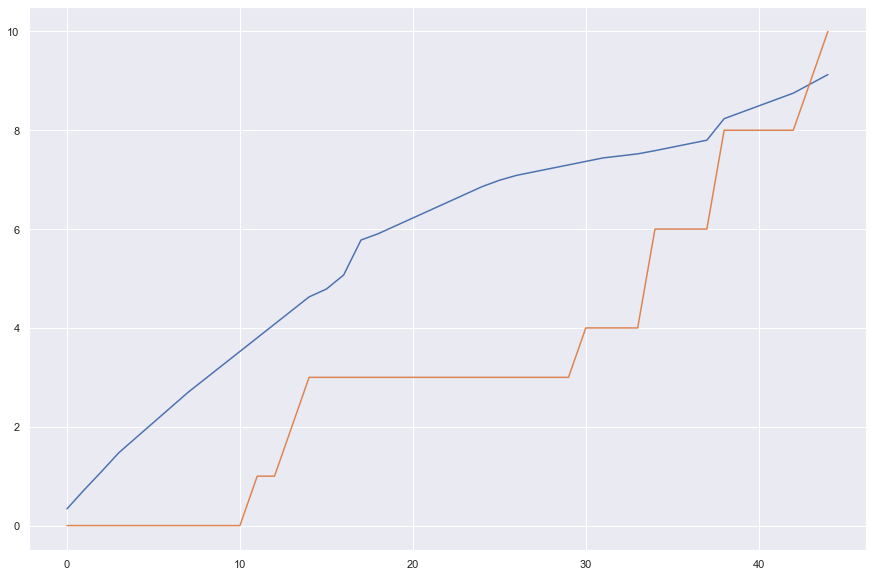

In [199]:
plt.figure(figsize=(15,10))
plt.plot(range(len(y_pred)),y_pred.cumsum())
plt.plot(range(len(y_pred)),province_confirmed['Busan'][117:].cumsum())

In [205]:
regions=list(X_dict.keys())

In [203]:
len(regions)

17

In [357]:
X_dict['Busan']

Busan_rest_rate  Busan_contact_num   SD  Mask  TransMask  \
date                                                                   
2020-01-21         0.000000                0.0  0.0   0.0        0.0   
2020-01-22         0.000000                0.0  0.0   0.0        0.0   
2020-01-23         0.000000                0.0  0.0   0.0        0.0   
2020-01-24         0.000000                0.0  0.0   0.0        0.0   
2020-01-25         0.000000                0.0  0.0   0.0        0.0   
...                     ...                ...  ...   ...        ...   
2020-06-26         1.046013                0.0  0.3   1.0        1.0   
2020-06-27         1.046013                0.0  0.3   1.0        1.0   
2020-06-28         0.941412                0.0  0.3   1.0        1.0   
2020-06-29         1.046013                0.0  0.3   1.0        1.0   
2020-06-30         1.255215                0.0  0.3   1.0        1.0   

            Quaratine  Shutdown(karaoke)  Shutdown(bar_and_club)  
date                                                              
2020-01-21        0.0                0.0                     0.0  
2020-01-22        0.0                0.0                     0.0  
2020-01-23        0.0                0.0                     0.0  
2020-01-24        0.0                0.0                     0.0  
2020-01-25        0.0                0.0                     0.0  
...               ...                ...                     ...  
2020-06-26        1.0                0.0                     0.0  
2020-06-27        1.0                0.0                     0.0  
2020-06-28        1.0                0.0                     0.0  
2020-06-29        1.0                0.0                     0.0  
2020-06-30        1.0                0.0                     0.0  

[162 rows x 8 columns]

In [373]:
# 선형 회귀
y_dict=dict()
score=[]
for reg in regions:
    model=LinearRegression()
    model.fit(X_dict[reg][:112],province_confirmed[reg][5:117])
    y_pred=model1.predict(X_dict[reg][112:-5])
    y_dict[reg]=y_pred
    print('{}'.format(reg),mean_squared_error(y_pred,province_confirmed[reg][117:]))
    score.append(mean_squared_error(y_pred,province_confirmed[reg][117:]))
print('score_mean : ',np.mean(score))

Busan 0.2683336065519957
Chungcheongbuk-do 3.2836885723208287
Chungcheongnam-do 0.8346139673282873
Daegu 1383.2580654348255
Daejeon 8.097335507606896
Gangwon-do 1.792251680954384
Gwangju 1.030456564077162
Gyeonggi-do 68.69682443216165
Gyeongsangbuk-do 78.57011055017946
Gyeongsangnam-do 0.5503519060861063
Incheon 105.12586127379076
Jeju-do 0.946957002716763
Jeollabuk-do 0.16694106937217967
Jeollanam-do 0.3368734173833617
Sejong 0.39072782714192855
Seoul 78.43016381838859
Ulsan 2.1421510691707164
score_mean :  101.99539457059156


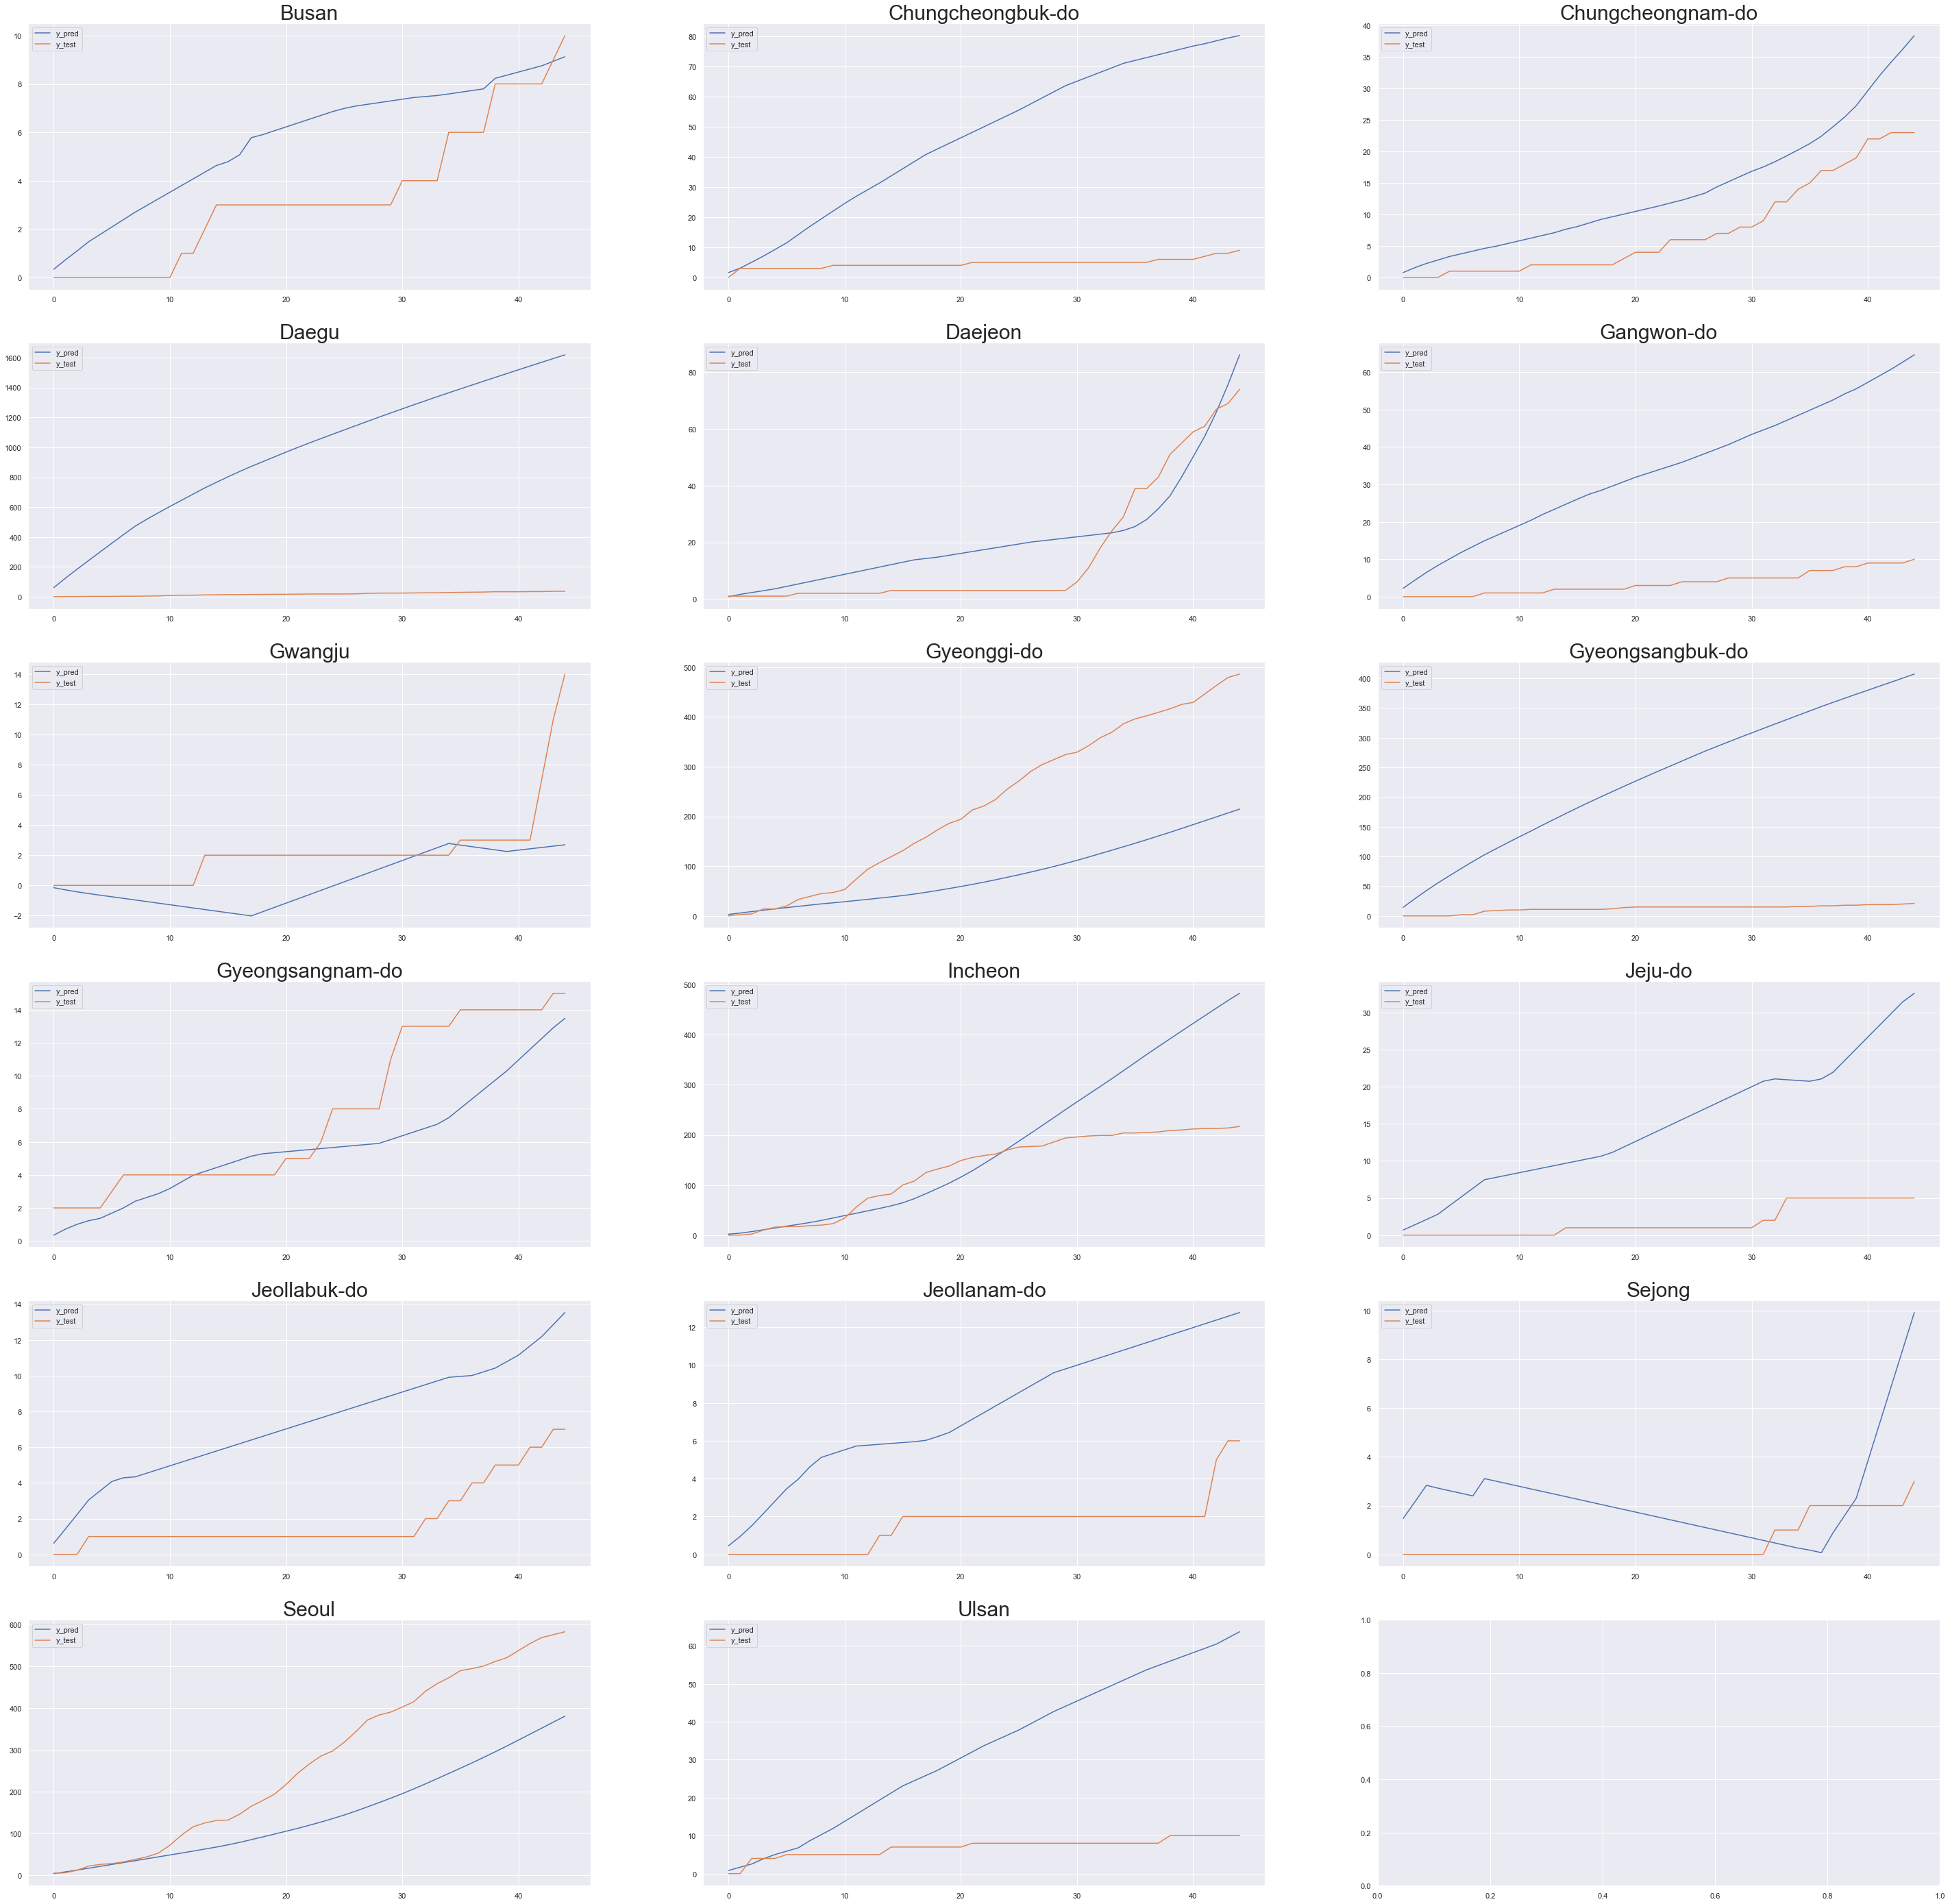

In [374]:
fig,ax=plt.subplots(6,3,figsize=(50,50))
for i in range(len(regions)):
    ax[i//3,i%3].set_title(regions[i],fontsize=30)
    ax[i//3,i%3].plot(range(len(y_dict[regions[i]])),y_dict[regions[i]].cumsum(),label='y_pred')
    ax[i//3,i%3].plot(range(len(y_dict[regions[i]])),province_confirmed[regions[i]][117:].cumsum(),label='y_test')
    ax[i//3,i%3].legend()

In [219]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [231]:
# 서포트벡터 회귀
y_dict=dict()
score=[]
for reg in regions:
    model=SVR()
    model.fit(X_dict[reg][:112],province_confirmed[reg][5:117])
    y_pred=model1.predict(X_dict[reg][112:-5])
    y_dict[reg]=y_pred
    print('{}'.format(reg),mean_squared_error(y_pred,province_confirmed[reg][117:]))
    score.append(mean_squared_error(y_pred,province_confirmed[reg][117:]))
print('score_mean : ',np.mean(score))

Busan 0.2683336065519957
Chungcheongbuk-do 3.2836885723208287
Chungcheongnam-do 0.8346139673282873
Daegu 1383.2580654348255
Daejeon 8.097335507606896
Gangwon-do 1.792251680954384
Gwangju 1.030456564077162
Gyeonggi-do 68.69682443216165
Gyeongsangbuk-do 78.57011055017946
Gyeongsangnam-do 0.5503519060861063
Incheon 105.12586127379076
Jeju-do 0.946957002716763
Jeollabuk-do 0.16694106937217967
Jeollanam-do 0.3368734173833617
Sejong 0.39072782714192855
Seoul 78.43016381838859
Ulsan 2.1421510691707164
score_mean :  101.99539457059156


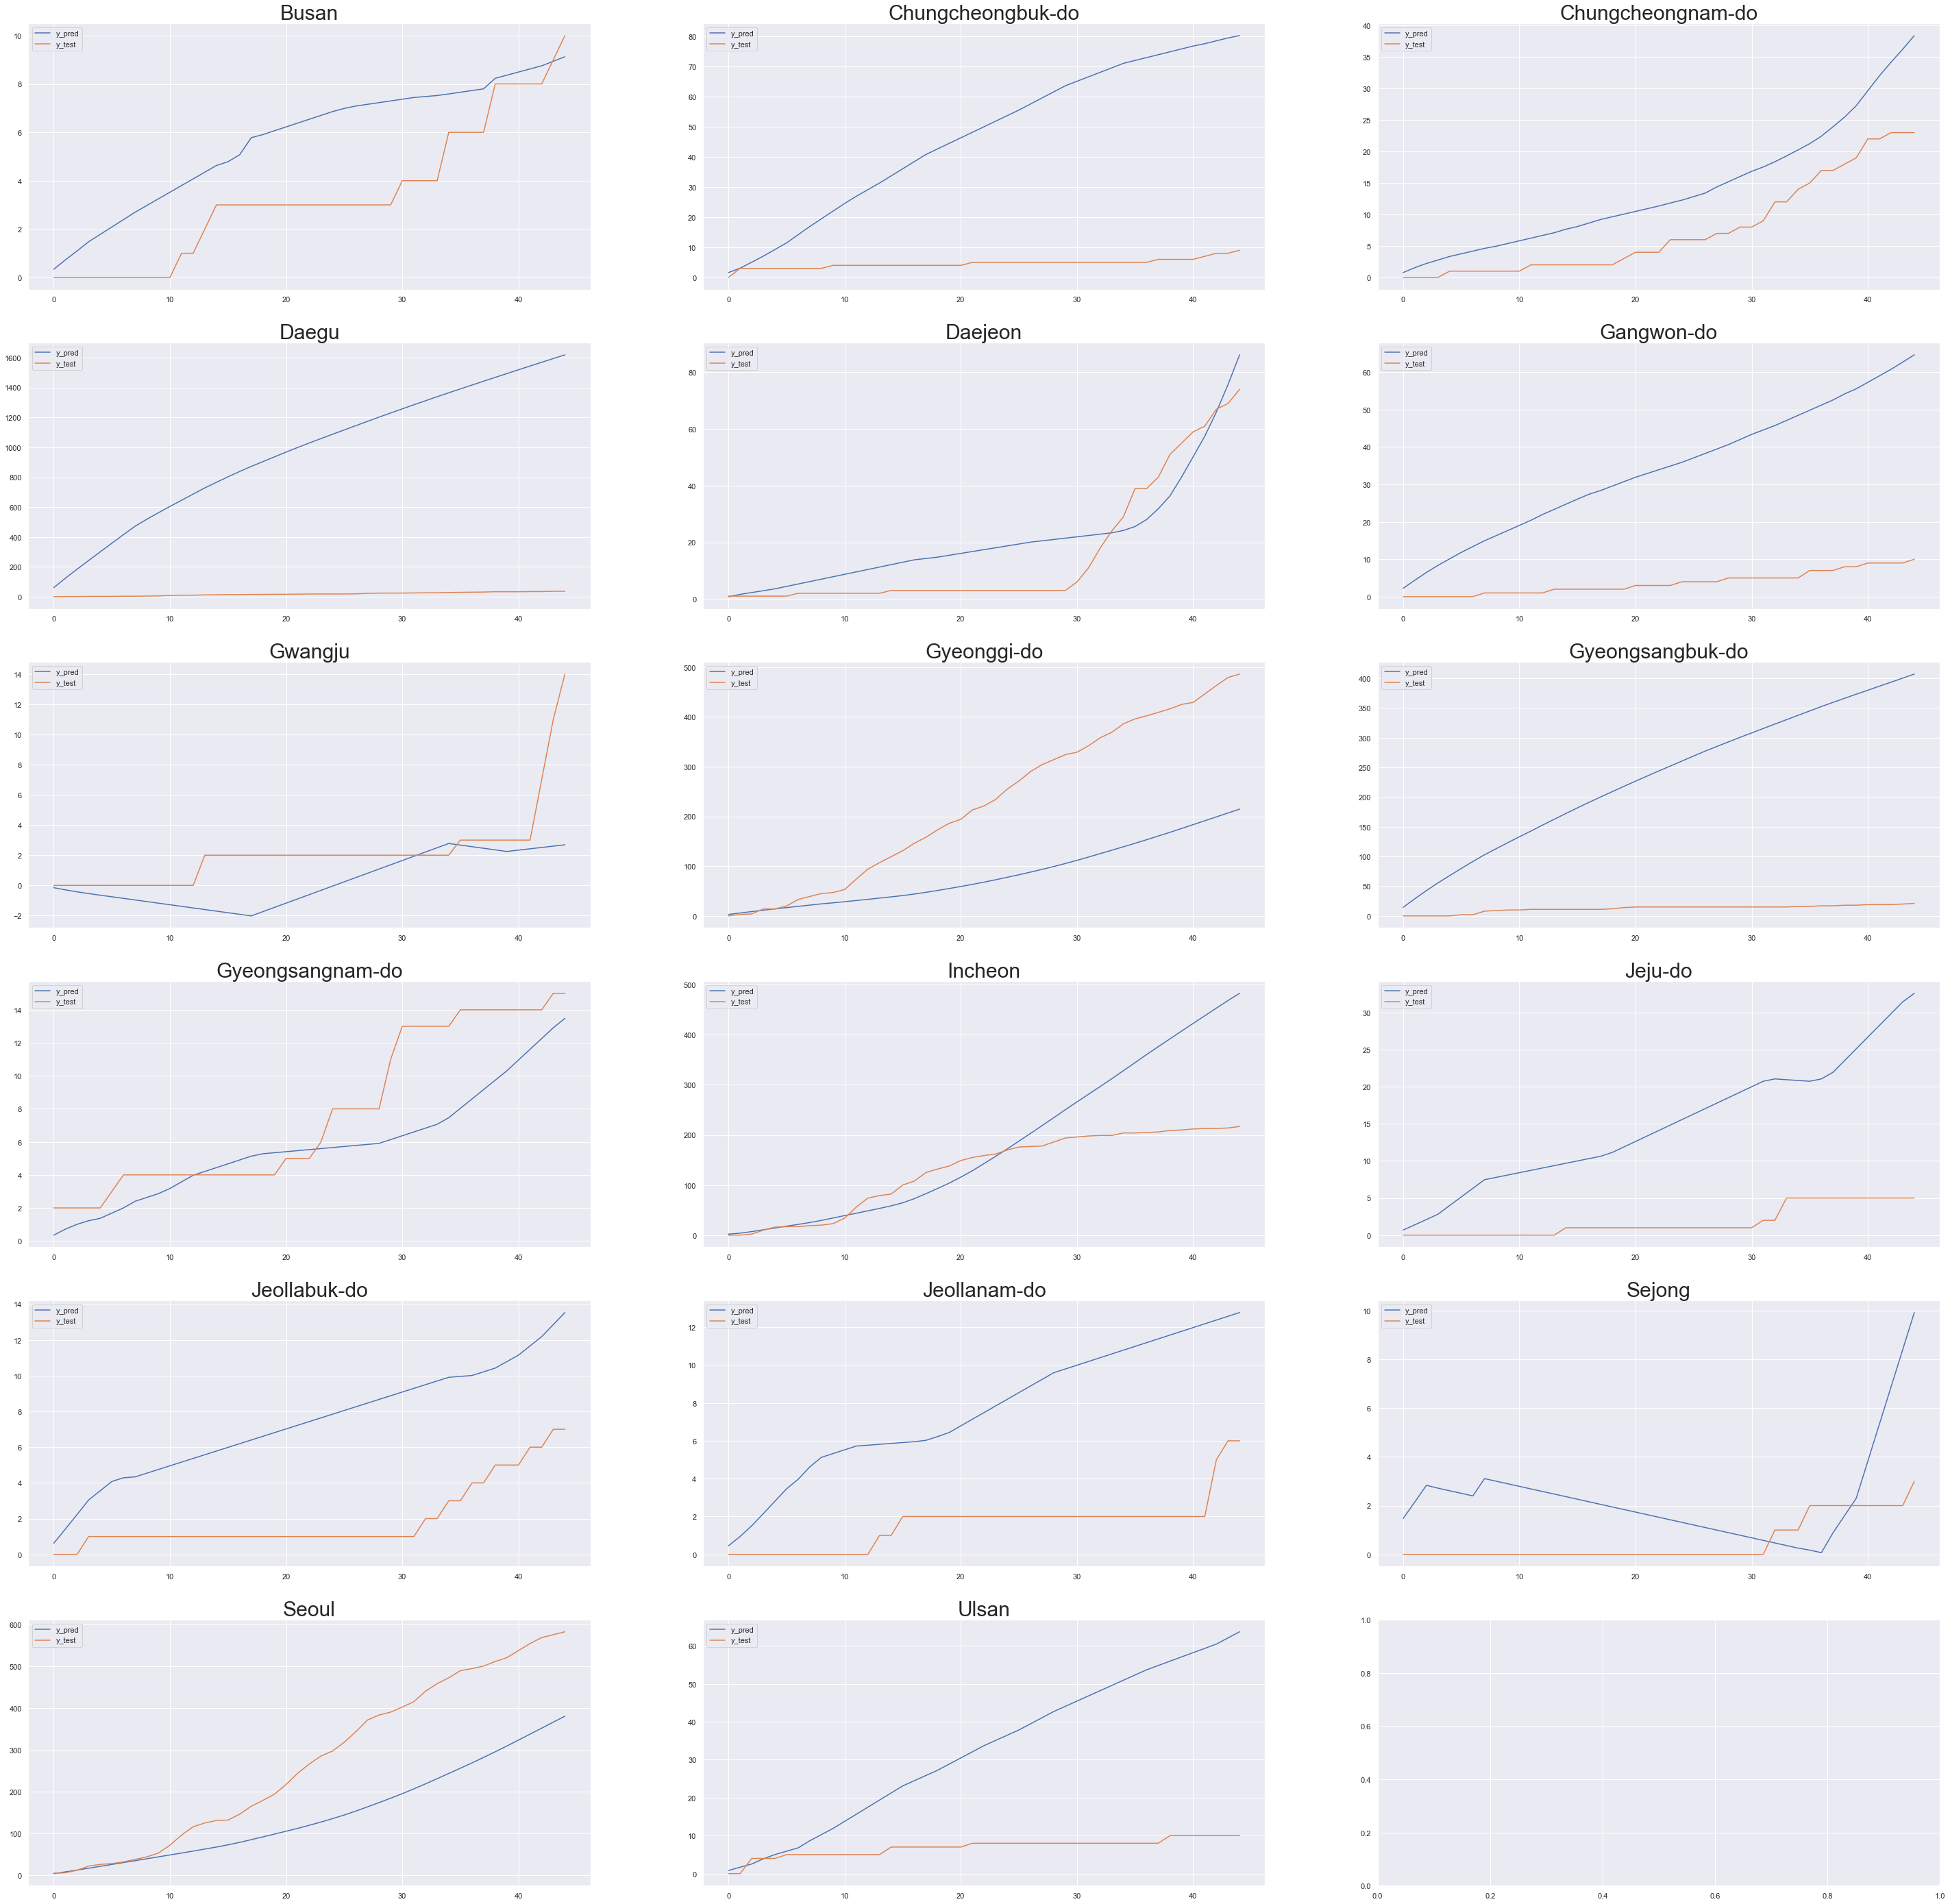

In [221]:
fig,ax=plt.subplots(6,3,figsize=(50,50))
for i in range(len(regions)):
    ax[i//3,i%3].set_title(regions[i],fontsize=30)
    ax[i//3,i%3].plot(range(len(y_dict[regions[i]])),y_dict[regions[i]].cumsum(),label='y_pred')
    ax[i//3,i%3].plot(range(len(y_dict[regions[i]])),province_confirmed[regions[i]][117:].cumsum(),label='y_test')
    ax[i//3,i%3].legend()

In [232]:
# 랜덤포레스트 회귀
y_dict=dict()
score=[]
for reg in regions:
    model=RandomForestRegressor()
    model.fit(X_dict[reg][:112],province_confirmed[reg][5:117])
    y_pred=model1.predict(X_dict[reg][112:-5])
    y_dict[reg]=y_pred
    print('{}'.format(reg),mean_squared_error(y_pred,province_confirmed[reg][117:]))
    score.append(mean_squared_error(y_pred,province_confirmed[reg][117:]))
print('score_mean : ',np.mean(score))

Busan 0.2683336065519957
Chungcheongbuk-do 3.2836885723208287
Chungcheongnam-do 0.8346139673282873
Daegu 1383.2580654348255
Daejeon 8.097335507606896
Gangwon-do 1.792251680954384
Gwangju 1.030456564077162
Gyeonggi-do 68.69682443216165
Gyeongsangbuk-do 78.57011055017946
Gyeongsangnam-do 0.5503519060861063
Incheon 105.12586127379076
Jeju-do 0.946957002716763
Jeollabuk-do 0.16694106937217967
Jeollanam-do 0.3368734173833617
Sejong 0.39072782714192855
Seoul 78.43016381838859
Ulsan 2.1421510691707164
score_mean :  101.99539457059156


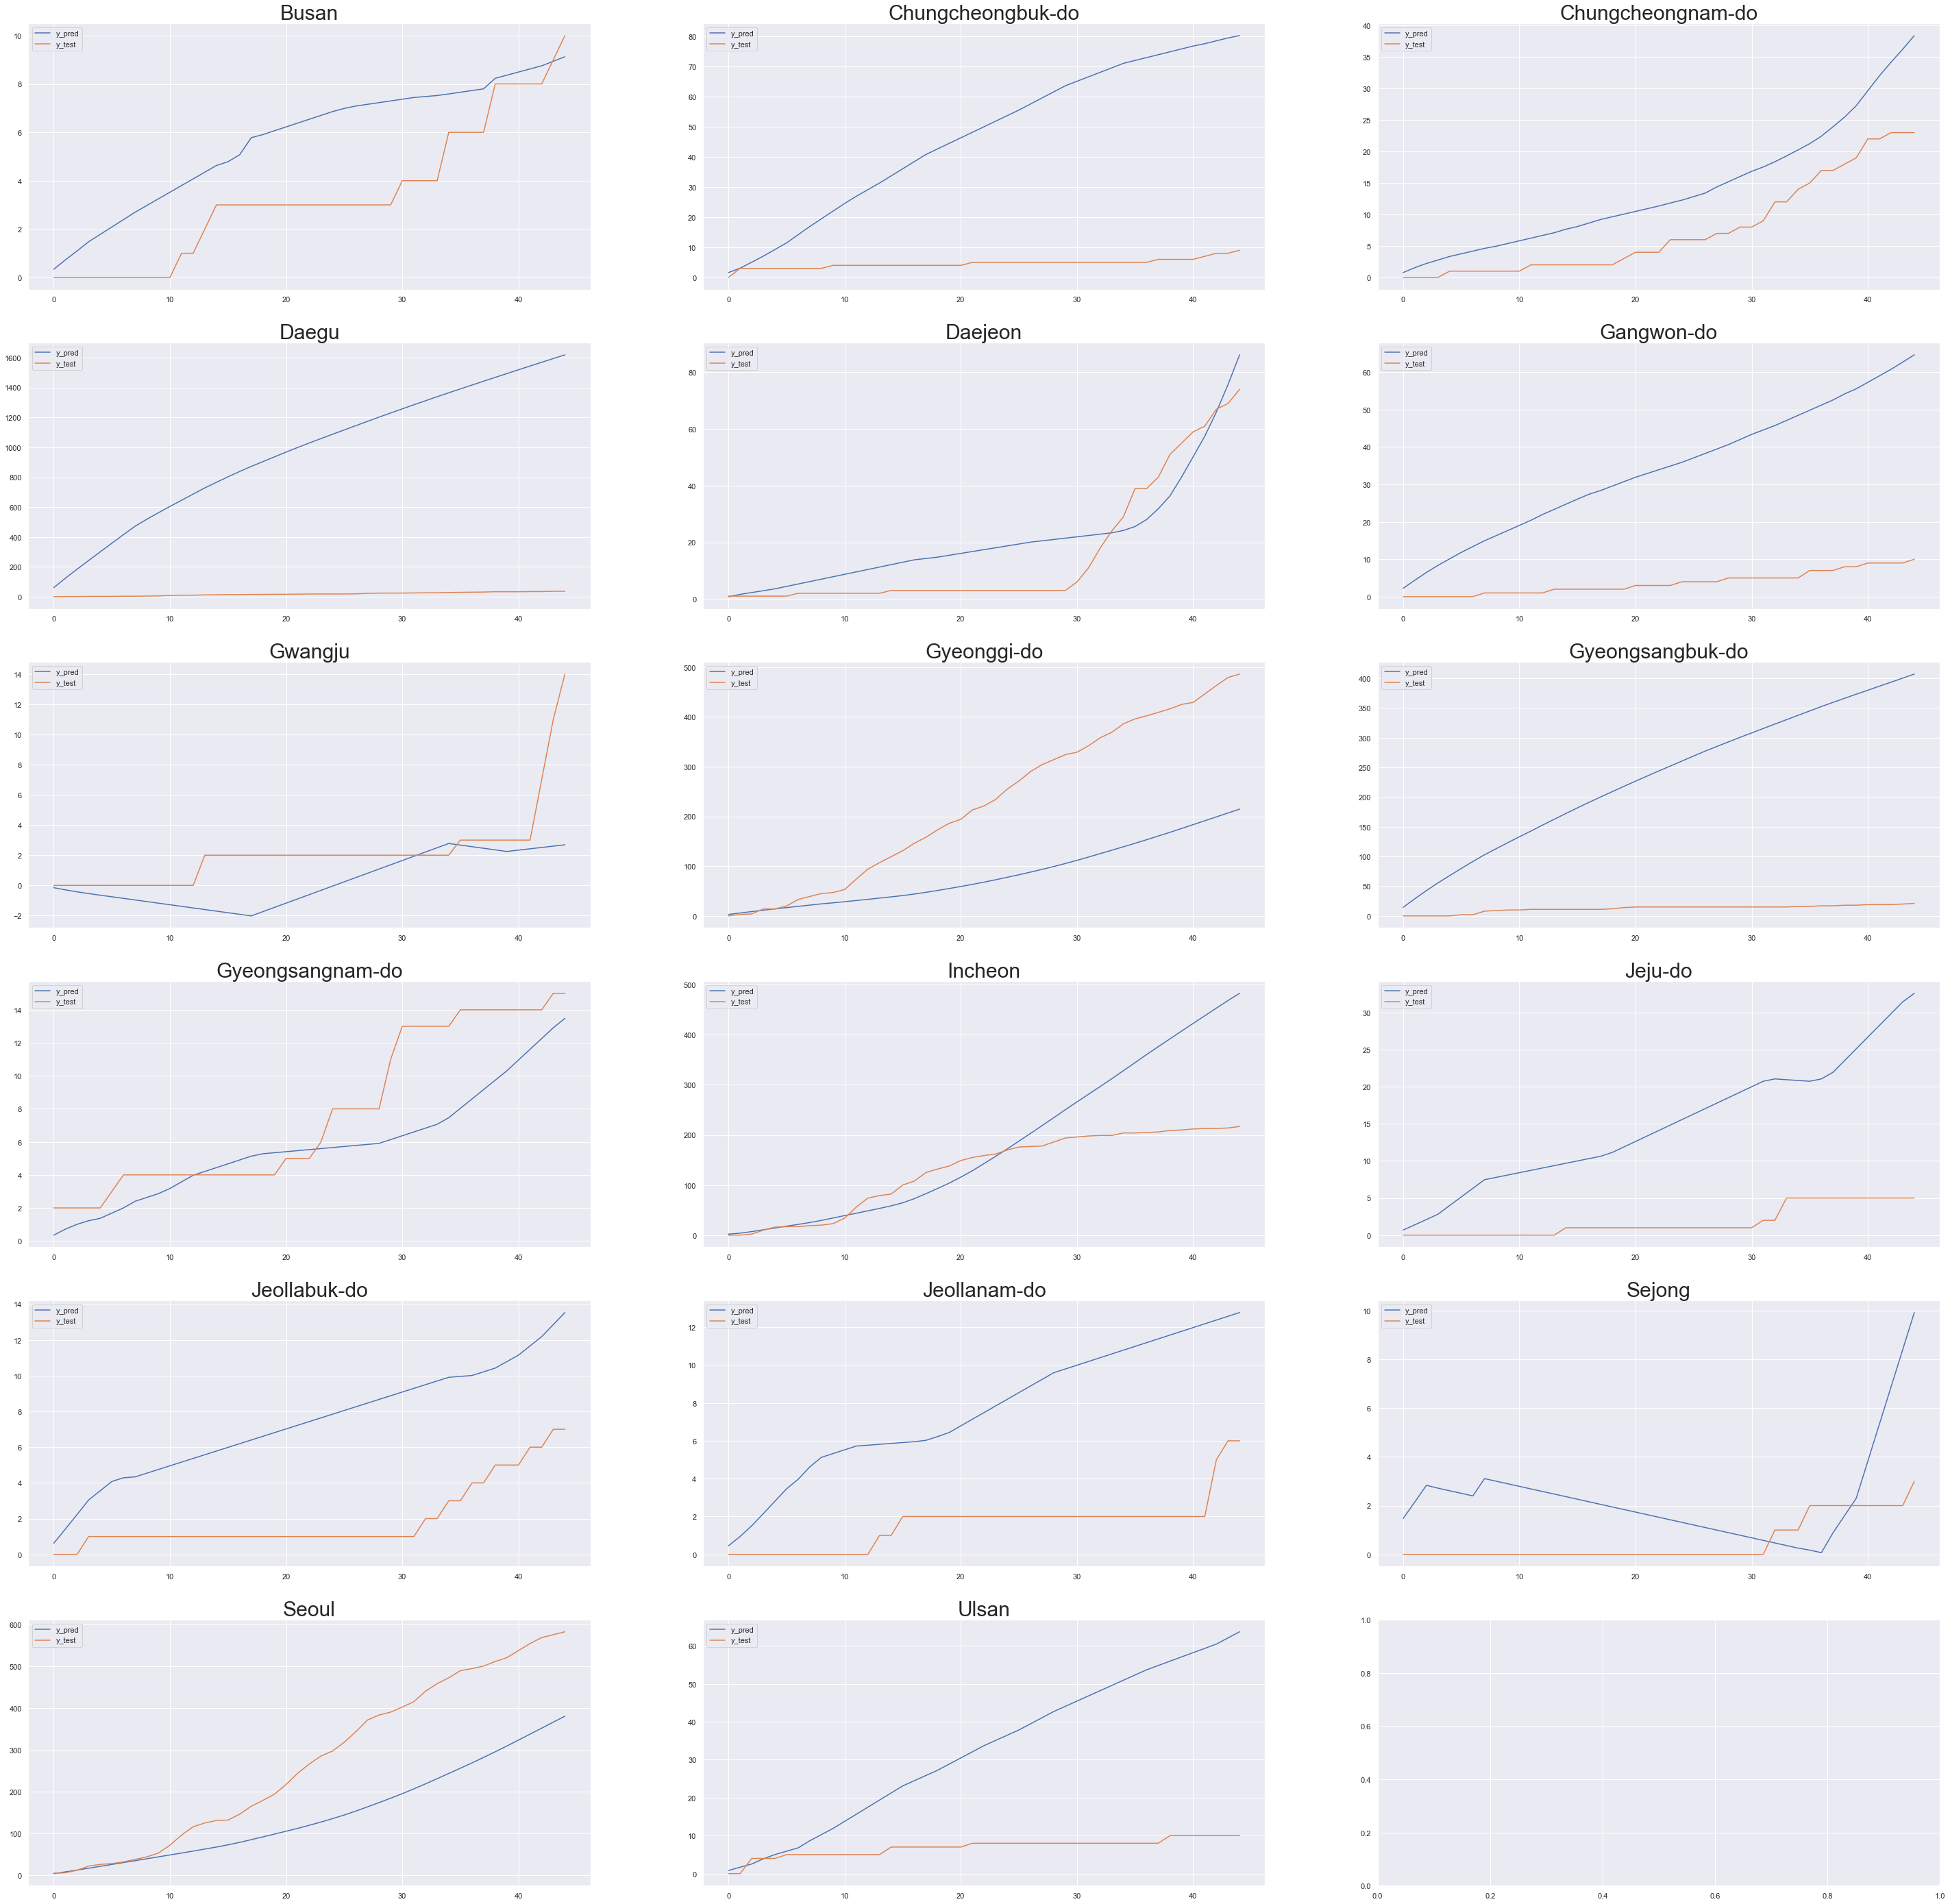

In [229]:
fig,ax=plt.subplots(6,3,figsize=(50,50))
for i in range(len(regions)):
    ax[i//3,i%3].set_title(regions[i],fontsize=30)
    ax[i//3,i%3].plot(range(len(y_dict[regions[i]])),y_dict[regions[i]].cumsum(),label='y_pred')
    ax[i//3,i%3].plot(range(len(y_dict[regions[i]])),province_confirmed[regions[i]][117:].cumsum(),label='y_test')
    ax[i//3,i%3].legend()

In [ ]:
# train_test_split

In [ ]:
X_train=X_dict['Busan'][:112].values
for reg in regions[1:]:
    X_train=np.concatenate([X_train,X_dict[reg][:112].values])
    
X_test=X_dict['Busan'][112:-5].values
for reg in regions[1:]:
    X_test=np.concatenate([X_test,X_dict[reg][112:-5].values])
    
y_train=province_confirmed['Busan'][5:117].values
for reg in regions[1:]:
    y_train=np.concatenate([y_train,province_confirmed[reg][5:117].values])
    
y_test=province_confirmed['Busan'][117:].values
for reg in regions[1:]:
    y_test=np.concatenate([y_test,province_confirmed[reg][117:].values])

In [ ]:
# 파라미터 조정

In [ ]:
# 선형회귀

In [266]:
from sklearn.preprocessing import PolynomialFeatures

In [323]:
degrees=[1,2,3,4,5]
for i in degrees:
    for j in degrees:
        pf1=PolynomialFeatures(degree=i,include_bias=False)
        pf2=PolynomialFeatures(degree=j,include_bias=False)
        polynominal_rest_rate=pf1.fit_transform(X_train[:,0][:,np.newaxis])
        polynominal_contact_num=pf2.fit_transform(X_train[:,1][:,np.newaxis])
        polynominal_rest_rate_test=pf1.fit_transform(X_test[:,0][:,np.newaxis])
        polynominal_contact_num_test=pf2.fit_transform(X_test[:,1][:,np.newaxis])
        
        # train, test
        polynominal_X_train=np.concatenate([X_train[:,2:],polynominal_contact_num,polynominal_rest_rate],axis=1)
        polynominal_X_test=np.concatenate([X_test[:,2:],polynominal_contact_num_test,polynominal_rest_rate_test],axis=1)
        
        # model fitting
        lr=LinearRegression()
        lr.fit(polynominal_X_train,y_train)
        
        # estimation
        y_pred=lr.predict(polynominal_X_test)
        print('rest_rate :',i,'contact_num :',j,'score :',mean_squared_error(y_pred,y_test))

rest_rate : 1 contact_num : 1 score : 22.161619383041753
rest_rate : 1 contact_num : 2 score : 22.23698570481652
rest_rate : 1 contact_num : 3 score : 22.132837562657578
rest_rate : 1 contact_num : 4 score : 22.128920425502525
rest_rate : 1 contact_num : 5 score : 22.130681416899098
rest_rate : 2 contact_num : 1 score : 40.632382311769334
rest_rate : 2 contact_num : 2 score : 40.77994575003435
rest_rate : 2 contact_num : 3 score : 40.49788269384039
rest_rate : 2 contact_num : 4 score : 40.277597722557104
rest_rate : 2 contact_num : 5 score : 40.38311434513977
rest_rate : 3 contact_num : 1 score : 42.27515575327566
rest_rate : 3 contact_num : 2 score : 42.43215278337578
rest_rate : 3 contact_num : 3 score : 42.12767378774721
rest_rate : 3 contact_num : 4 score : 41.87663693538075
rest_rate : 3 contact_num : 5 score : 41.99621871685354
rest_rate : 4 contact_num : 1 score : 47.10894576896707
rest_rate : 4 contact_num : 2 score : 47.29650953074337
rest_rate : 4 contact_num : 3 score : 46.9

In [337]:
degrees=[1,2,3,4,5]
for i in degrees:
    for j in degrees:
        pf1=PolynomialFeatures(degree=i,include_bias=False)
        pf2=PolynomialFeatures(degree=j,include_bias=False)
        polynominal_rest_rate=pf1.fit_transform(X_train[:,0][:,np.newaxis])
        polynominal_contact_num=pf2.fit_transform(X_train[:,1][:,np.newaxis])
        polynominal_rest_rate_test=pf1.fit_transform(X_test[:,0][:,np.newaxis])
        polynominal_contact_num_test=pf2.fit_transform(X_test[:,1][:,np.newaxis])
        
        # train, test
        polynominal_X_train=np.concatenate([X_train[:,2:],polynominal_contact_num,polynominal_rest_rate],axis=1)
        polynominal_X_test=np.concatenate([X_test[:,2:],polynominal_contact_num_test,polynominal_rest_rate_test],axis=1)
        
        # model fitting
        ridge=Ridge()
        ridge.fit(polynominal_X_train,y_train)
        
        # estimation
        y_pred=ridge.predict(polynominal_X_test)
        print('rest_rate :',i,'contact_num :',j,'score :',mean_squared_error(y_pred,y_test))

rest_rate : 1 contact_num : 1 score : 0.5529328449075349
rest_rate : 1 contact_num : 2 score : 0.5529328449075354
rest_rate : 1 contact_num : 3 score : 0.552932844907535
rest_rate : 1 contact_num : 4 score : 0.5529328449075354
rest_rate : 1 contact_num : 5 score : 0.552932844907535
rest_rate : 2 contact_num : 1 score : 0.5893381648195236
rest_rate : 2 contact_num : 2 score : 0.5893381648195309
rest_rate : 2 contact_num : 3 score : 0.5893381648195235
rest_rate : 2 contact_num : 4 score : 0.589338164819531
rest_rate : 2 contact_num : 5 score : 0.5893381648195236
rest_rate : 3 contact_num : 1 score : 0.6456874872571943
rest_rate : 3 contact_num : 2 score : 0.6456874872572931
rest_rate : 3 contact_num : 3 score : 0.645687487257193
rest_rate : 3 contact_num : 4 score : 0.645687487257293
rest_rate : 3 contact_num : 5 score : 0.645687487257194
rest_rate : 4 contact_num : 1 score : 0.7133042410770123
rest_rate : 4 contact_num : 2 score : 0.7133042410724661
rest_rate : 4 contact_num : 3 score :

In [340]:
degrees=[1,2,3,4,5,6,7,8]
for i in degrees:
    for j in degrees:
        pf1=PolynomialFeatures(degree=i,include_bias=False)
        pf2=PolynomialFeatures(degree=j,include_bias=False)
        polynominal_rest_rate=pf1.fit_transform(X_train[:,0][:,np.newaxis])
        polynominal_contact_num=pf2.fit_transform(X_train[:,1][:,np.newaxis])
        polynominal_rest_rate_test=pf1.fit_transform(X_test[:,0][:,np.newaxis])
        polynominal_contact_num_test=pf2.fit_transform(X_test[:,1][:,np.newaxis])
        
        # train, test
        polynominal_X_train=np.concatenate([X_train[:,2:],polynominal_contact_num,polynominal_rest_rate],axis=1)
        polynominal_X_test=np.concatenate([X_test[:,2:],polynominal_contact_num_test,polynominal_rest_rate_test],axis=1)
        
        # model fitting
        lasso=Lasso()
        lasso.fit(polynominal_X_train,y_train)
        
        # estimation
        y_pred=lasso.predict(polynominal_X_test)
        print('rest_rate :',i,'contact_num :',j,'score :',mean_squared_error(y_pred,y_test))

rest_rate : 1 contact_num : 1 score : 0.5606381094104307
rest_rate : 1 contact_num : 2 score : 0.5606381094104307
rest_rate : 1 contact_num : 3 score : 0.5606381094104307
rest_rate : 1 contact_num : 4 score : 0.5606381094104307
rest_rate : 1 contact_num : 5 score : 0.5606381094104307
rest_rate : 1 contact_num : 6 score : 0.5606381094104307
rest_rate : 1 contact_num : 7 score : 0.5606381094104307
rest_rate : 1 contact_num : 8 score : 0.5606381094104307
rest_rate : 2 contact_num : 1 score : 0.545248700145735
rest_rate : 2 contact_num : 2 score : 0.545248700145735
rest_rate : 2 contact_num : 3 score : 0.545248700145735
rest_rate : 2 contact_num : 4 score : 0.545248700145735
rest_rate : 2 contact_num : 5 score : 0.545248700145735
rest_rate : 2 contact_num : 6 score : 0.545248700145735
rest_rate : 2 contact_num : 7 score : 0.545248700145735
rest_rate : 2 contact_num : 8 score : 0.545248700145735
rest_rate : 3 contact_num : 1 score : 0.5348021531170607
rest_rate : 3 contact_num : 2 score : 0

C:\Users\tjoeun\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 60.62198756237475, tolerance: 0.012891964285714284
  positive)
C:\Users\tjoeun\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 60.62198756237475, tolerance: 0.012891964285714284
  positive)
C:\Users\tjoeun\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 60.62198756237475, tolerance: 0.012891964285714284
  positive)
C:\Users\tjoeun\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteratio

In [271]:
# 랜덤포레스트
from sklearn.model_selection import GridSearchCV

params={
    'n_estimators':[1000,2000,3000,4000,5000],
    'max_depth':[2,3,4,5],
}
grid=GridSearchCV(RandomForestRegressor(),param_grid=params,refit=True,verbose=True)
grid.fit(X_train,y_train)

In [276]:
print(grid.best_params_)
print(grid.best_score_)

{'max_depth': 2, 'n_estimators': 2000}
-10.459810433434862


In [277]:
# SVR
from sklearn.model_selection import GridSearchCV

param_range=[0.01,0.1,1,10,100]
params={
    'C':param_range,
    'gamma':param_range
}

In [278]:
grid=GridSearchCV(SVR(),param_grid=params,refit=True,verbose=True)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:   25.7s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': [0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=True)

In [279]:
print(grid.best_estimator_)
print(grid.best_score_)

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
-0.03285714754429499


In [ ]:
# SVR 시각화

In [359]:
y_dict=dict()
score=[]
for reg in regions:
    model=SVR(C=10,gamma=0.01)
    model.fit(X_dict[reg][:112],province_confirmed[reg][5:117])
    y_pred=model.predict(X_dict[reg][112:-5])
    y_dict[reg]=y_pred
    print('{}'.format(reg),mean_squared_error(y_pred,province_confirmed[reg][117:]))
    score.append(mean_squared_error(y_pred,province_confirmed[reg][117:]))
print('score_mean : ',np.mean(score))

Busan 0.7660366096218675
Chungcheongbuk-do 0.32614056258097524
Chungcheongnam-do 1.452360979724607
Daegu 256.09901839273243
Daejeon 6.308119832169367
Gangwon-do 0.5463121369303067
Gwangju 0.9752061427746271
Gyeonggi-do 80.44424792354609
Gyeongsangbuk-do 55.901971348969106
Gyeongsangnam-do 0.9319187884167855
Incheon 46.662449853307784
Jeju-do 0.2442472359939494
Jeollabuk-do 0.13444057974861373
Jeollanam-do 0.2495547147771252
Sejong 0.24463053272066052
Seoul 123.04798523350142
Ulsan 0.5472204896636852
score_mean :  33.81658007983408


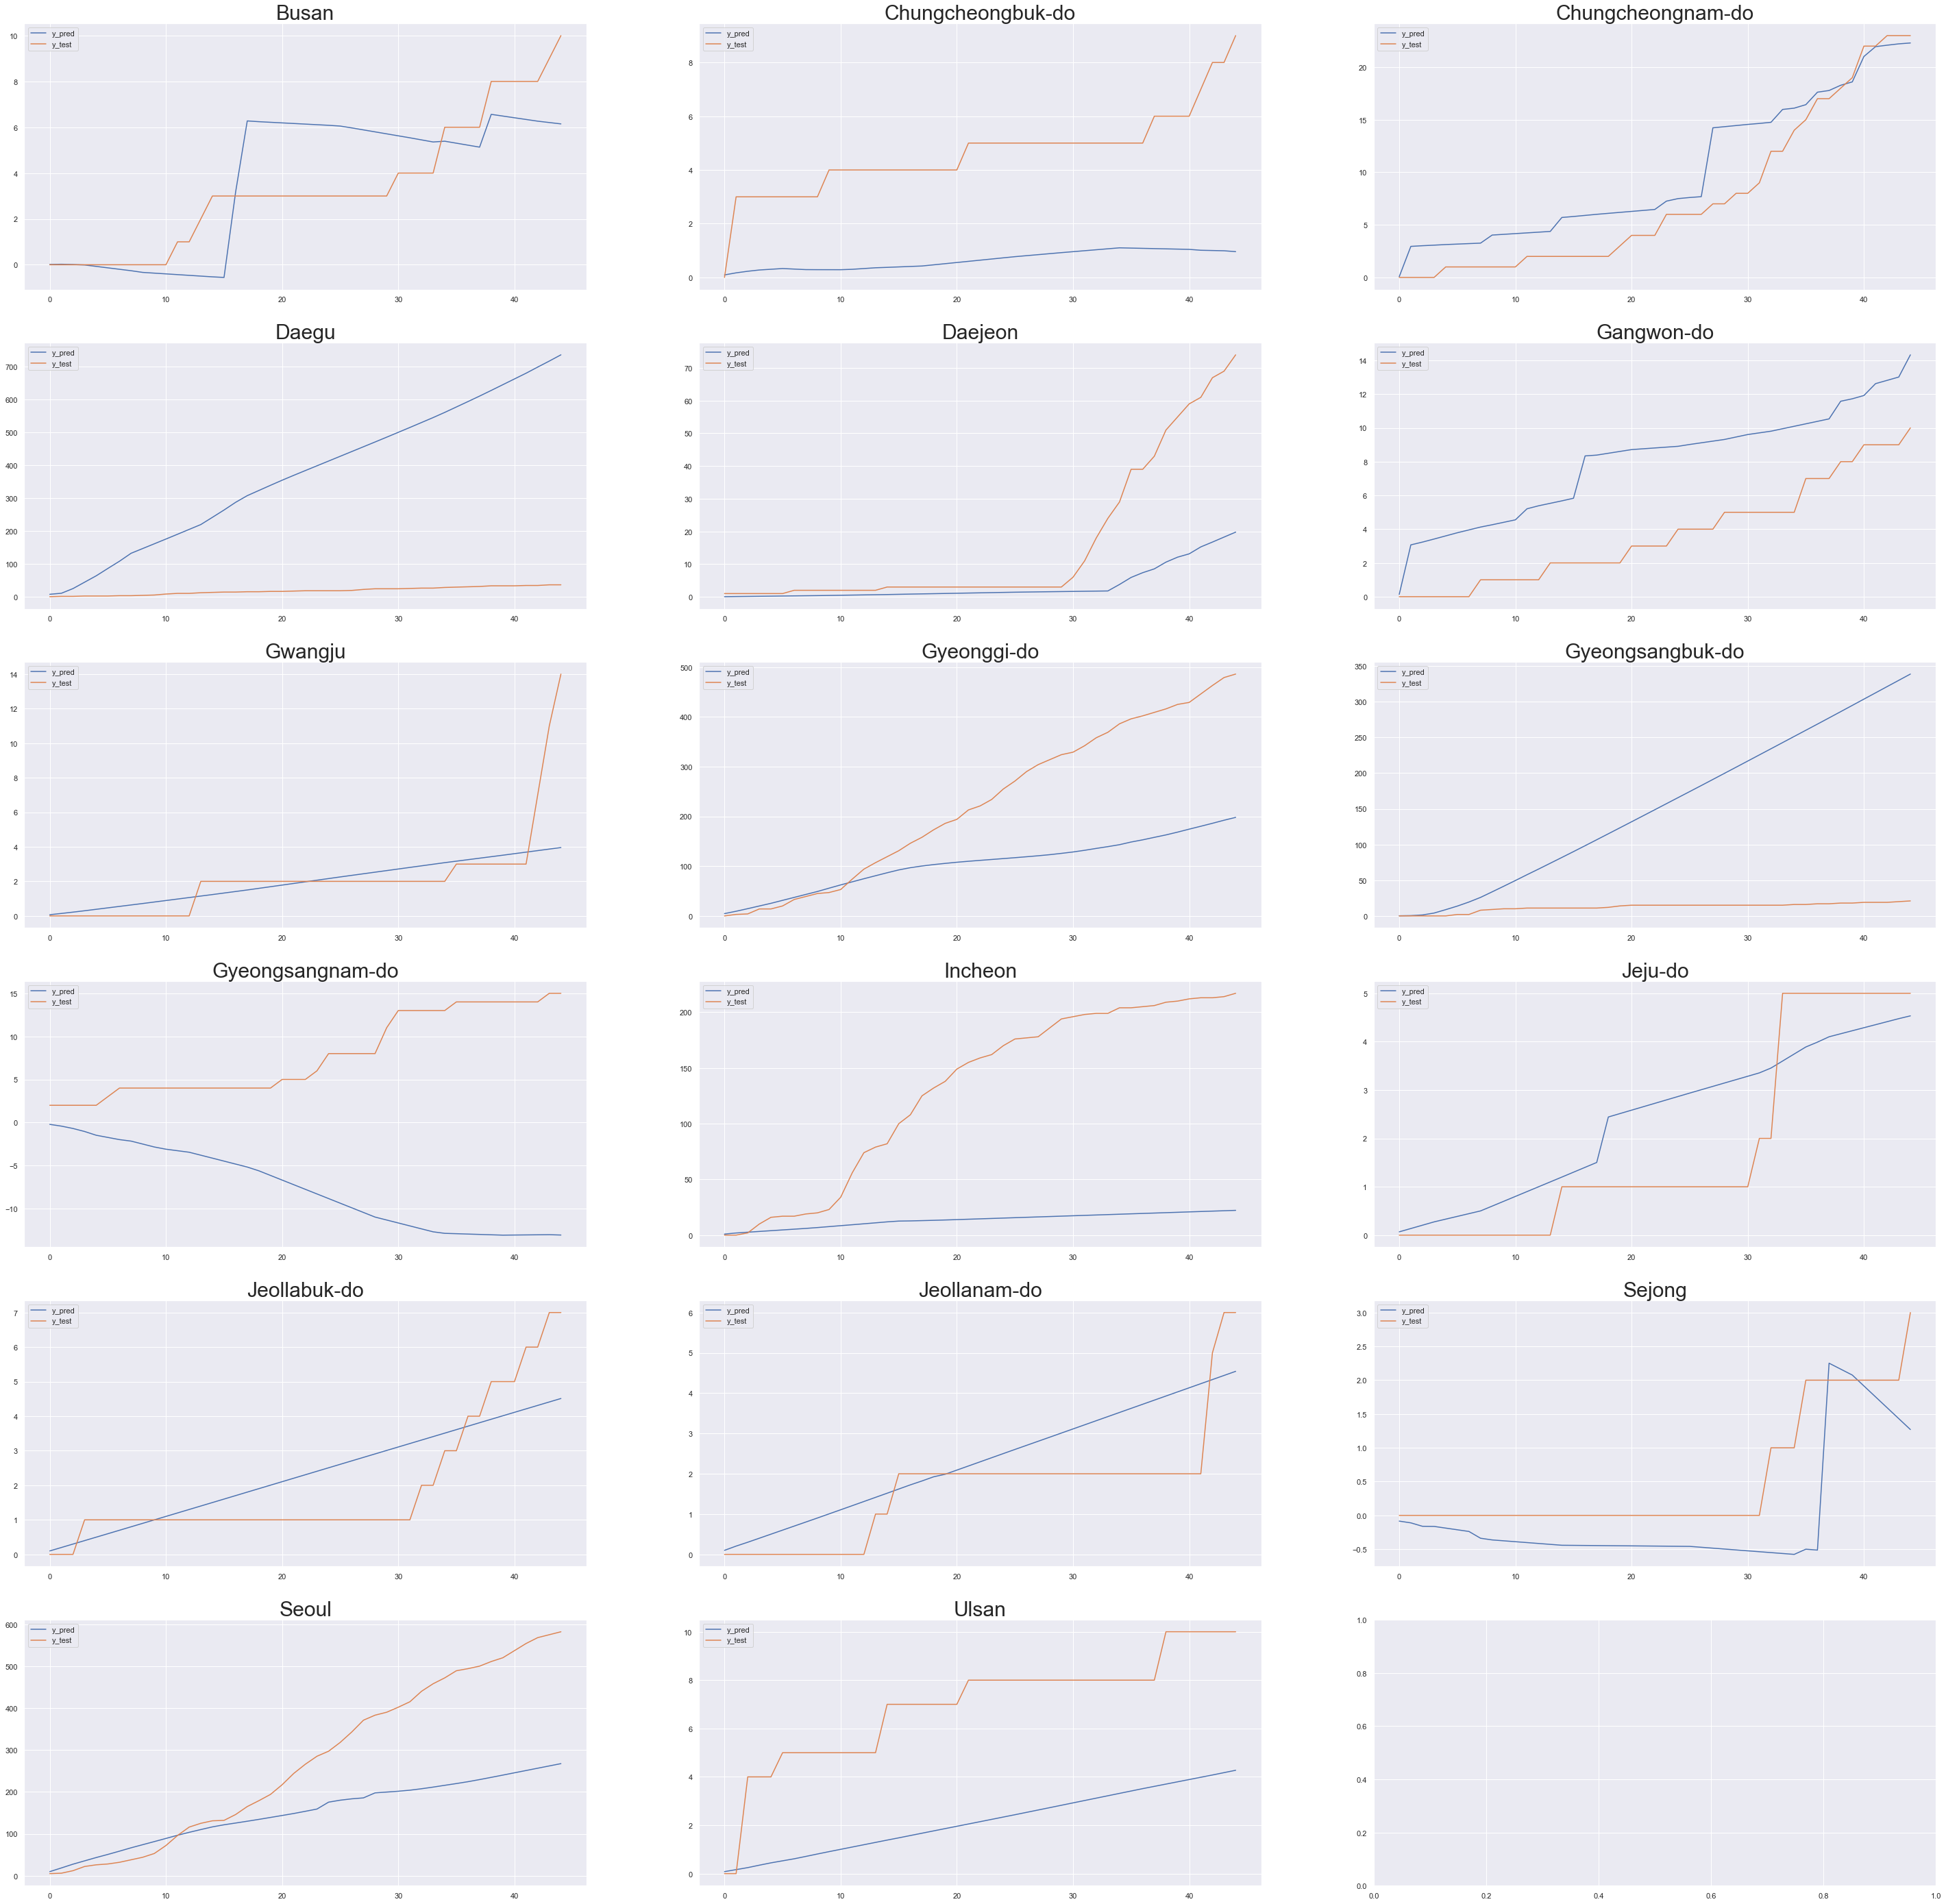

In [325]:
fig,ax=plt.subplots(6,3,figsize=(50,50))
for i in range(len(regions)):
    ax[i//3,i%3].set_title(regions[i],fontsize=30)
    ax[i//3,i%3].plot(range(len(y_dict[regions[i]])),y_dict[regions[i]].cumsum(),label='y_pred')
    ax[i//3,i%3].plot(range(len(y_dict[regions[i]])),province_confirmed[regions[i]][117:].cumsum(),label='y_test')
    ax[i//3,i%3].legend()

In [ ]:
fig,ax=plt.subplots(6,3,figsize=(50,50))
for i in range(len(regions)):
    ax[i//3,i%3].set_title(regions[i],fontsize=30)
    ax[i//3,i%3].plot(range(len(y_dict[regions[i]])),y_dict[regions[i]].cumsum(),label='y_pred')
    ax[i//3,i%3].plot(range(len(y_dict[regions[i]])),province_confirmed[regions[i]][117:].cumsum(),label='y_test')
    ax[i//3,i%3].legend()

In [ ]:
# 랜덤포레스트 시각화

In [326]:
y_dict=dict()
score=[]
for reg in regions:
    model=RandomForestRegressor(n_estimators=2000,max_depth=2)
    model.fit(X_dict[reg][:112],province_confirmed[reg][5:117])
    y_pred=model.predict(X_dict[reg][112:-5])
    y_dict[reg]=y_pred
    print('{}'.format(reg),mean_squared_error(y_pred,province_confirmed[reg][117:]))
    score.append(mean_squared_error(y_pred,province_confirmed[reg][117:]))
print('score_mean : ',np.mean(score))

Busan 0.48750240709727566
Chungcheongbuk-do 0.2937761125988082
Chungcheongnam-do 2.2613971559950006
Daegu 11.006707282705356
Daejeon 6.802455701539318
Gangwon-do 0.4103614004828252
Gwangju 0.9527412182986854
Gyeonggi-do 82.70230366545606
Gyeongsangbuk-do 12.175772764443119
Gyeongsangnam-do 0.495414377552846
Incheon 44.332367356776665
Jeju-do 0.2303013928333462
Jeollabuk-do 0.13879228596946508
Jeollanam-do 0.2485017503417262
Sejong 0.06233607409174982
Seoul 111.44209787198098
Ulsan 0.5162833960321233
score_mean :  16.150536012599726


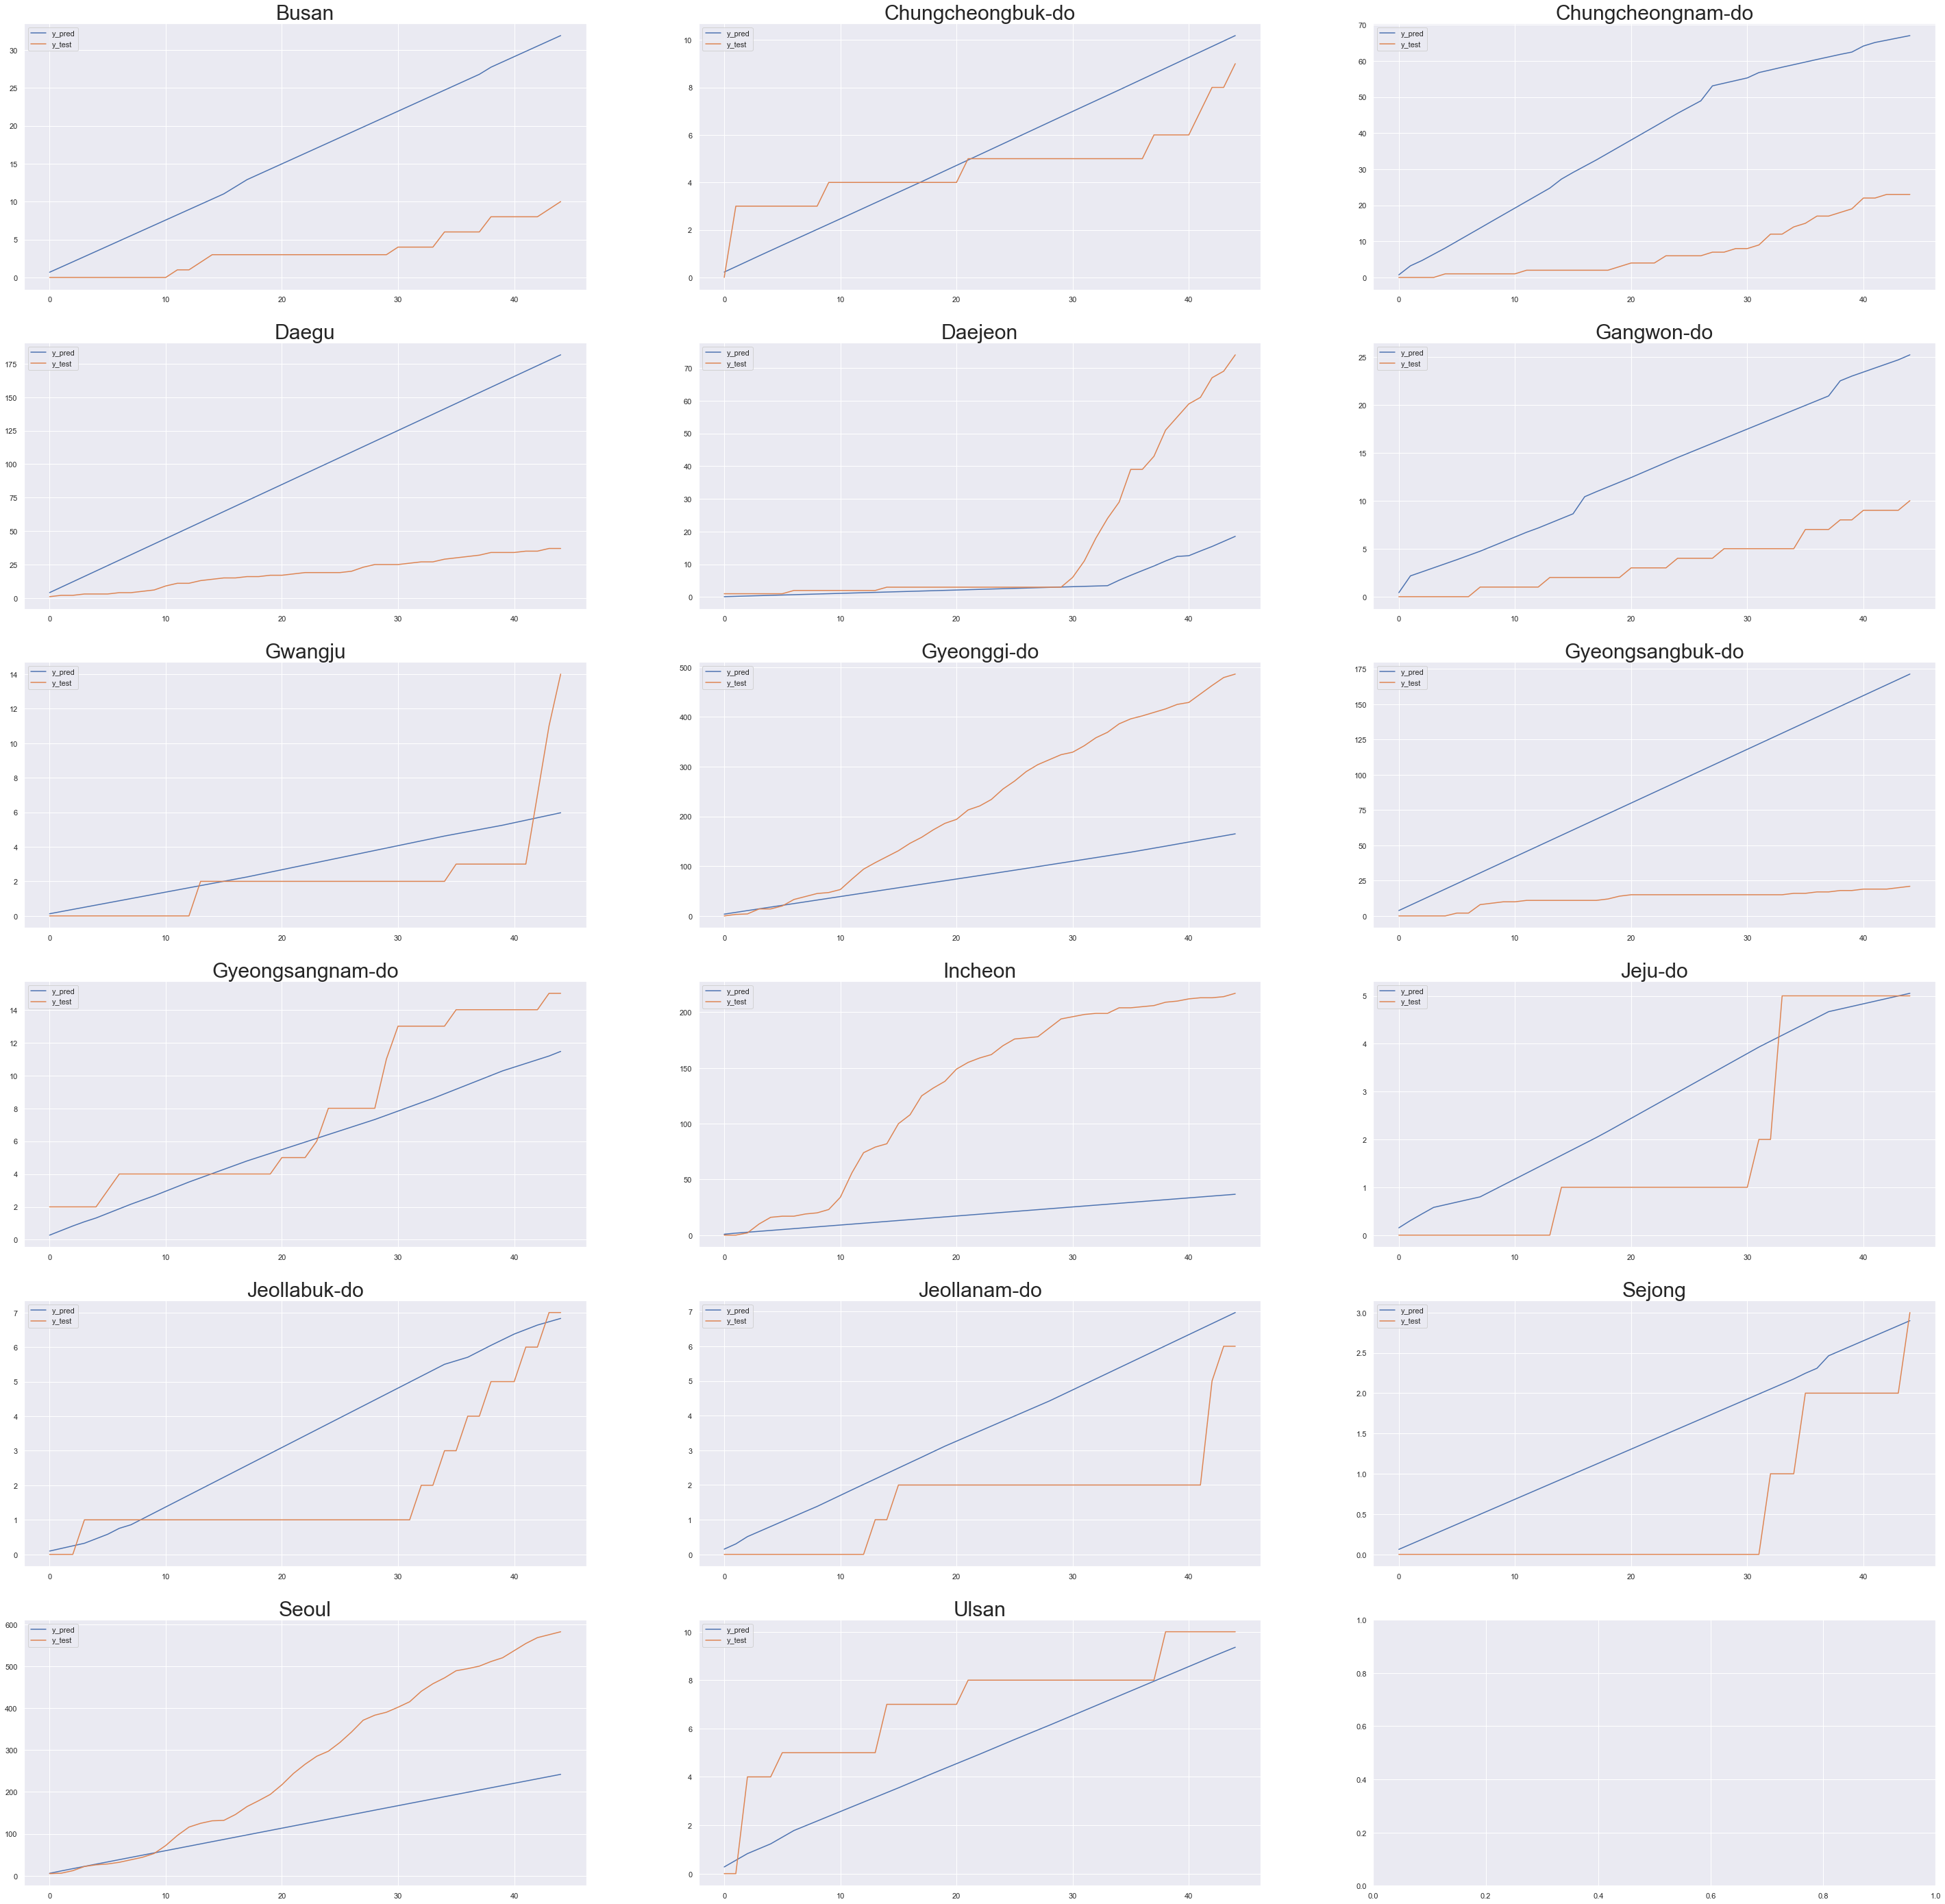

In [327]:
fig,ax=plt.subplots(6,3,figsize=(50,50))
for i in range(len(regions)):
    ax[i//3,i%3].set_title(regions[i],fontsize=30)
    ax[i//3,i%3].plot(range(len(y_dict[regions[i]])),y_dict[regions[i]].cumsum(),label='y_pred')
    ax[i//3,i%3].plot(range(len(y_dict[regions[i]])),province_confirmed[regions[i]][117:].cumsum(),label='y_test')
    ax[i//3,i%3].legend()

In [ ]:
# 다항선형회귀 시각화

In [329]:
pf1=PolynomialFeatures(degree=1,include_bias=False)
pf2=PolynomialFeatures(degree=4,include_bias=False)
polynominal_rest_rate=pf1.fit_transform(X_train[:,0][:,np.newaxis])
polynominal_contact_num=pf2.fit_transform(X_train[:,1][:,np.newaxis])
polynominal_rest_rate_test=pf1.fit_transform(X_test[:,0][:,np.newaxis])
polynominal_contact_num_test=pf2.fit_transform(X_test[:,1][:,np.newaxis])

# train, test
polynominal_X_train=np.concatenate([X_train[:,2:],polynominal_contact_num,polynominal_rest_rate],axis=1)
polynominal_X_test=np.concatenate([X_test[:,2:],polynominal_contact_num_test,polynominal_rest_rate_test],axis=1)

In [332]:
y_dict=dict()
score=[]
for reg in regions:
    # 다항 X_data 생성
    pf1=PolynomialFeatures(degree=1,include_bias=False)
    pf2=PolynomialFeatures(degree=4,include_bias=False)
    
    X_train=X_dict[reg][:112].values
    y_train=province_confirmed[reg][5:117].values
    X_test=X_dict[reg][112:-5].values
    y_test=province_confirmed[reg][117:].values
    
    polynominal_rest_rate=pf1.fit_transform(X_train[:,0][:,np.newaxis])
    polynominal_contact_num=pf2.fit_transform(X_train[:,1][:,np.newaxis])
    polynominal_rest_rate_test=pf1.fit_transform(X_test[:,0][:,np.newaxis])
    polynominal_contact_num_test=pf2.fit_transform(X_test[:,1][:,np.newaxis])

    polynominal_X_train=np.concatenate([X_train[:,2:],polynominal_contact_num,polynominal_rest_rate],axis=1)
    polynominal_X_test=np.concatenate([X_test[:,2:],polynominal_contact_num_test,polynominal_rest_rate_test],axis=1)
    
    model=LinearRegression()
    model.fit(polynominal_X_train,y_train)
    
    y_pred=model.predict(polynominal_X_test)
    y_dict[reg]=y_pred
    print('{}'.format(reg),mean_squared_error(y_pred,y_test))
    score.append(mean_squared_error(y_pred,y_test))
print('score_mean : ',np.mean(score))

Busan 0.3703697669368201
Chungcheongbuk-do 0.3560240249833286
Chungcheongnam-do 0.8573366153556548
Daegu 1937.295859050123
Daejeon 1051.0271392417637
Gangwon-do 0.3263579988258167
Gwangju 0.9249675761241287
Gyeonggi-do 103.53588795266361
Gyeongsangbuk-do 8.679791329508486
Gyeongsangnam-do 0.7026433884591016
Incheon 45.55527919408286
Jeju-do 0.23663486230105824
Jeollabuk-do 0.15945578699546464
Jeollanam-do 0.2494515135183122
Sejong 0.2528945225781681
Seoul 190.49296225612954
Ulsan 0.5576793158250469
score_mean :  196.56357261153966


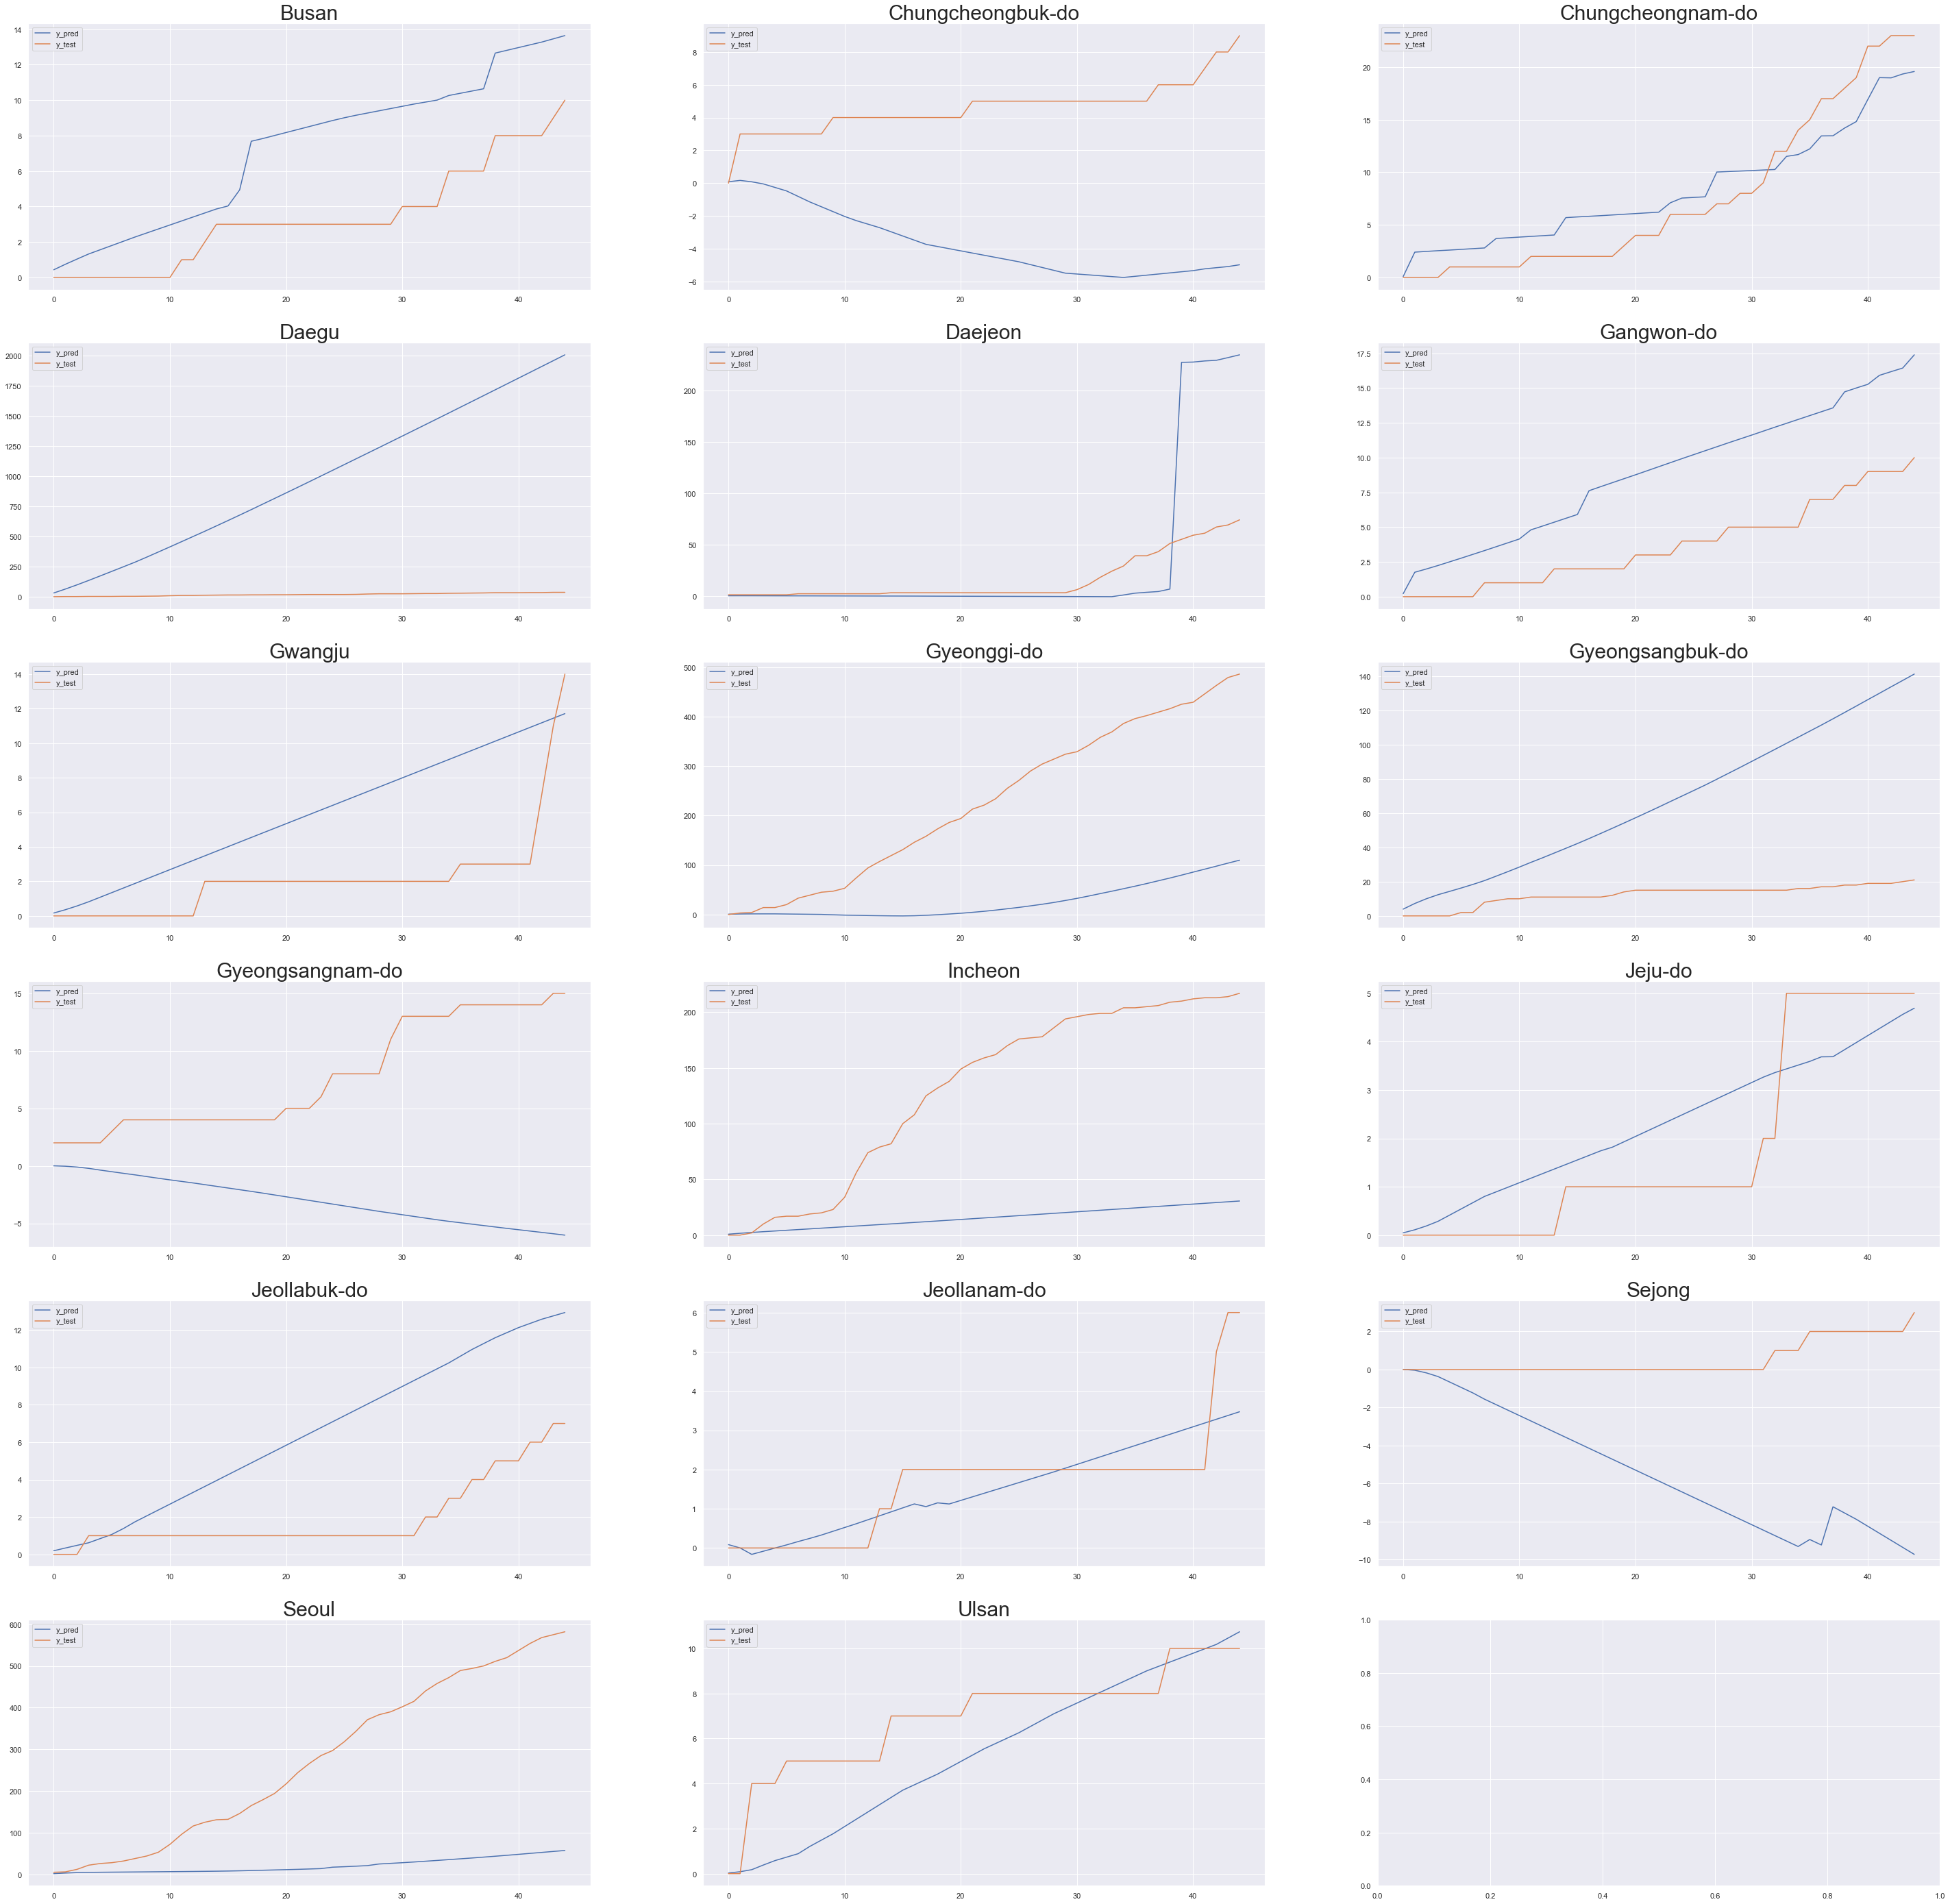

In [334]:
fig,ax=plt.subplots(6,3,figsize=(50,50))
for i in range(len(regions)):
    ax[i//3,i%3].set_title(regions[i],fontsize=30)
    ax[i//3,i%3].plot(range(len(y_dict[regions[i]])),y_dict[regions[i]].cumsum(),label='y_pred')
    ax[i//3,i%3].plot(range(len(y_dict[regions[i]])),province_confirmed[regions[i]][117:].cumsum(),label='y_test')
    ax[i//3,i%3].legend()

In [ ]:
# 다항 릿지, 라소 회귀

In [336]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [368]:
# ridge 회귀
y_dict=dict()
score=[]
for reg in regions:
    # 다항 X_data 생성
    pf1=PolynomialFeatures(degree=1,include_bias=False)
    pf2=PolynomialFeatures(degree=1,include_bias=False)
    
    X_train=X_dict[reg][:112].values
    y_train=province_confirmed[reg][5:117].values
    X_test=X_dict[reg][112:-5].values
    y_test=province_confirmed[reg][117:].values
    
    polynominal_rest_rate=pf1.fit_transform(X_train[:,0][:,np.newaxis])
    polynominal_contact_num=pf2.fit_transform(X_train[:,1][:,np.newaxis])
    polynominal_rest_rate_test=pf1.fit_transform(X_test[:,0][:,np.newaxis])
    polynominal_contact_num_test=pf2.fit_transform(X_test[:,1][:,np.newaxis])

    polynominal_X_train=np.concatenate([X_train[:,2:],polynominal_contact_num,polynominal_rest_rate],axis=1)
    polynominal_X_test=np.concatenate([X_test[:,2:],polynominal_contact_num_test,polynominal_rest_rate_test],axis=1)
    
    model=Ridge()
    model.fit(polynominal_X_train,y_train)
    
    y_pred=model.predict(polynominal_X_test)
    y_pred=np.where(y_pred<0,0,y_pred)
    y_dict[reg]=y_pred
    print('{}'.format(reg),mean_squared_error(y_pred,y_test))
    score.append(mean_squared_error(y_pred,y_test))
print('score_mean : ',np.mean(score))

Busan 0.2693463592561786
Chungcheongbuk-do 0.30543272241007224
Chungcheongnam-do 0.8050158661223279
Daegu 949.7264467533046
Daejeon 7.903118961129011
Gangwon-do 0.21502877339804496
Gwangju 0.939770773054708
Gyeonggi-do 101.35317339095087
Gyeongsangbuk-do 22.592166021738215
Gyeongsangnam-do 0.592217867385753
Incheon 45.08810577623211
Jeju-do 0.2361741841279669
Jeollabuk-do 0.15203769504002326
Jeollanam-do 0.2569847631846855
Sejong 0.068880876559573
Seoul 180.42300331125307
Ulsan 0.5529328449075349
score_mean :  77.1458727611797


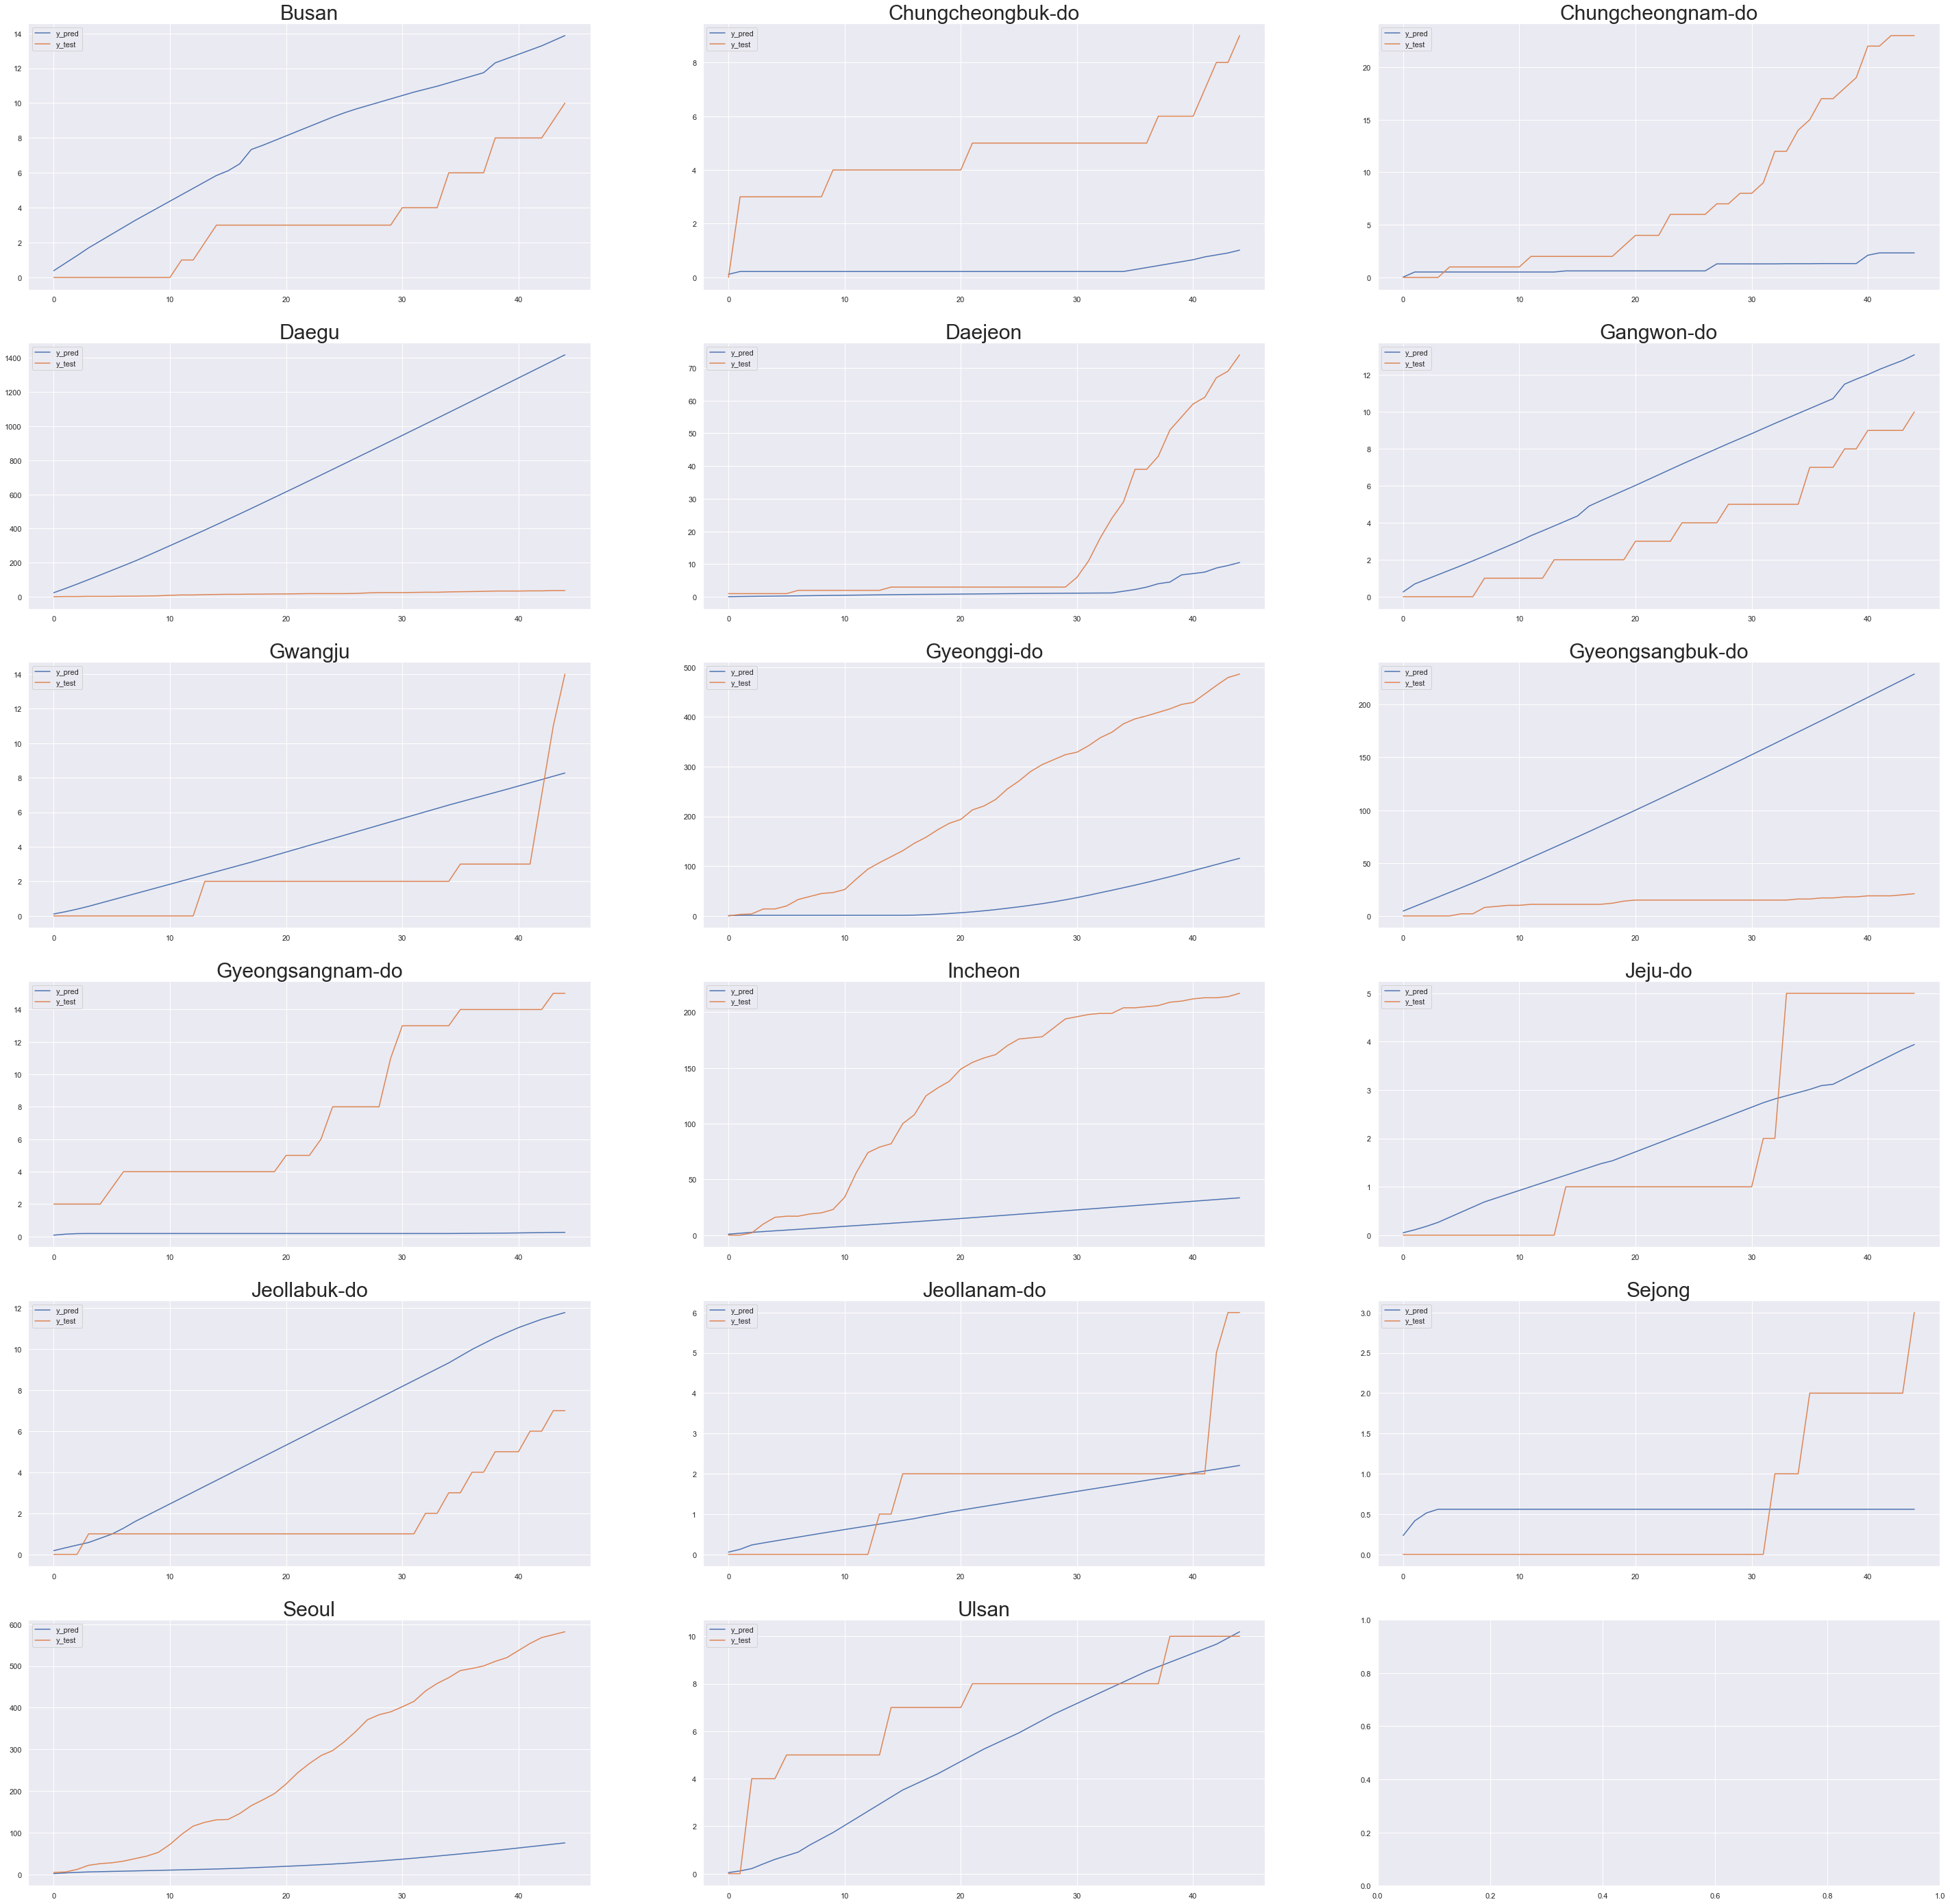

In [369]:
fig,ax=plt.subplots(6,3,figsize=(50,50))
for i in range(len(regions)):
    ax[i//3,i%3].set_title(regions[i],fontsize=30)
    ax[i//3,i%3].plot(range(len(y_dict[regions[i]])),y_dict[regions[i]].cumsum(),label='y_pred')
    ax[i//3,i%3].plot(range(len(y_dict[regions[i]])),province_confirmed[regions[i]][117:].cumsum(),label='y_test')
    ax[i//3,i%3].legend()

In [365]:
# lasso 회귀
y_dict=dict()
score=[]
for reg in regions:
    # 다항 X_data 생성
    pf1=PolynomialFeatures(degree=6,include_bias=False)
    pf2=PolynomialFeatures(degree=1,include_bias=False)
    
    X_train=X_dict[reg][:112].values
    y_train=province_confirmed[reg][5:117].values
    X_test=X_dict[reg][112:-5].values
    y_test=province_confirmed[reg][117:].values
    
    polynominal_rest_rate=pf1.fit_transform(X_train[:,0][:,np.newaxis])
    polynominal_contact_num=pf2.fit_transform(X_train[:,1][:,np.newaxis])
    polynominal_rest_rate_test=pf1.fit_transform(X_test[:,0][:,np.newaxis])
    polynominal_contact_num_test=pf2.fit_transform(X_test[:,1][:,np.newaxis])

    polynominal_X_train=np.concatenate([X_train[:,2:],polynominal_contact_num,polynominal_rest_rate],axis=1)
    polynominal_X_test=np.concatenate([X_test[:,2:],polynominal_contact_num_test,polynominal_rest_rate_test],axis=1)
    
    model=Lasso()
    model.fit(polynominal_X_train,y_train)
    
    y_pred=model.predict(polynominal_X_test)
    y_dict[reg]=y_pred
    print('{}'.format(reg),mean_squared_error(y_pred,y_test))
    score.append(mean_squared_error(y_pred,y_test))
print('score_mean : ',np.mean(score))

Busan 0.8267795362823304
Chungcheongbuk-do 0.3679712429131546
Chungcheongnam-do 1.1855449142714405
Daegu 11947.960988886705
Daejeon 3234.7123350497204
Gangwon-do 0.42765818302733477
Gwangju 0.940801949157516
Gyeonggi-do 54.09296503894431
Gyeongsangbuk-do 83.72667257194188
Gyeongsangnam-do 1.1537845229735366
Incheon 8336568.729093452
Jeju-do 0.2328436100988772
Jeollabuk-do 0.13673165004957175
Jeollanam-do 0.25193413681787213
Sejong 0.28937341582087306
Seoul 189.61713325899981
Ulsan 0.5263177845337134
score_mean :  491299.12817230617


C:\Users\tjoeun\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 129.9140444238747, tolerance: 0.08948571428571428
  positive)
C:\Users\tjoeun\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48.839358204103156, tolerance: 0.0108
  positive)
C:\Users\tjoeun\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 620.0717042388802, tolerance: 0.1320857142857143
  positive)
C:\Users\tjoeun\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap:

In [366]:
y_dict=dict()
score=[]
for reg in regions:
    # 다항 X_data 생성
    pf1=PolynomialFeatures(degree=6,include_bias=False)
    pf2=PolynomialFeatures(degree=1,include_bias=False)
    
    X_train=X_dict[reg][:112].values
    y_train=province_confirmed[reg][5:117].values
    X_test=X_dict[reg][112:-5].values
    y_test=province_confirmed[reg][117:].values
    
    polynominal_rest_rate=pf1.fit_transform(X_train[:,0][:,np.newaxis])
    polynominal_contact_num=pf2.fit_transform(X_train[:,1][:,np.newaxis])
    polynominal_rest_rate_test=pf1.fit_transform(X_test[:,0][:,np.newaxis])
    polynominal_contact_num_test=pf2.fit_transform(X_test[:,1][:,np.newaxis])

    polynominal_X_train=np.concatenate([X_train[:,2:],polynominal_contact_num,polynominal_rest_rate],axis=1)
    polynominal_X_test=np.concatenate([X_test[:,2:],polynominal_contact_num_test,polynominal_rest_rate_test],axis=1)
    
    model=Lasso()
    model.fit(polynominal_X_train,y_train)
    
    y_pred=model.predict(polynominal_X_test)
    y_pred=np.where(y_pred<0,0,y_pred)
    y_dict[reg]=y_pred
    print('{}'.format(reg),mean_squared_error(y_pred,y_test))
    score.append(mean_squared_error(y_pred,y_test))
print('score_mean : ',np.mean(score))

Busan 0.8267795362823304
Chungcheongbuk-do 0.3679712429131546
Chungcheongnam-do 1.1855449142714405
Daegu 1.3555555555555556
Daejeon 3234.7123350497204
Gangwon-do 0.42765818302733477
Gwangju 0.940801949157516
Gyeonggi-do 54.09296503894431
Gyeongsangbuk-do 1.2222222222222223
Gyeongsangnam-do 1.1537845229735366
Incheon 8336568.729093452
Jeju-do 0.2328436100988772
Jeollabuk-do 0.13673165004957175
Jeollanam-do 0.25193413681787213
Sejong 0.28937341582087306
Seoul 112.20574578316996
Ulsan 0.5263177845337134
score_mean :  490586.97986223805


C:\Users\tjoeun\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 129.9140444238747, tolerance: 0.08948571428571428
  positive)
C:\Users\tjoeun\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48.839358204103156, tolerance: 0.0108
  positive)
C:\Users\tjoeun\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 620.0717042388802, tolerance: 0.1320857142857143
  positive)
C:\Users\tjoeun\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap:

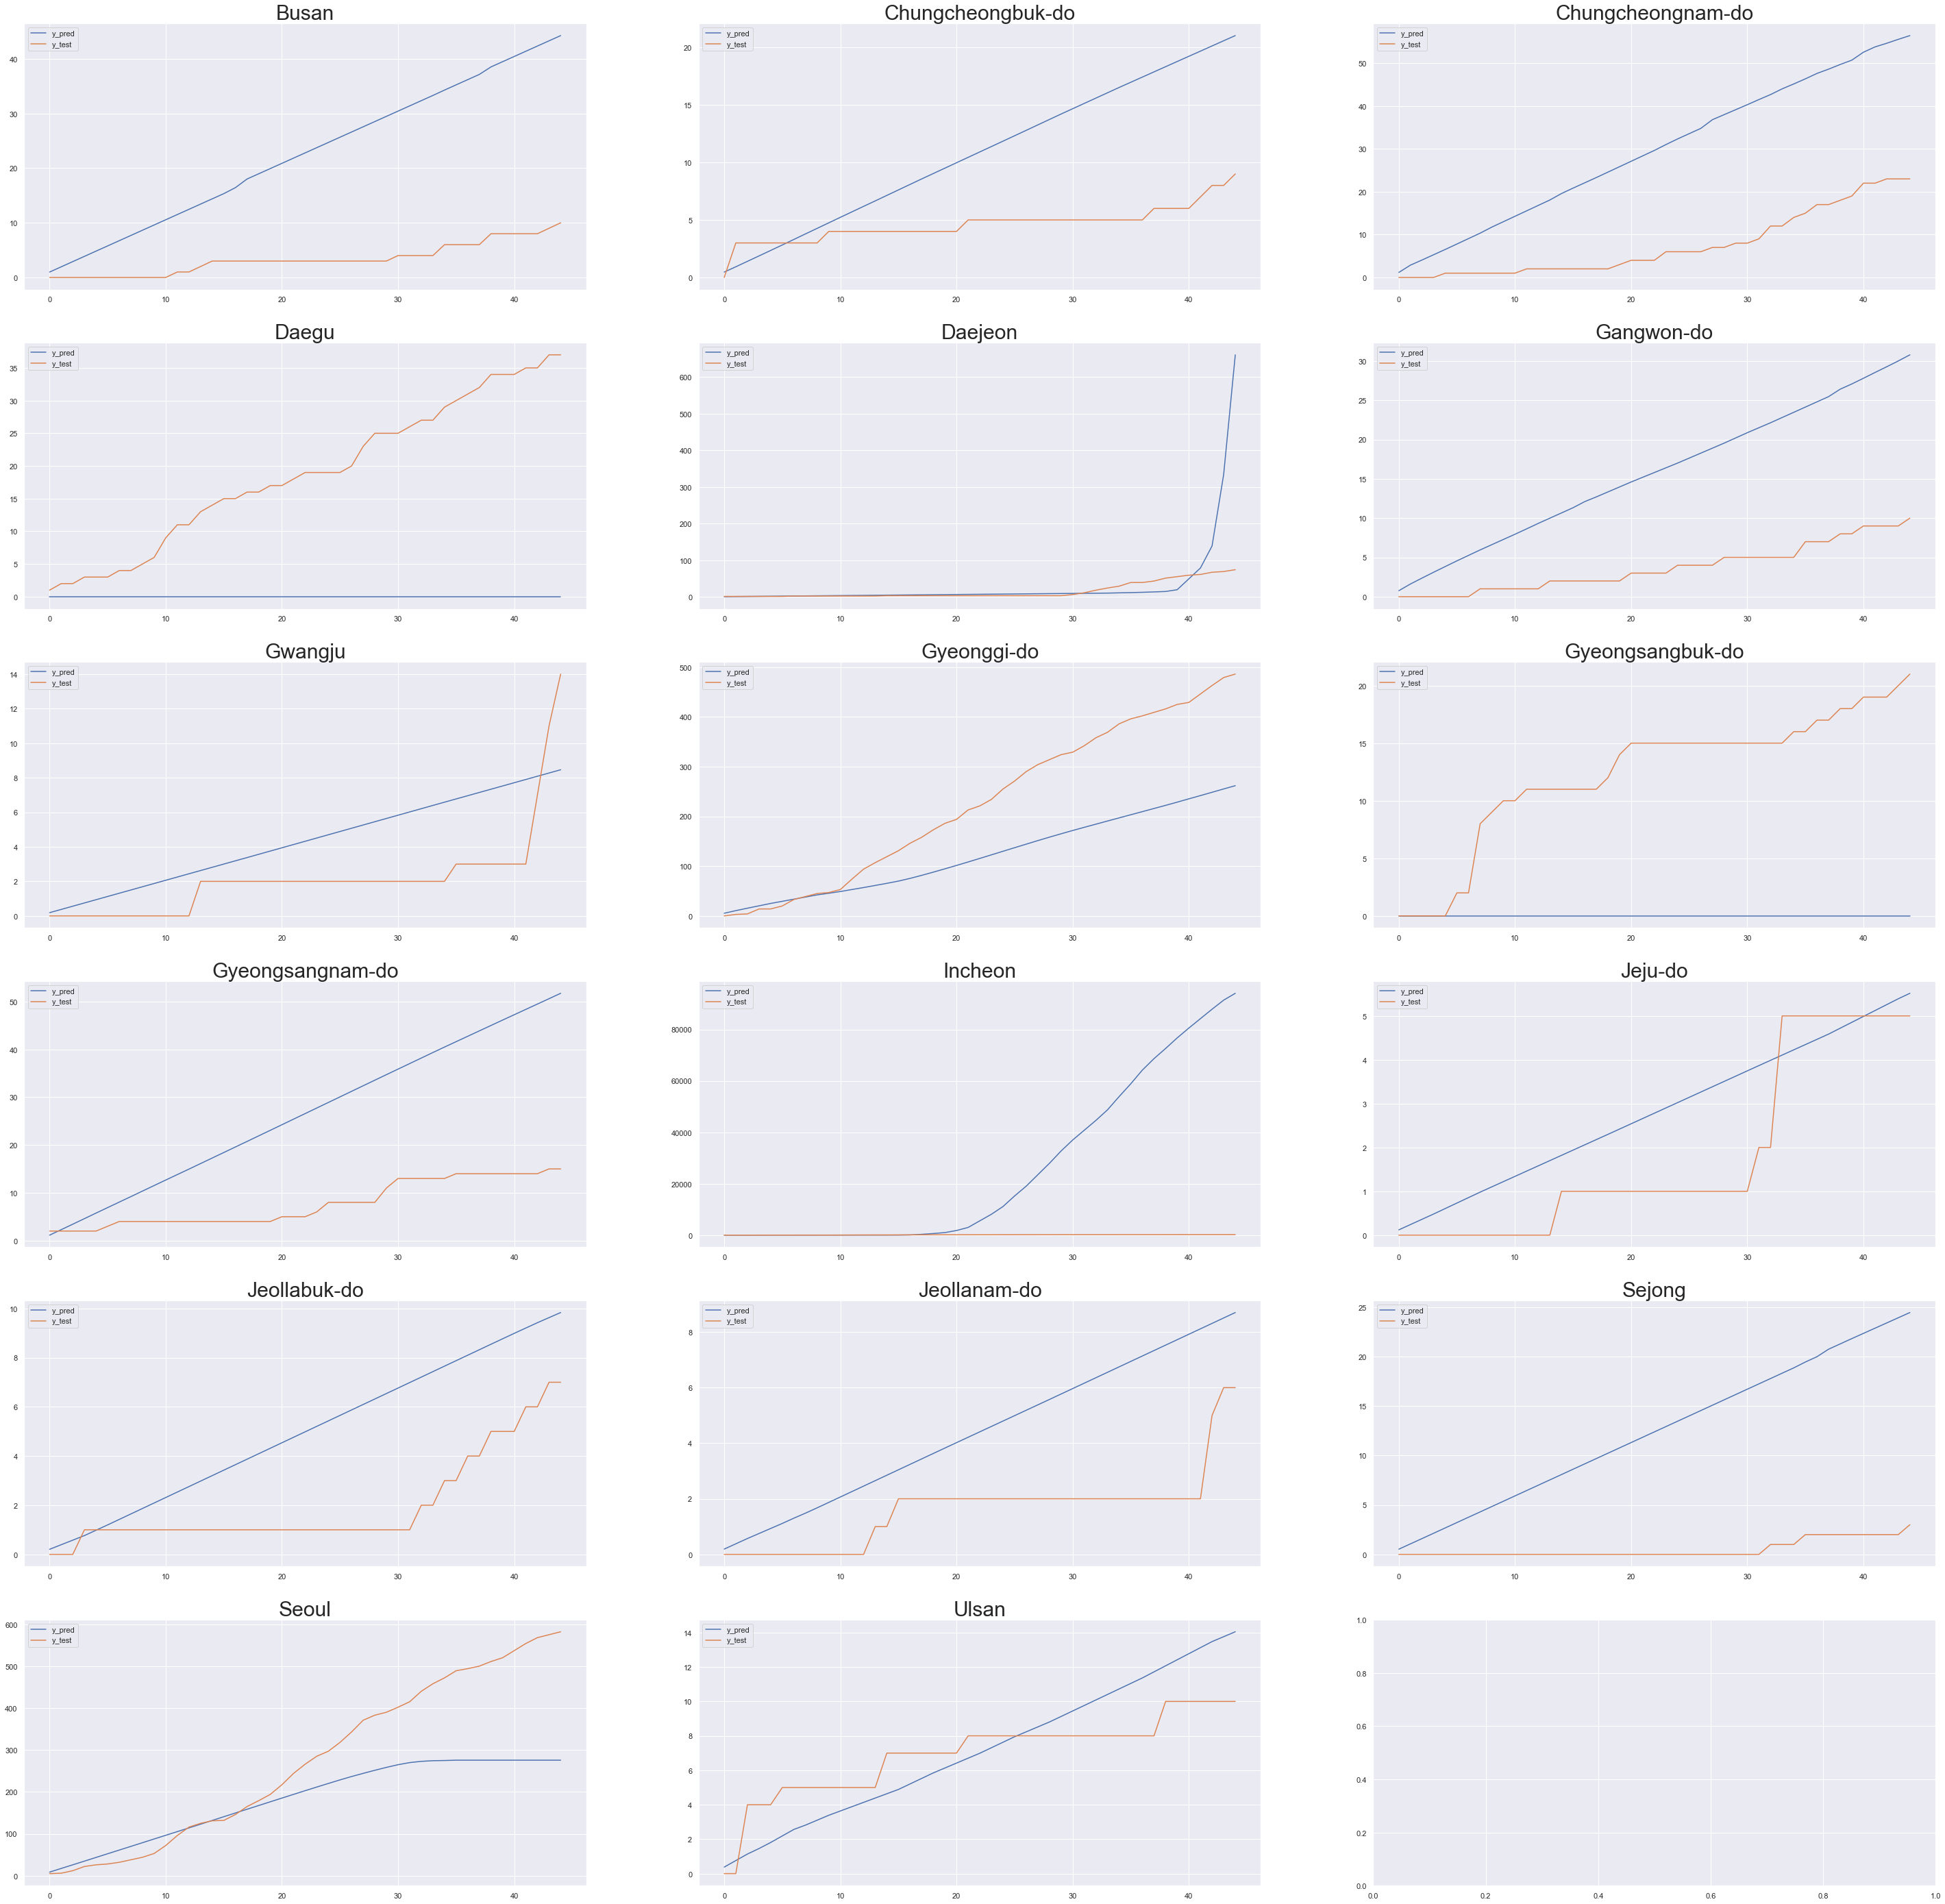

In [367]:
fig,ax=plt.subplots(6,3,figsize=(50,50))
for i in range(len(regions)):
    ax[i//3,i%3].set_title(regions[i],fontsize=30)
    ax[i//3,i%3].plot(range(len(y_dict[regions[i]])),y_dict[regions[i]].cumsum(),label='y_pred')
    ax[i//3,i%3].plot(range(len(y_dict[regions[i]])),province_confirmed[regions[i]][117:].cumsum(),label='y_test')
    ax[i//3,i%3].legend()

In [375]:
X_dict['Busan']

Busan_rest_rate  Busan_contact_num   SD  Mask  TransMask  \
date                                                                   
2020-01-21         0.000000                0.0  0.0   0.0        0.0   
2020-01-22         0.000000                0.0  0.0   0.0        0.0   
2020-01-23         0.000000                0.0  0.0   0.0        0.0   
2020-01-24         0.000000                0.0  0.0   0.0        0.0   
2020-01-25         0.000000                0.0  0.0   0.0        0.0   
...                     ...                ...  ...   ...        ...   
2020-06-26         1.046013                0.0  0.3   1.0        1.0   
2020-06-27         1.046013                0.0  0.3   1.0        1.0   
2020-06-28         0.941412                0.0  0.3   1.0        1.0   
2020-06-29         1.046013                0.0  0.3   1.0        1.0   
2020-06-30         1.255215                0.0  0.3   1.0        1.0   

            Quaratine  Shutdown(karaoke)  Shutdown(bar_and_club)  
date                                                              
2020-01-21        0.0                0.0                     0.0  
2020-01-22        0.0                0.0                     0.0  
2020-01-23        0.0                0.0                     0.0  
2020-01-24        0.0                0.0                     0.0  
2020-01-25        0.0                0.0                     0.0  
...               ...                ...                     ...  
2020-06-26        1.0                0.0                     0.0  
2020-06-27        1.0                0.0                     0.0  
2020-06-28        1.0                0.0                     0.0  
2020-06-29        1.0                0.0                     0.0  
2020-06-30        1.0                0.0                     0.0  

[162 rows x 8 columns]